In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import random

In [2]:
#For this part of the Assignment we know from previous analysis that EDA, HR  are the variables that can be taken into
#account to detect stress. The next step is to create a model to do that. 
#First of all we need to find a way to associate EDA and HR with the stress or not stress STATE, for that we will use the
#the processed data file provided for the researches.

In [3]:
results = pd.read_csv('C:/Users/Aydee/Ana/CE888/Assig1/Stress-Predict-Dataset-main/Processed_data/Improved_All_Combined_hr_rsp_binary.csv', sep=',')
results.head()

Participant      HR      respr   Time(sec)  Label
0            2  118.00  12.127693  1644227583      0
1            2  113.50  12.127693  1644227584      0
2            2   93.00  12.127693  1644227585      0
3            2   93.25  12.127693  1644227586      0
4            2   86.40  12.127693  1644227587      0

In [4]:
#From this dataset we have Participant, HR, respr, Time, and Label.
#Label is 0 when the results show a non stressed person and 1 for stress.
#For training our model we need to take label from this dataset and associated it with EDA and maybe Temp
#According to the past analysis HR was sampled at 1Hz and its the timestamp of HR begins always after 10seconds of the rest of signals

In [15]:
#Now we need to extract EDA sampled at 1Hz and then take that signal after 10s from the time start, but we have to remark
#those 10sec are not 10 for all users, it is sometimes 7,8,9.
#For getting all EDA we need to create a loop to call all files from RAW_data files, then to do the mean each 4 samples
#in this way we will have a new representative data at 1Hz
EDA_all= []
E_eda_all = []
for add in range(2,36):
    x = results[results['Participant']==add]
    if add >= 2 and add <= 9:
        add = '0'+str(add)
    else:
        add = str(add)
    #print('The value is:',add)
    l = 0
    S1_elderm = pd.read_csv('C:/Users/Aydee/Ana/CE888/Assig1/Stress-Predict-Dataset-main/Raw_data/S'+add+'/EDA.csv', sep=',')
    sampleF1 = S1_elderm.iloc[0].values
    sampleF1 = sampleF1[0]
    S1_elderm=S1_elderm.drop(0)#as sample frecuency is stored we delete the first row.
    
    tempo = 0
    aux  = 0
    N_EDA = []
    E_EDA=[]
    j = 0
    z = S1_elderm.values.T[0]
    #In this loop we handle the 10sec difference
    #It is not 10sec for all, the mean for that time is 7sec, therefore we start to store the mean EDA at 1Hz after 7sec
    for k in range(0,len(z)):
        tempo = tempo+z[k]
        aux = aux+z[k]*z[k]
        j = j+1
        if j == sampleF1:
            j = 0
            l = l+1
            if l >=7: #Here after 7 sec we start to store the calculated EDA
                N_EDA.append(tempo/sampleF1)
                E_EDA.append(aux)
                tempo = 0
                aux = 0 
    #How ever as we mention before 7 is the mean and we need to match EDA pretty well to HR, therefore we have another loop
    #In this loop in case the lenght N_EDA is the same than X(lenght of participant data from processed data)
    #we store all data, in case NOT we start from the difference which is 1 or 2 sec after
    if len(N_EDA) ==len(x):
        for var in range(0,len(N_EDA)):
            EDA_all.append(N_EDA[var])
            E_eda_all.append(E_EDA[var])
    else:
         for var in range(len(N_EDA)-len(x),len(N_EDA)): #Here we start from 1, 2 or 3 sec after depending on each data lenght
            EDA_all.append(N_EDA[var])
            E_eda_all.append(E_EDA[var])

#If we our logic is OK EDA all and results (which is the complete data-set) must have the same dimention!
if(len(EDA_all) == len(results)):
    print ("Success! EDA all and results are same size:",len(E_eda_all))
else:
    print(len(EDA_all),len(results))
    

Success! EDA all and results are same size: 112516


In [10]:
#Here we applied the same logic used for EDA but in this case it is for Temperature
Temp_all= []
for add in range(2,36):
    x = results[results['Participant']==add]
    if add >= 2 and add <= 9:
        add = '0'+str(add)
    else:
        add = str(add)
    #print('The value is:',add)
    l = 0
    S1_elderm = pd.read_csv('C:/Users/Aydee/Ana/CE888/Assig1/Stress-Predict-Dataset-main/Raw_data/S'+add+'/TEMP.csv', sep=',')
    sampleF1 = S1_elderm.iloc[0].values
    sampleF1 = sampleF1[0]
    S1_elderm=S1_elderm.drop(0)#as sample frecuency is stored we delete the first row.
    
    tempo = 0
    N_EDA = []
    j = 0
    z = S1_elderm.values.T[0]
    for k in range(0,len(z)):
        tempo = tempo+z[k]
        j = j+1
        if j == sampleF1:
            j = 0
            l = l+1
            if l >=7:
                N_EDA.append(tempo/4)
                tempo = 0
    if len(N_EDA) ==len(x):
        for var in range(0,len(N_EDA)):
            Temp_all.append(N_EDA[var])
    else:
         for var in range(len(N_EDA)-len(x),len(N_EDA)):
            Temp_all.append(N_EDA[var])
if len(Temp_all) == len(results):
    print ("Success! Temp_all and results are same size:",len(results))
else:
    print(len(Temp_all),len(results))

Success! Temp_all and results are same size: 112516


In [16]:
#Make a copy of the dataset to keep the original in case of unwanted change
merge=results.copy()
#then we have to add the new variables created! EDA_all and Temp_all
merge['EDA_1Hz'] = EDA_all
merge['Temp_1Hz'] = Temp_all
merge['EDA_energy1hz'] = E_eda_all
merge

Participant      HR      respr   Time(sec)  Label   EDA_1Hz  Temp_1Hz  \
0                 2  118.00  12.127693  1644227583      0  0.617585     34.75   
1                 2  113.50  12.127693  1644227584      0  0.618867     34.77   
2                 2   93.00  12.127693  1644227585      0  0.614382     34.79   
3                 2   93.25  12.127693  1644227586      0  0.592278     34.81   
4                 2   86.40  12.127693  1644227587      0  0.512189     34.84   
...             ...     ...        ...         ...    ...       ...       ...   
112511           35   65.45  11.546524  1646842243      0  0.219695     32.16   
112512           35   65.47  11.520924  1646842244      0  0.223218     32.18   
112513           35   65.50  11.495324  1646842245      0  0.222898     32.18   
112514           35   65.50  11.466879  1646842246      0  0.228984     32.18   
112515           35   65.50  11.441279  1646842247      0  0.228984     32.21   

        EDA_energy1hz  
0            1.525680  
1            1.532031  
2            1.509881  
3            1.408238  
4            1.049604  
...               ...  
112511       0.193540  
112512       0.199526  
112513       0.198758  
112514       0.209737  
112515       0.209737  

[112516 rows x 8 columns]

The value is 17
The value is 10
The value is 19
The value is 25
The value is 24
The value is 2


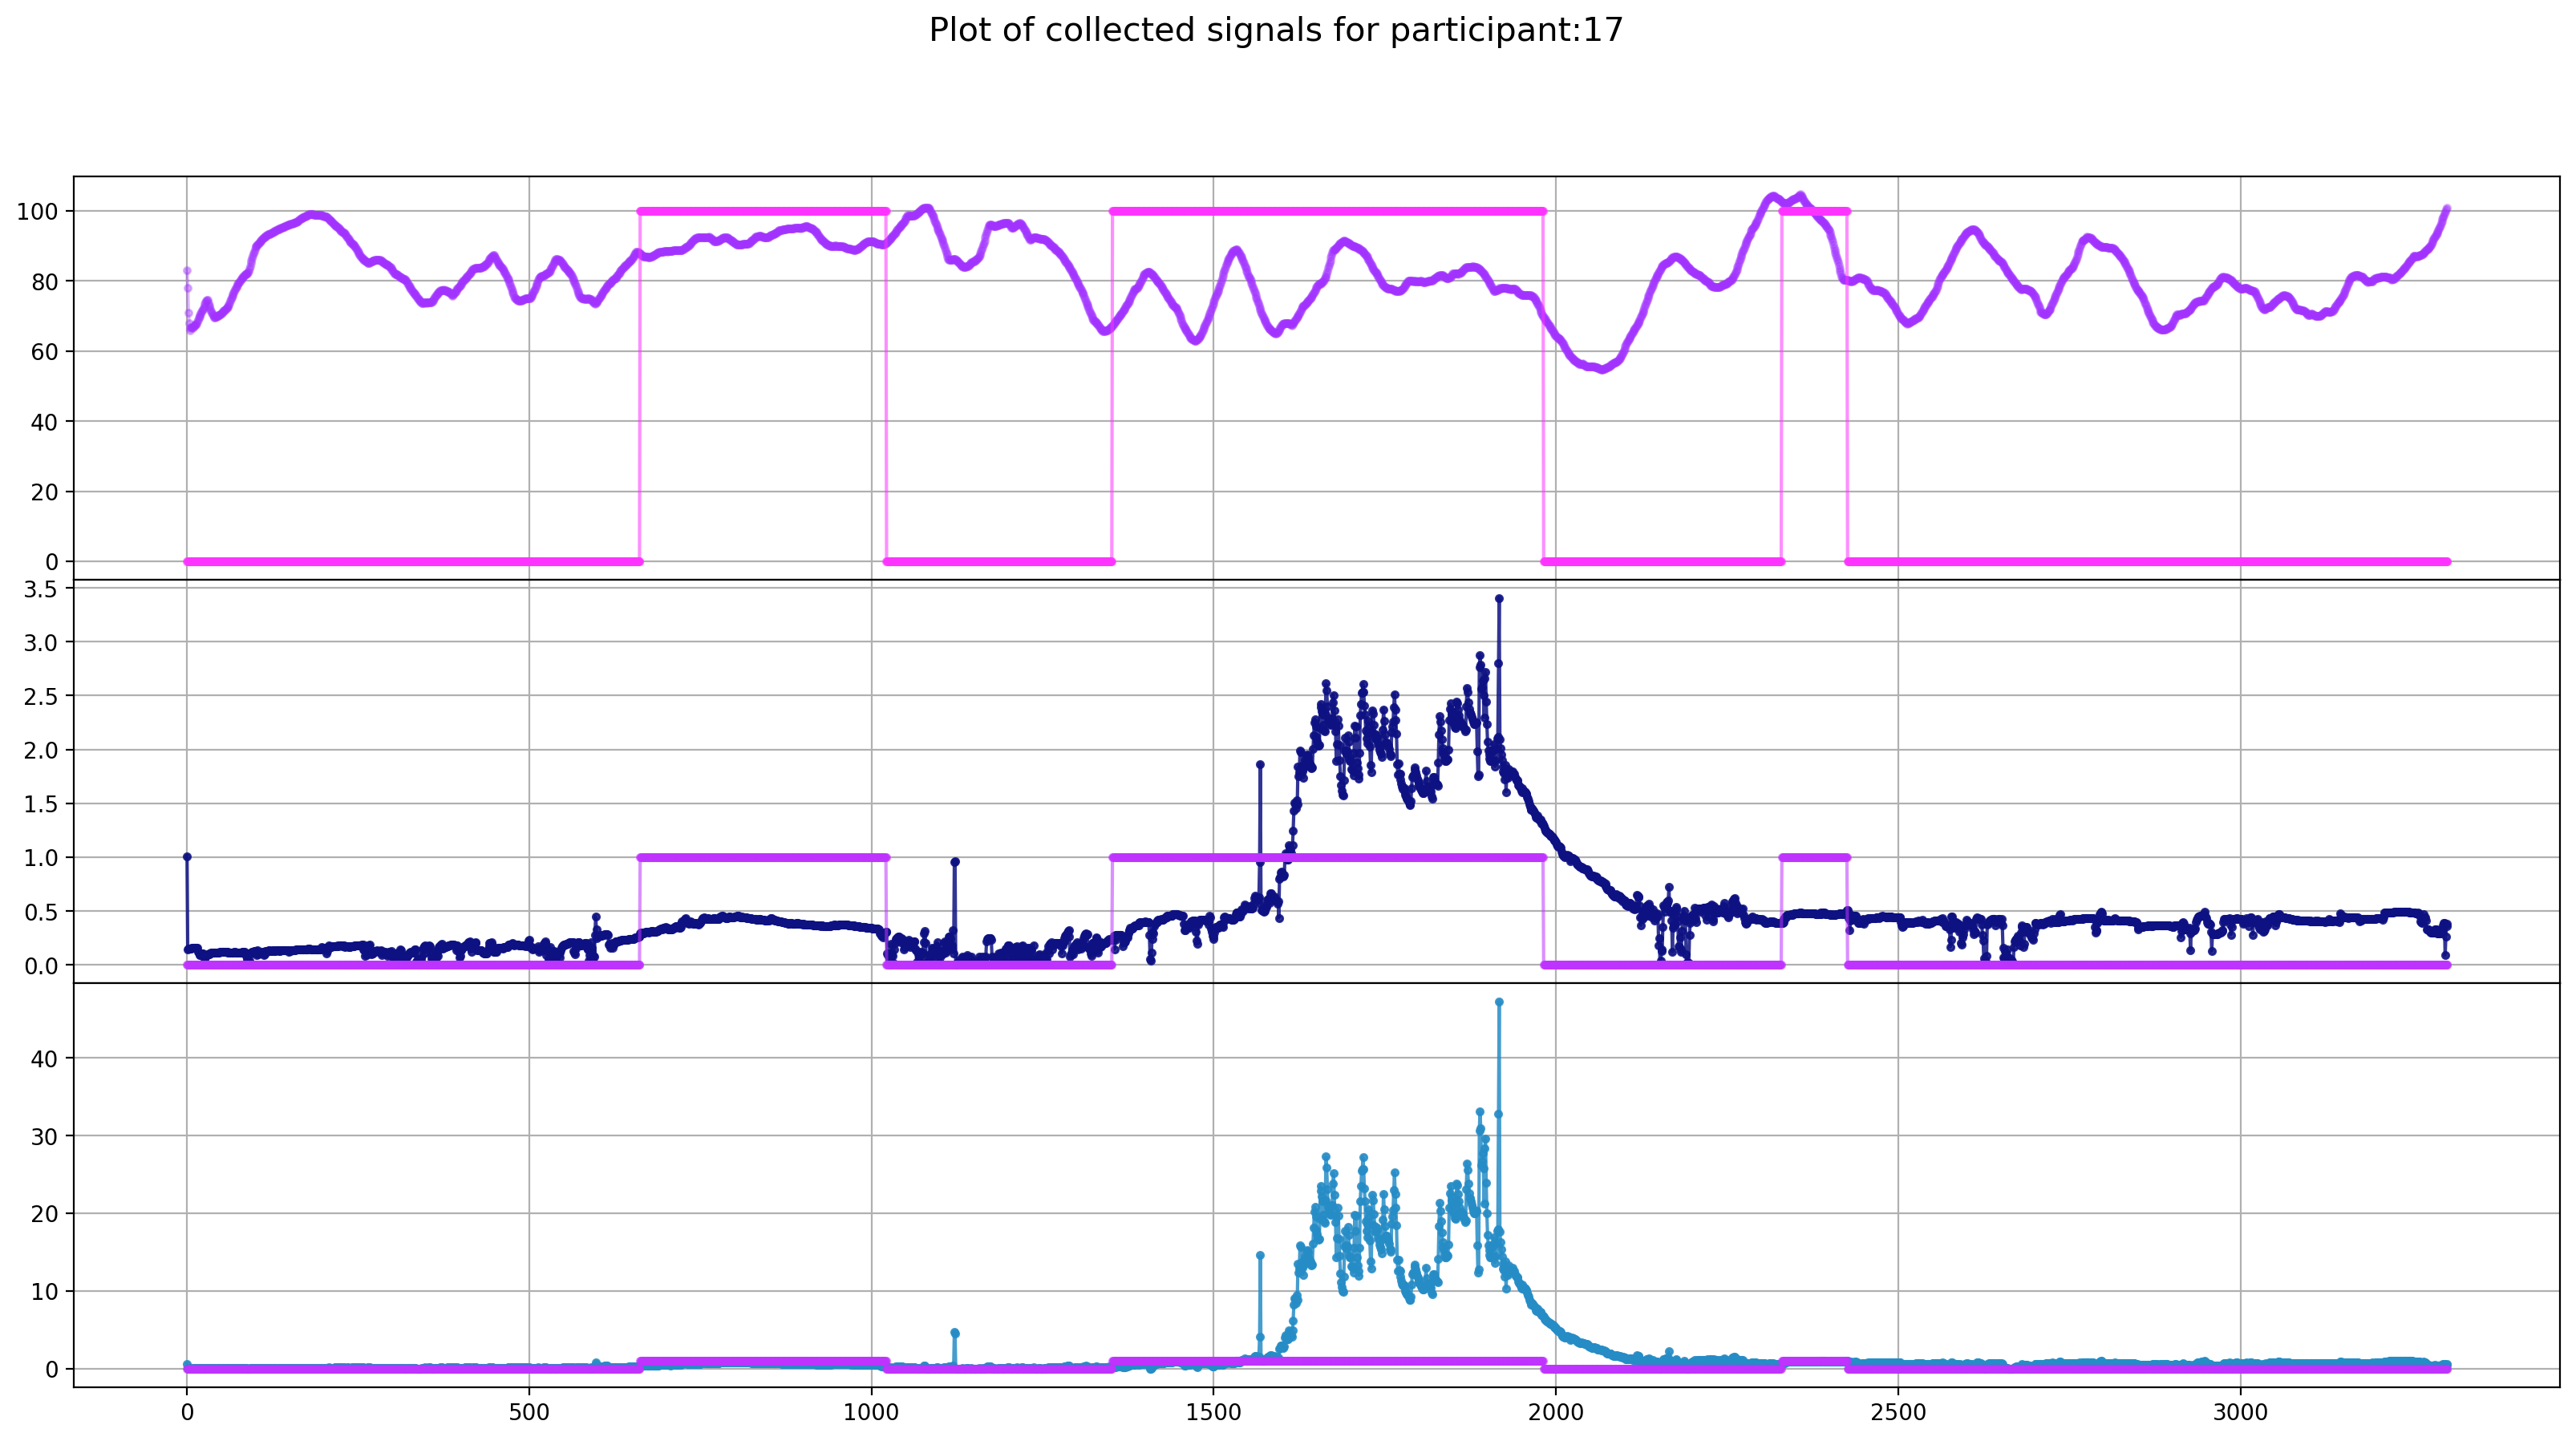

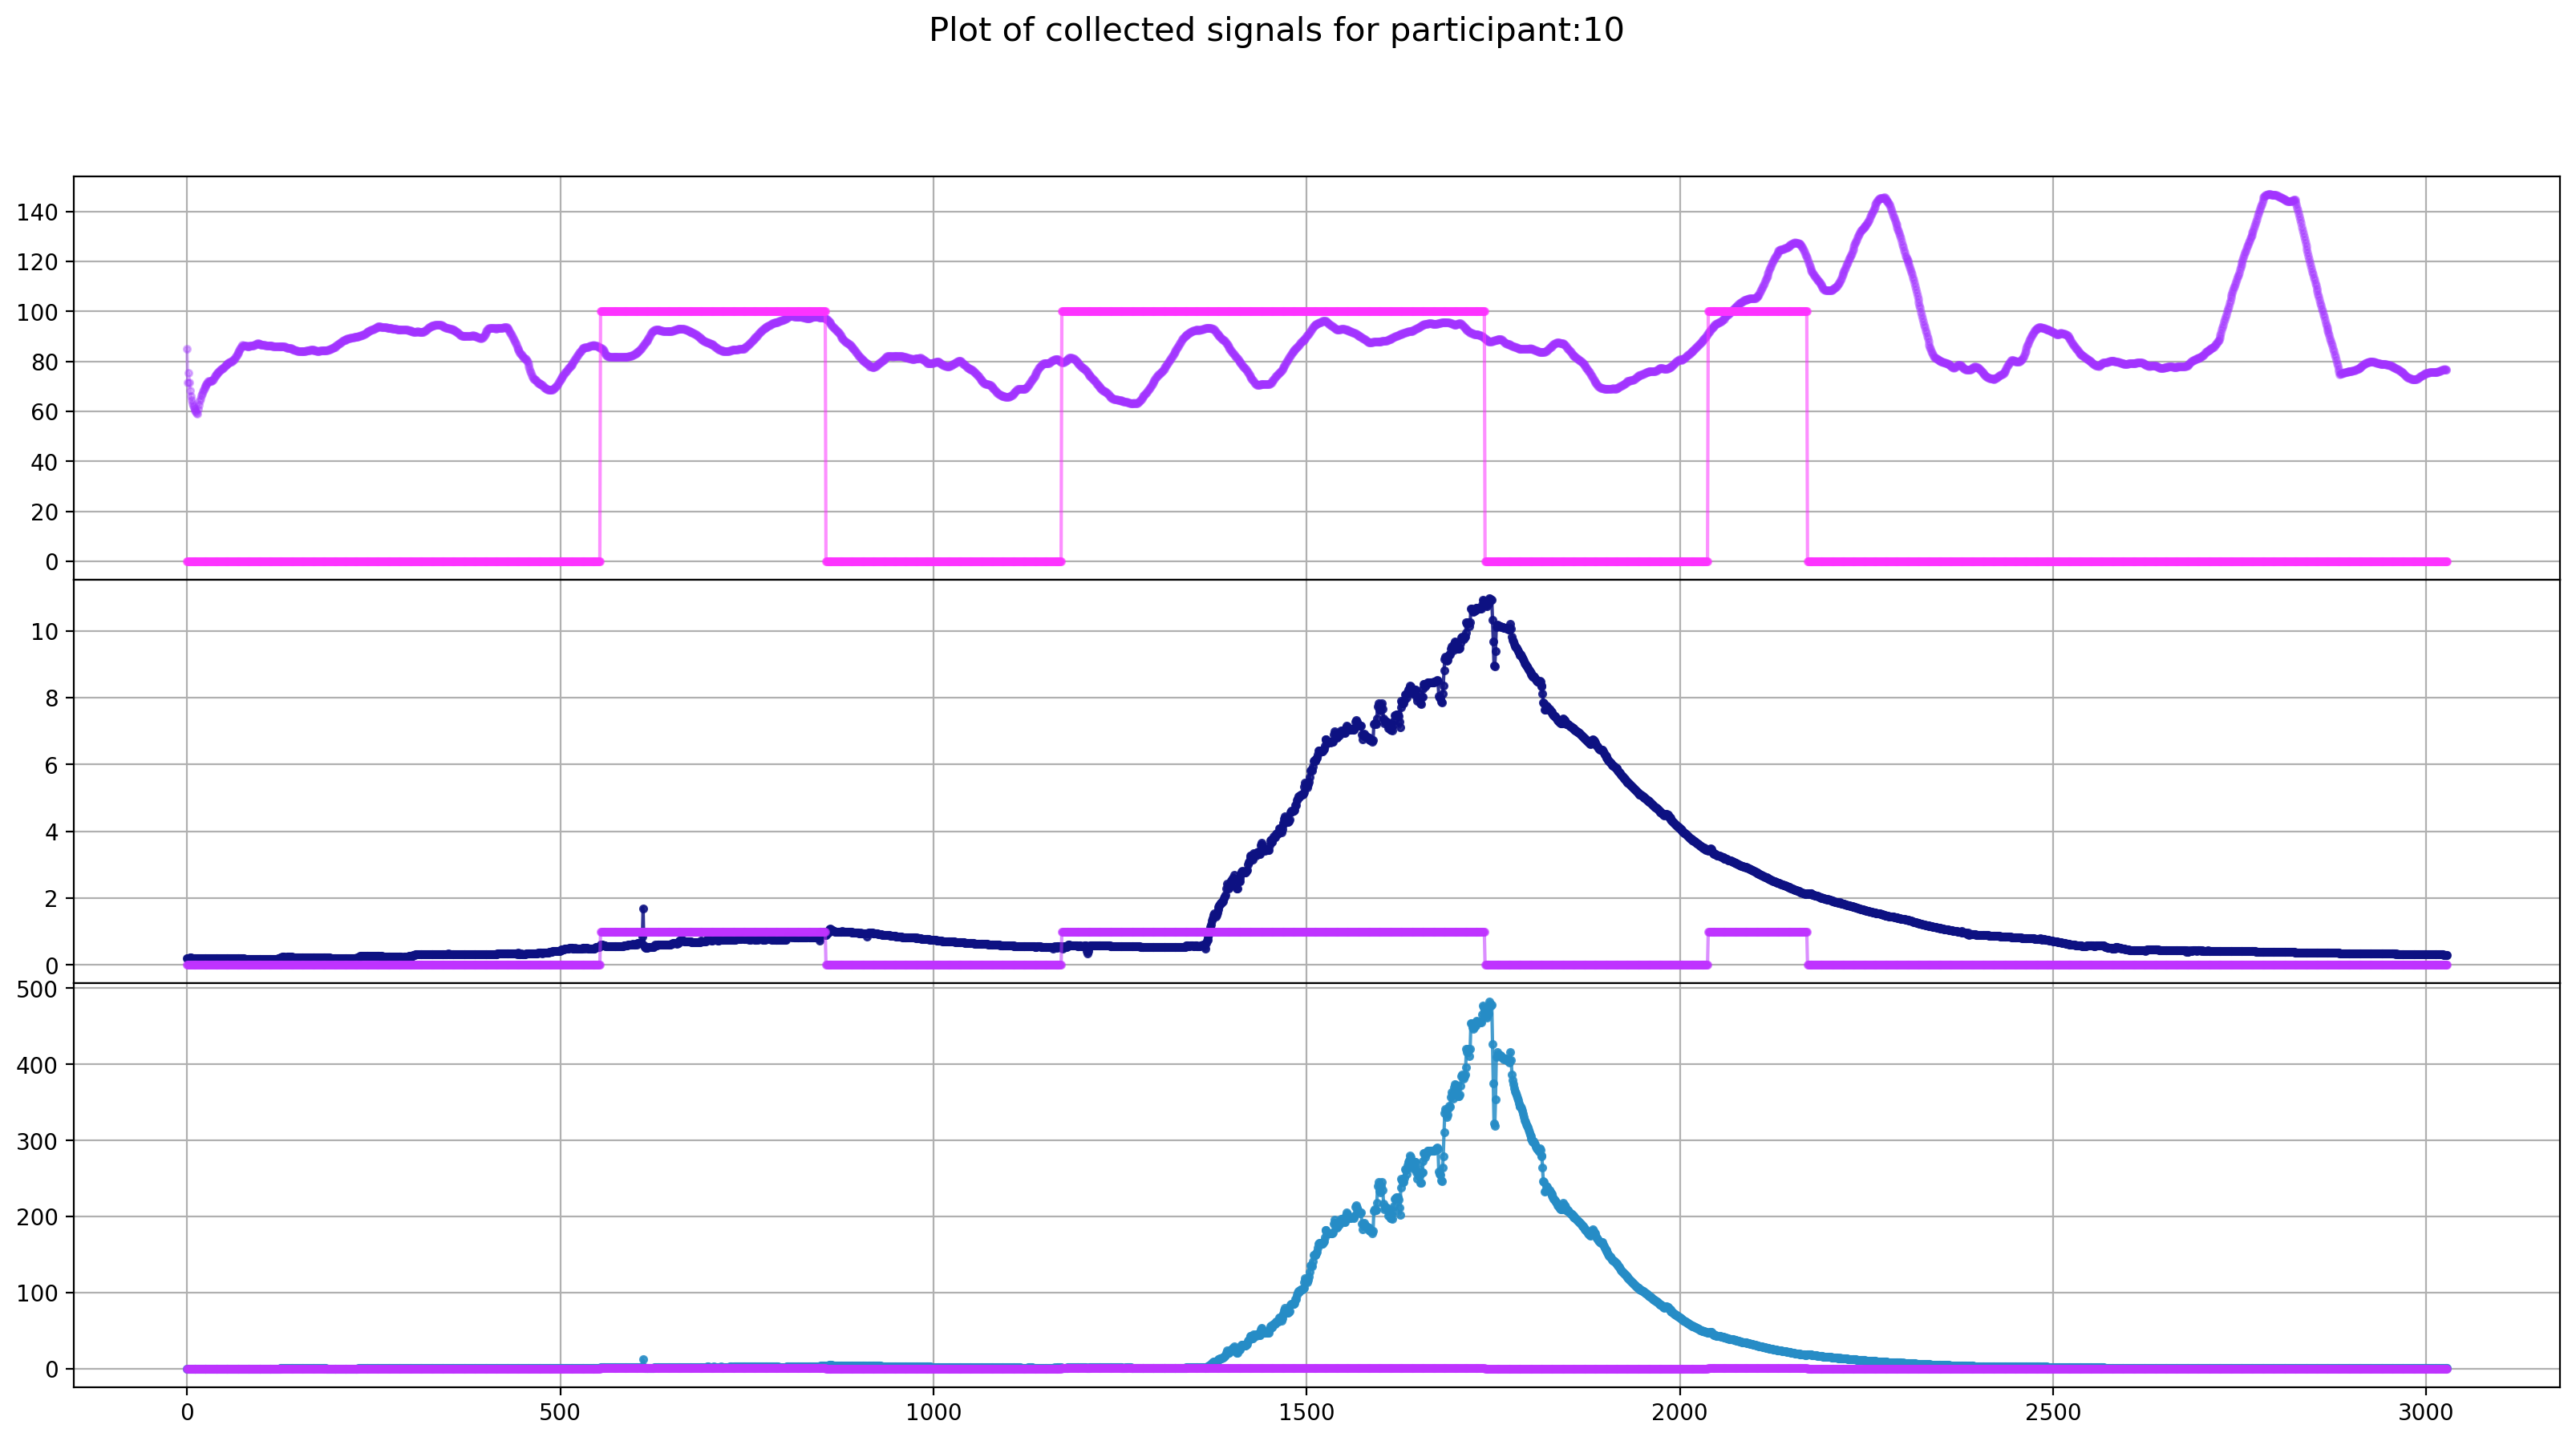

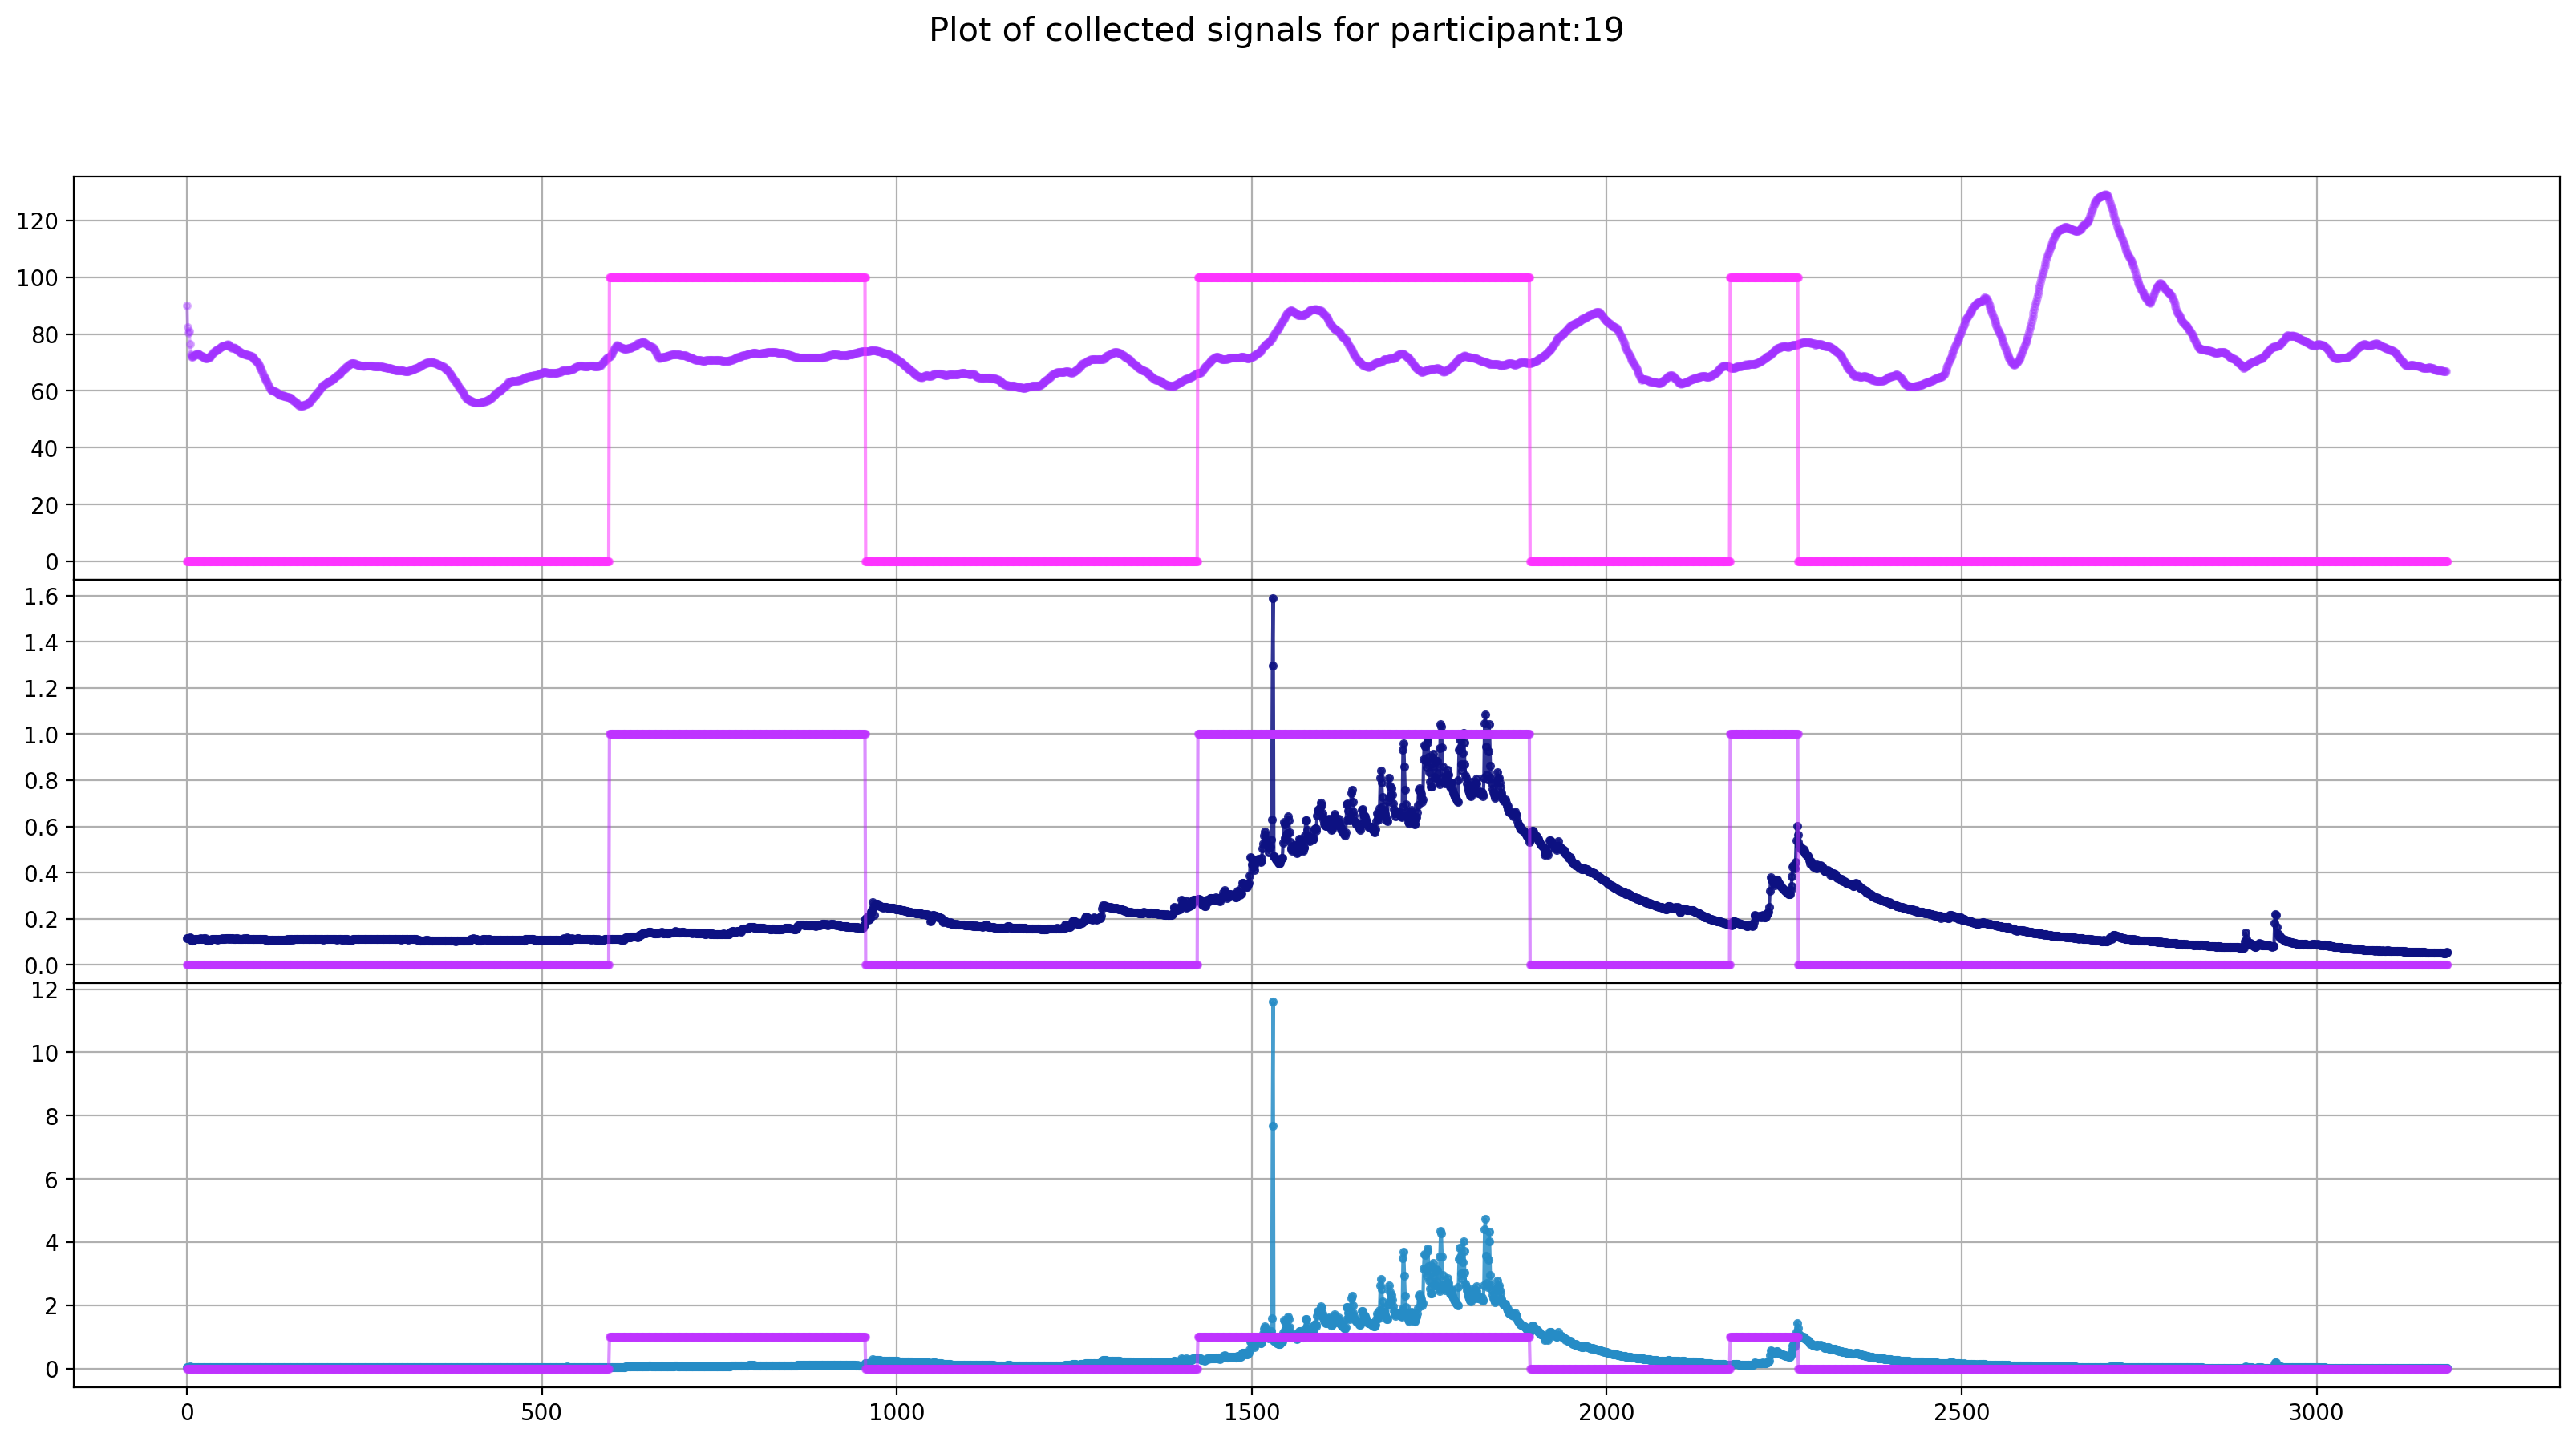

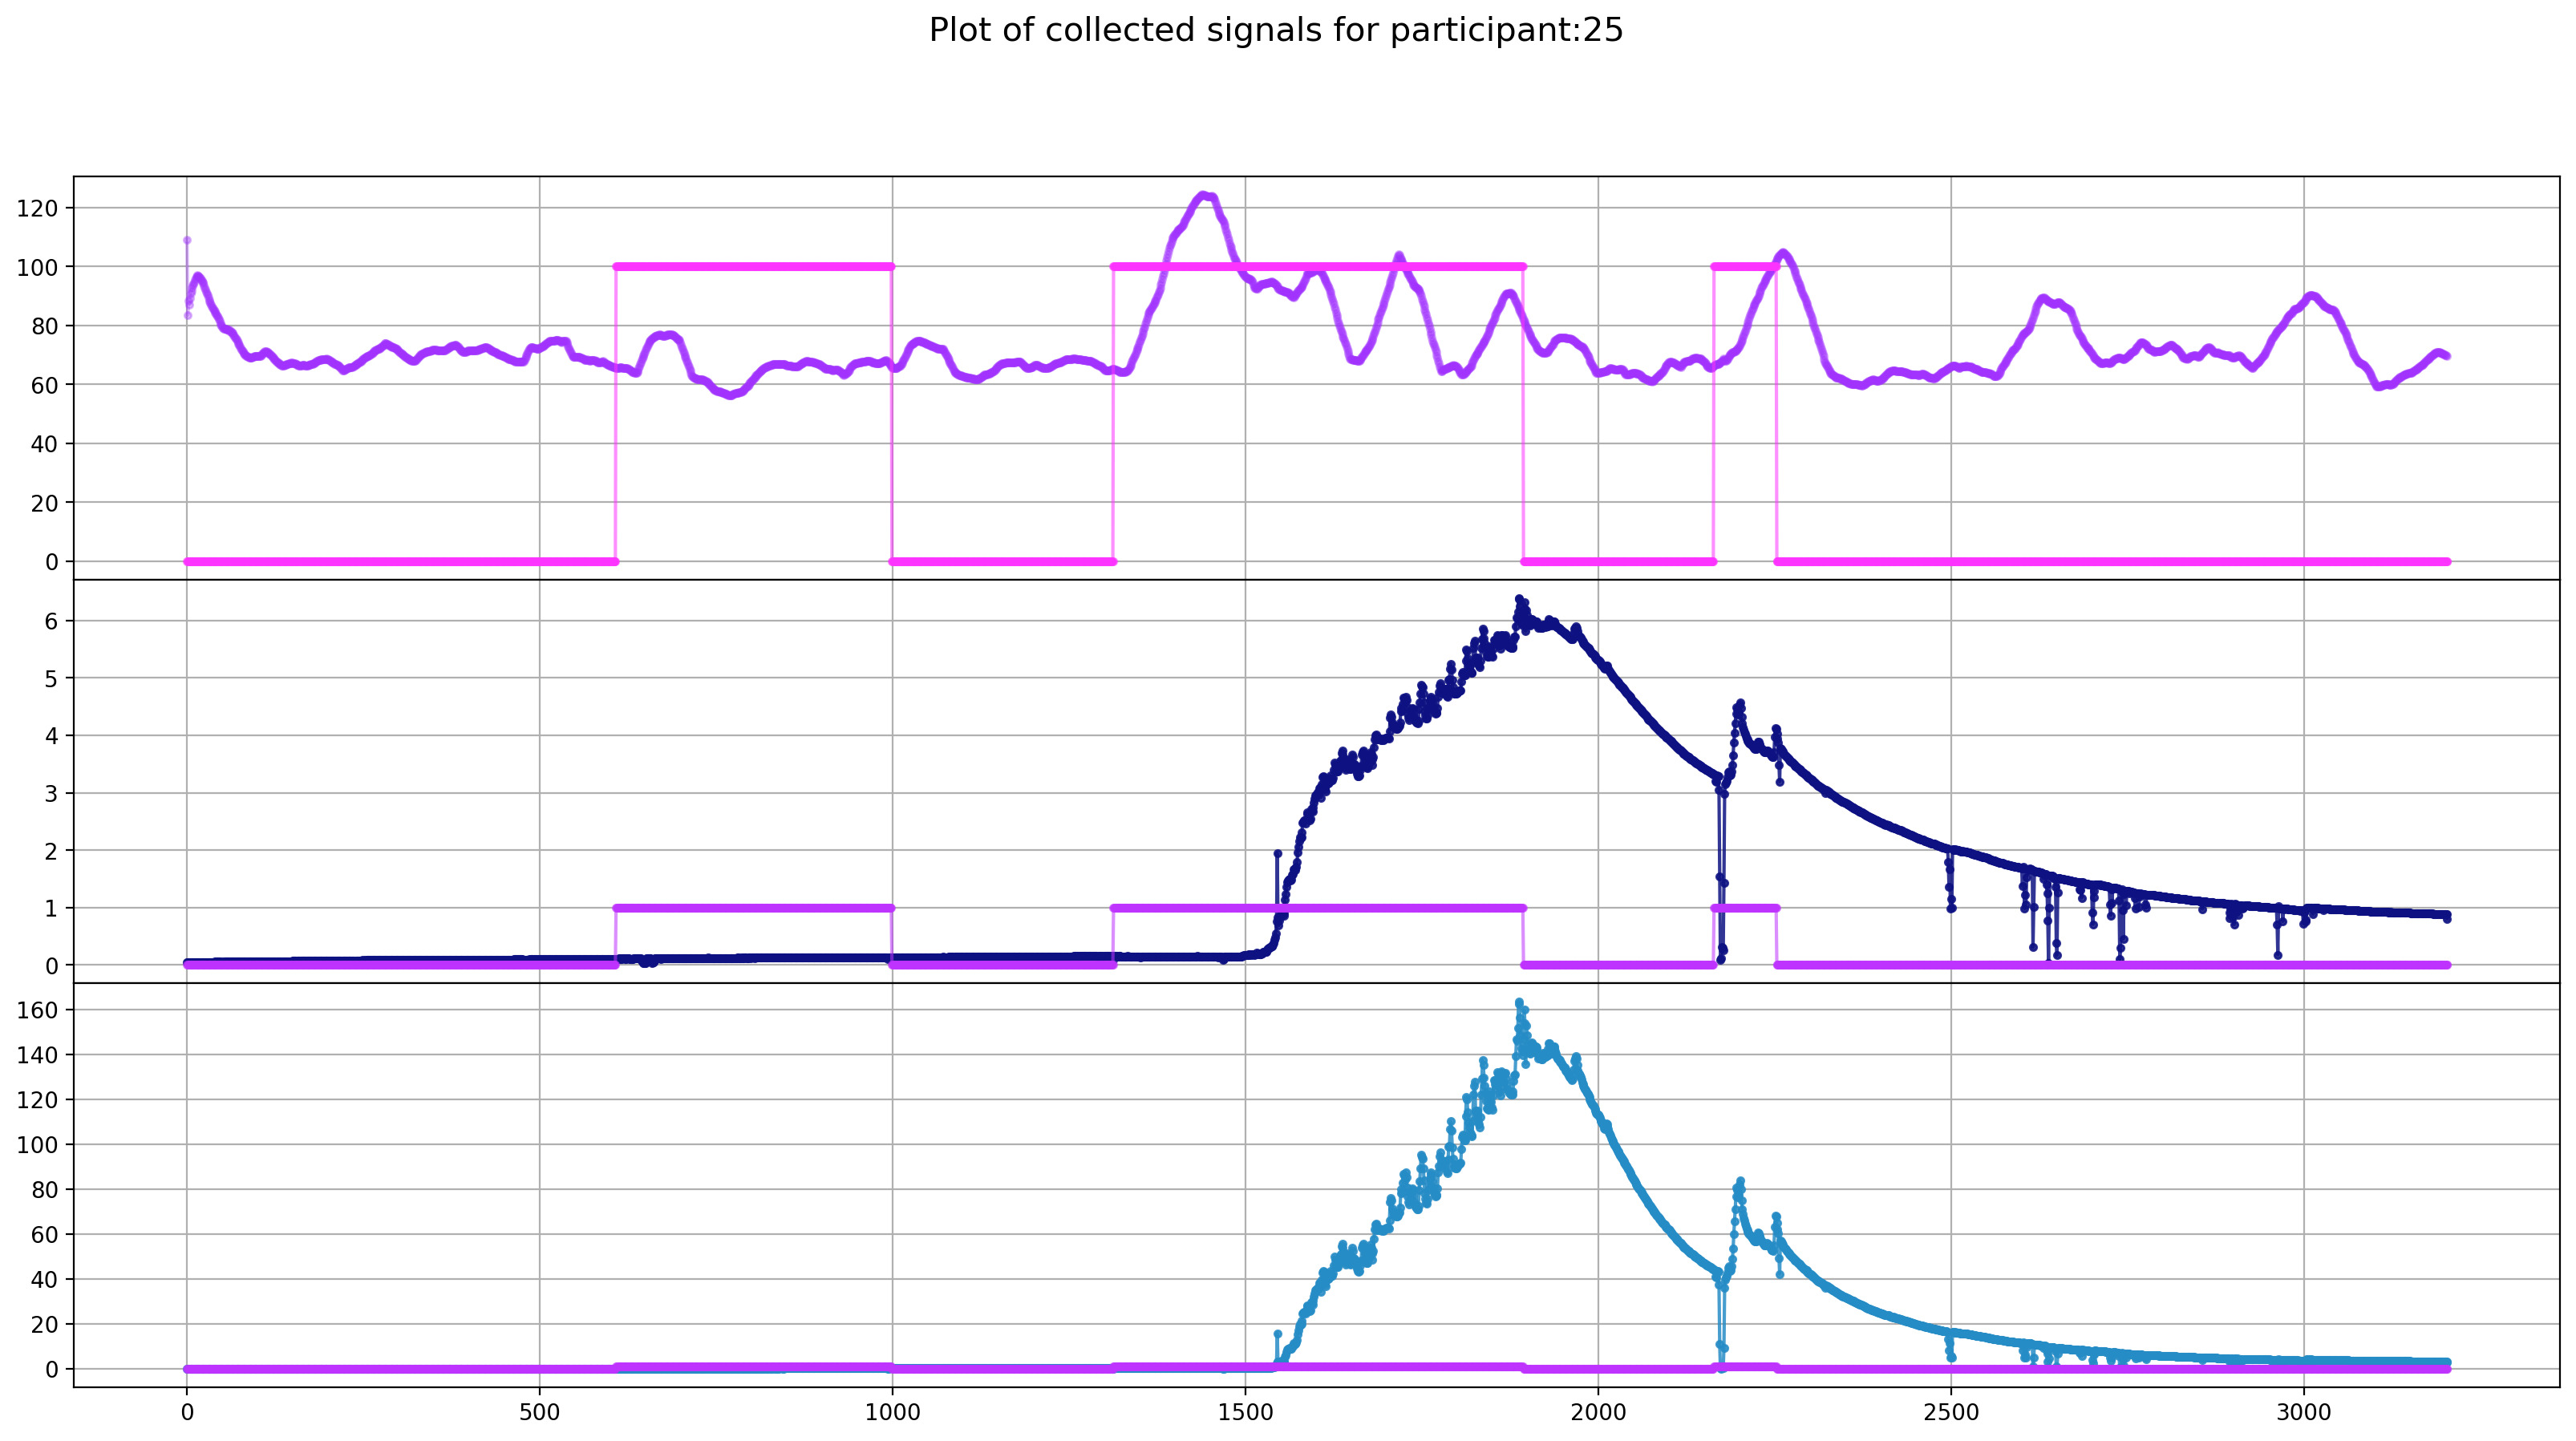

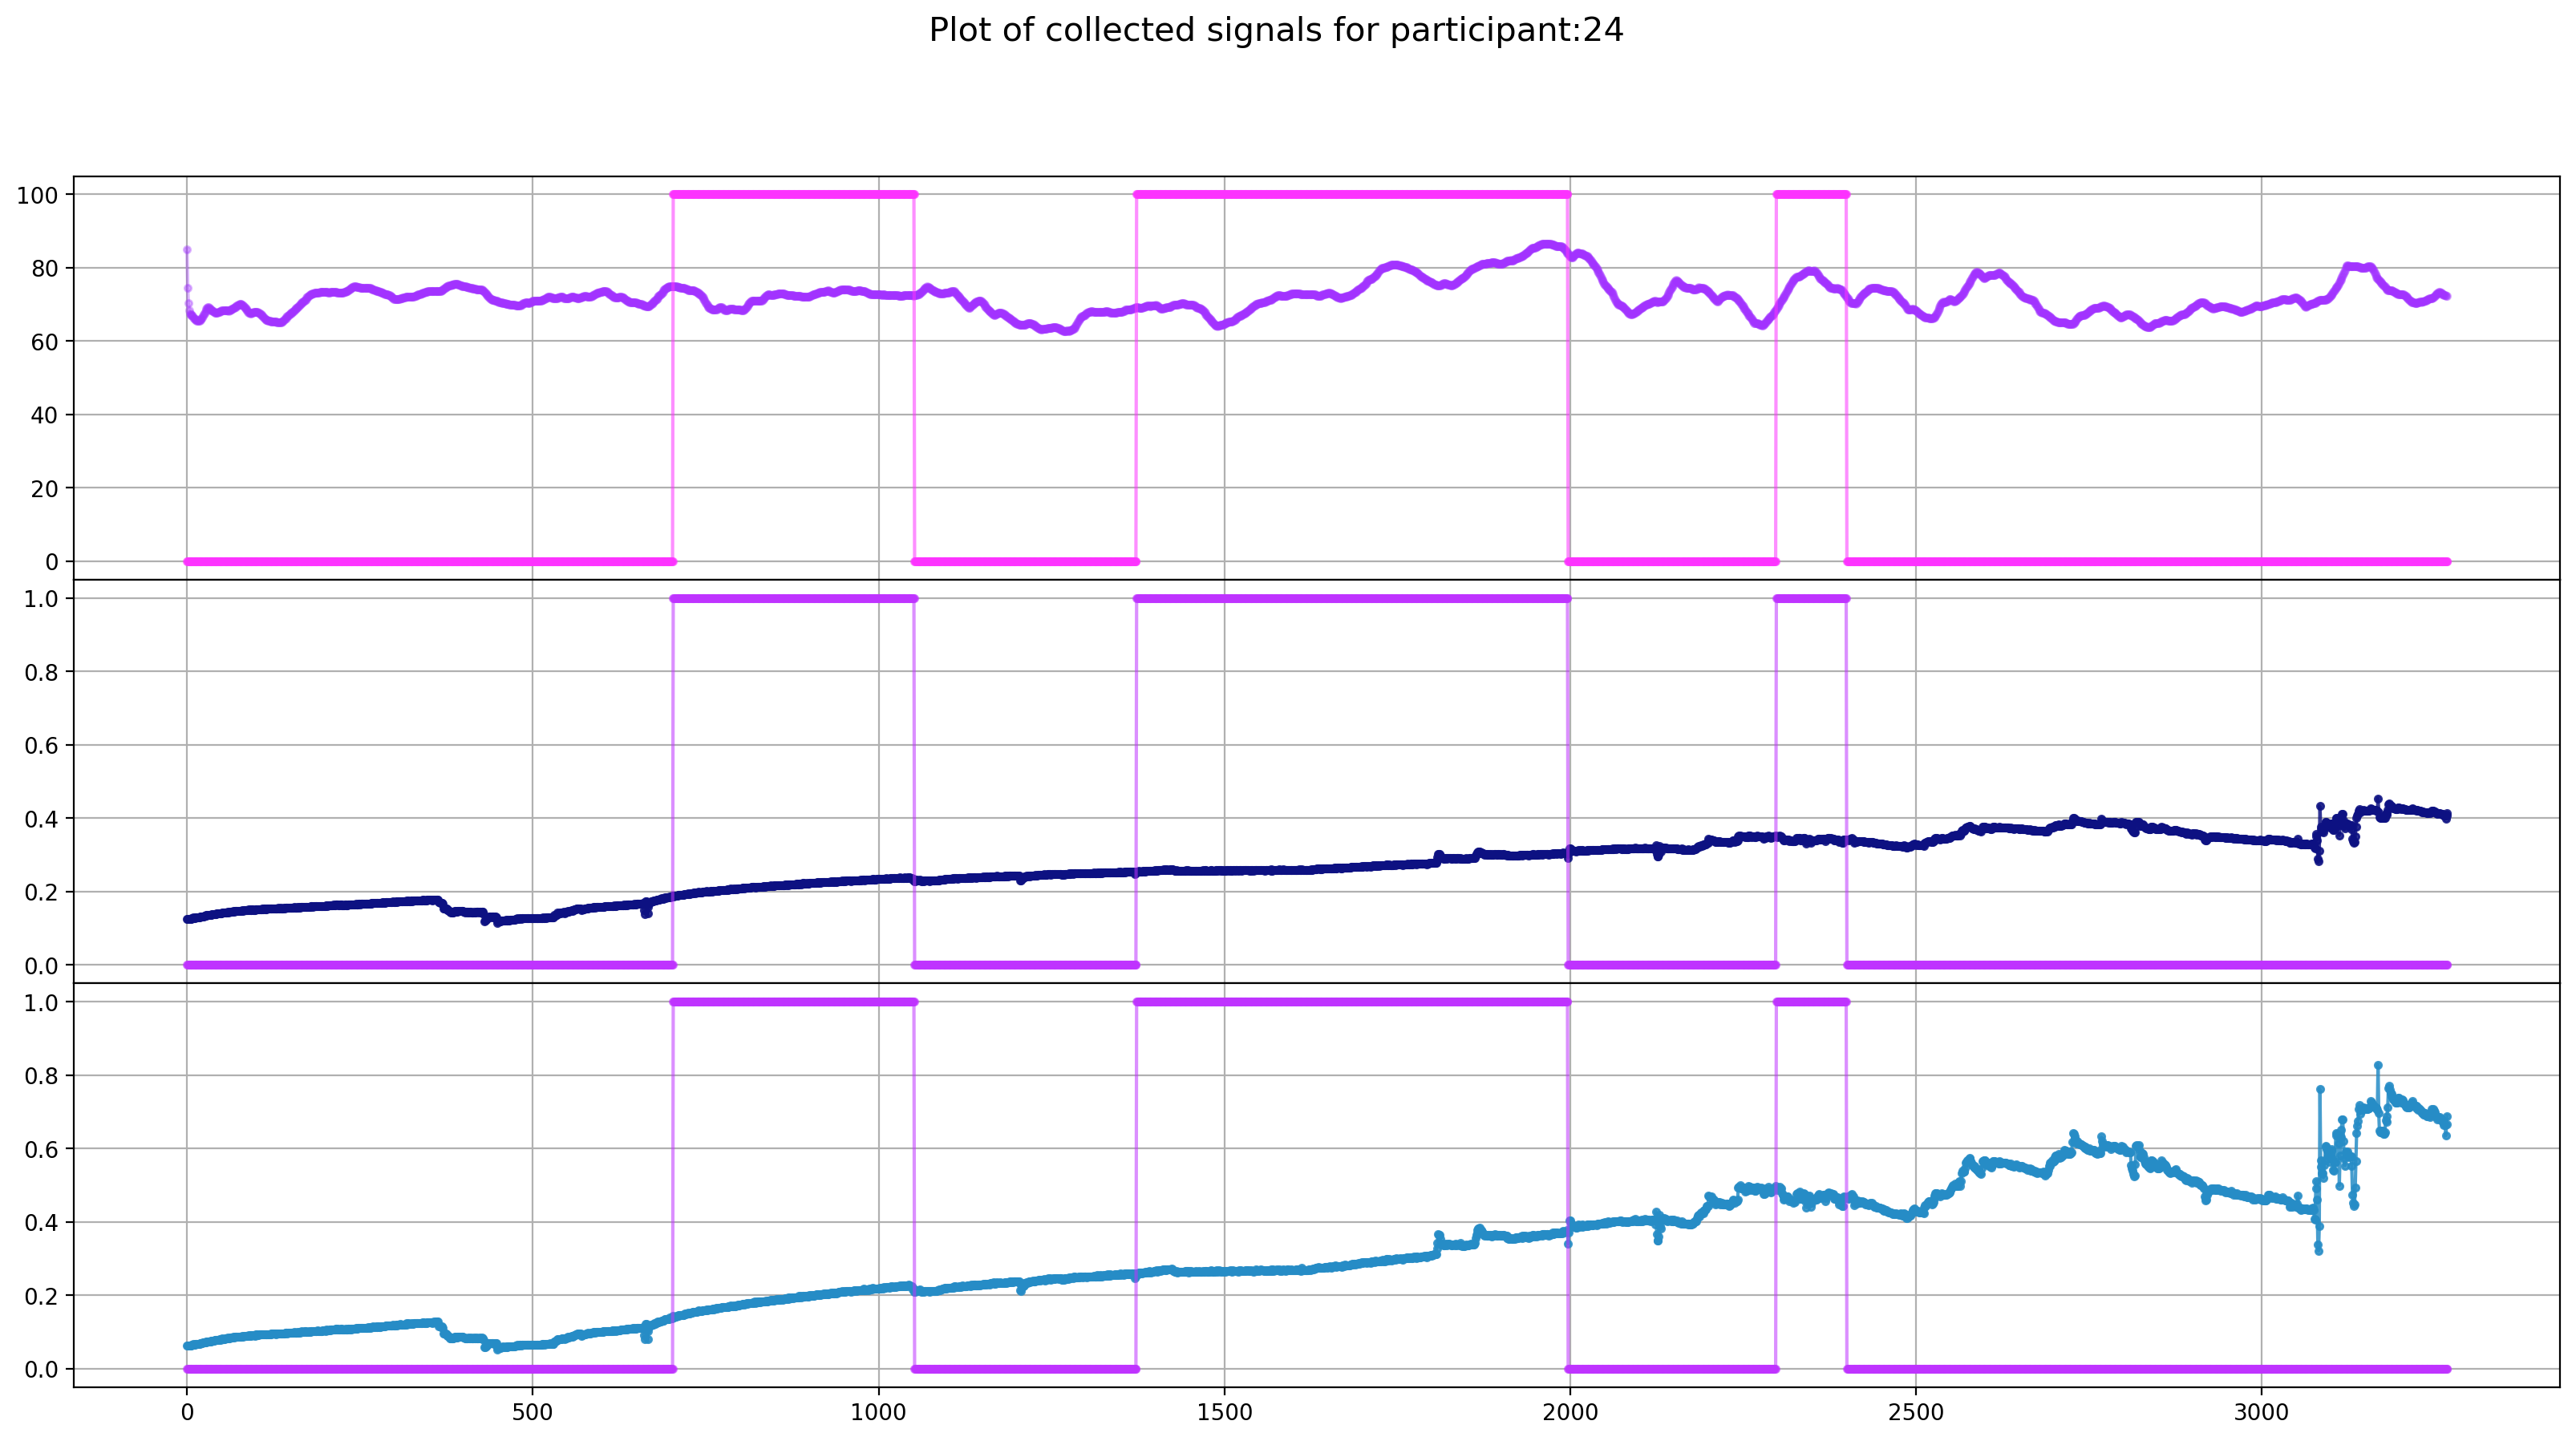

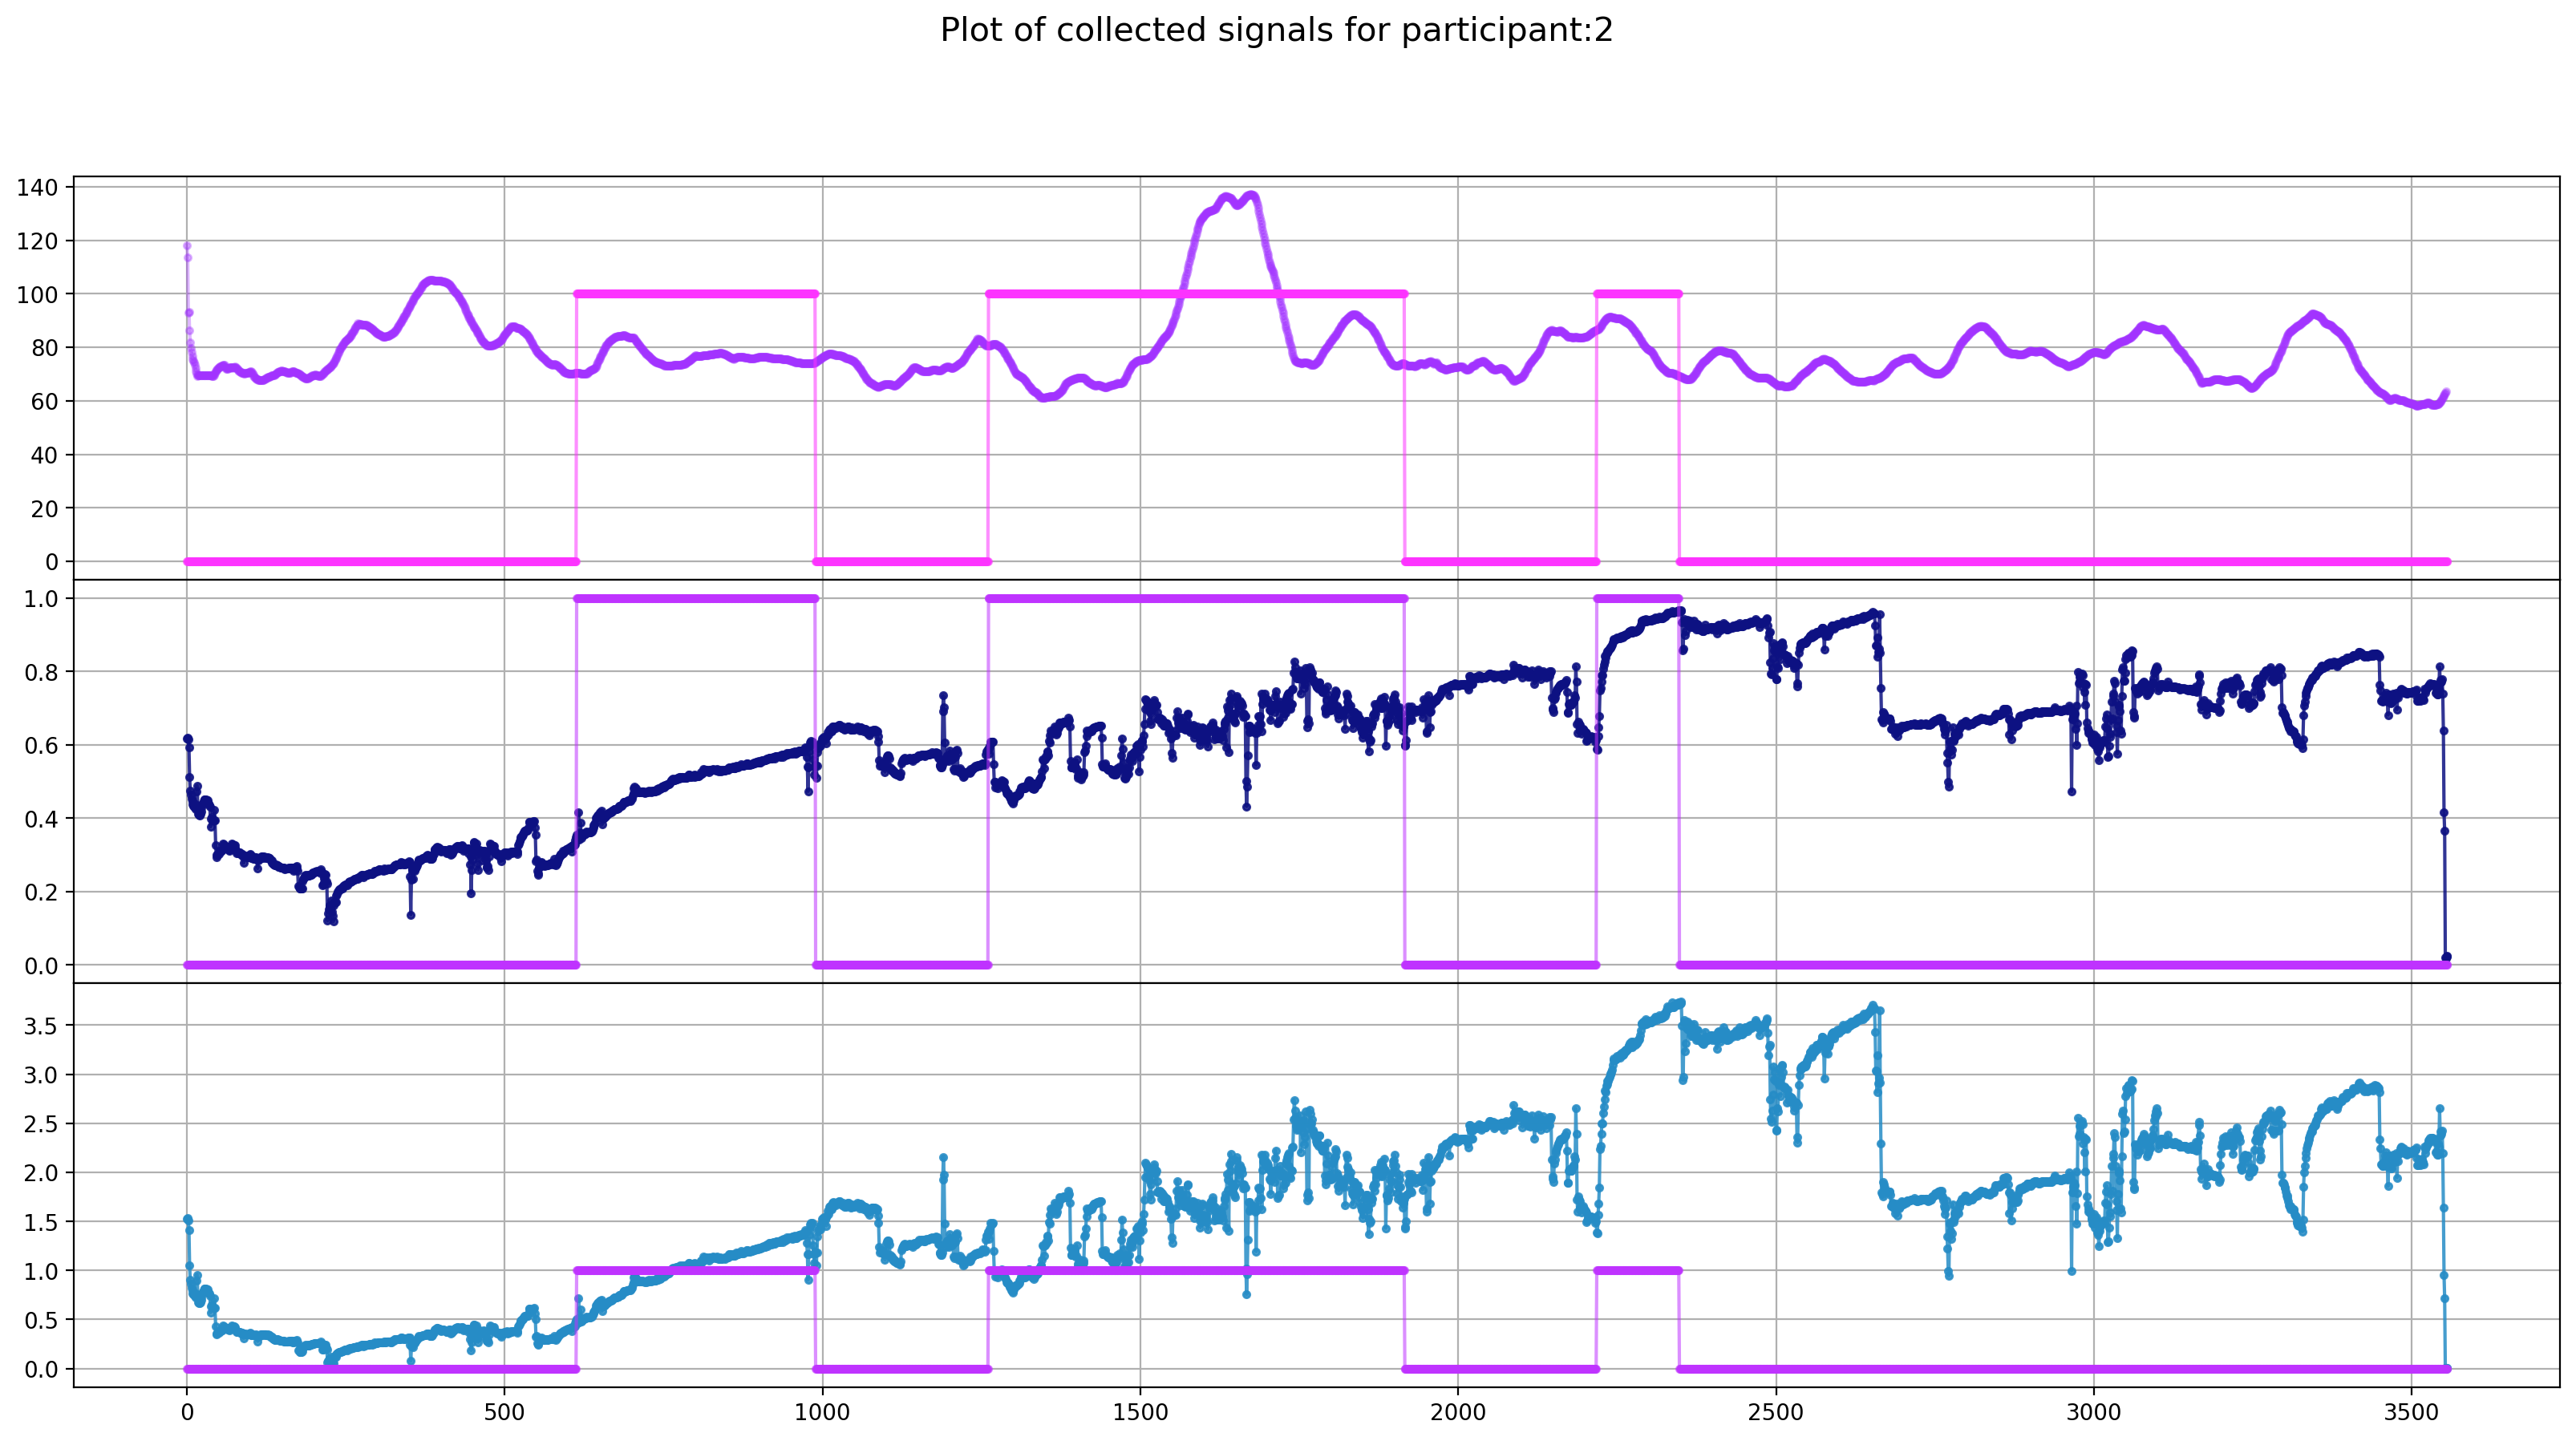

In [33]:
#Here we plot the signal from the final data-set to see how LABEL is match and signal processed are rigth.
#Randomly we choose some of them
i = 0
while(i<=5):
    add=random.randrange(2, 35, 1)
    print('The value is',add)    
    
    y = merge[merge['Participant']==add]
    y.reset_index(inplace=True, drop=False)
    
    x=y.index
    t=x.to_numpy()
    var = y.values.T[2]# HR 
    var1= y.values.T[5]
    var2 = y.values.T[6]#EDA
    var3 = y.values.T[8]#EDA_energy
    
    fig = plt.figure(figsize=(20,10), dpi=200)
    gs = fig.add_gridspec(3, hspace=0)
    axs = gs.subplots(sharex=True)
    #fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle('Plot of collected signals for participant:'+str(add),fontsize = 15)
    
    #axs[0].title(str(add)+"Heart rate at 1Hz",fontsize=15)
    #axs[0].figure()
    axs[0].plot(t, var,'.-',color="#A233FF",alpha=0.35,label="HR")
    axs[0].plot(t, var1*100,'.-',color="#FD33FF",alpha=0.55,label="Label")
    axs[0].grid('True')
    
    axs[1].plot(t, var2,'.-',color="#0D1182",alpha=0.85,label="EDA")
    axs[1].plot(t, var1,'.-',color="#bF33FF",alpha=0.55,label="Label")
    axs[1].grid('True')
    
    axs[2].plot(t, var3,'.-',color="#268CC6",alpha=0.85,label="EDA_energy")
    axs[2].plot(t, var1,'.-',color="#bF33FF",alpha=0.55,label="Label")
    axs[2].grid('True')
  
    i = i +1

In [35]:
#As everythings look in order we can continue processing the data. From past figures que can appreciate that EDA signal
#present a little noise. Therefore, to reduce it we will make a second process data
#Working with data sampled at 1Hz look dense to process. We will reduce the data to 30s
merge30 =  pd.DataFrame(columns=['Participant', 'HR','EDA','Temp','Label','EDA_ene'])
resampling = 30
for add in range(2,36):
    x = pd.DataFrame()
    x = merge[merge['Participant']==add]
    x.reset_index(inplace=True, drop=False)
    hr = 0
    EDA =0
    eda_ene = 0
    t = 0
    label = 0
    i = 0
    for y in range(0,len(x)):
        hr = hr+x['HR'][y]
        EDA = EDA+x['EDA_1Hz'][y]
        eda_ene = eda_ene+x['EDA_1Hz'][y]*x['EDA_1Hz'][y]
        t = t+x['Temp_1Hz'][y]
        label= label+x['Label'][y]
        i = i+1
        if i==resampling:
            #print(hr/resampling, EDA/resampling,t/resampling,label/resampling)
            merge30 = merge30.append({'Participant':add,'HR':hr/resampling,'EDA':EDA/resampling, 'Temp': t/resampling,'Label':round(label/resampling), 'EDA_ene':eda_ene}, ignore_index=True)
            #reset all variables!
            i = 0
            hr = 0
            EDA =0
            t = 0
            label = 0
            eda_ene = 0
print(len(merge30))
      

3731


In [36]:
merge30[merge30['Participant']==4]

Participant         HR       EDA       Temp  Label    EDA_ene
228          4.0  73.634000  1.052438  33.885333    0.0  33.264439
229          4.0  81.216667  0.934541  33.795000    0.0  26.241551
230          4.0  82.750000  0.826232  33.707333    0.0  20.522326
231          4.0  82.617667  0.737836  33.708667    0.0  16.350118
232          4.0  85.691667  0.704769  33.786667    0.0  14.922346
..           ...        ...       ...        ...    ...        ...
340          4.0  67.661667  0.455304  35.345667    0.0   6.219322
341          4.0  66.807333  0.449015  35.342667    0.0   6.048494
342          4.0  65.469333  0.450660  35.339667    0.0   6.093695
343          4.0  64.887000  0.448631  35.366000    0.0   6.038384
344          4.0  70.248667  0.528224  35.357000    0.0   9.632264

[117 rows x 6 columns]

The value is 20
The value is 21
The value is 32
The value is 10
The value is 7
The value is 15
The value is 9
The value is 11


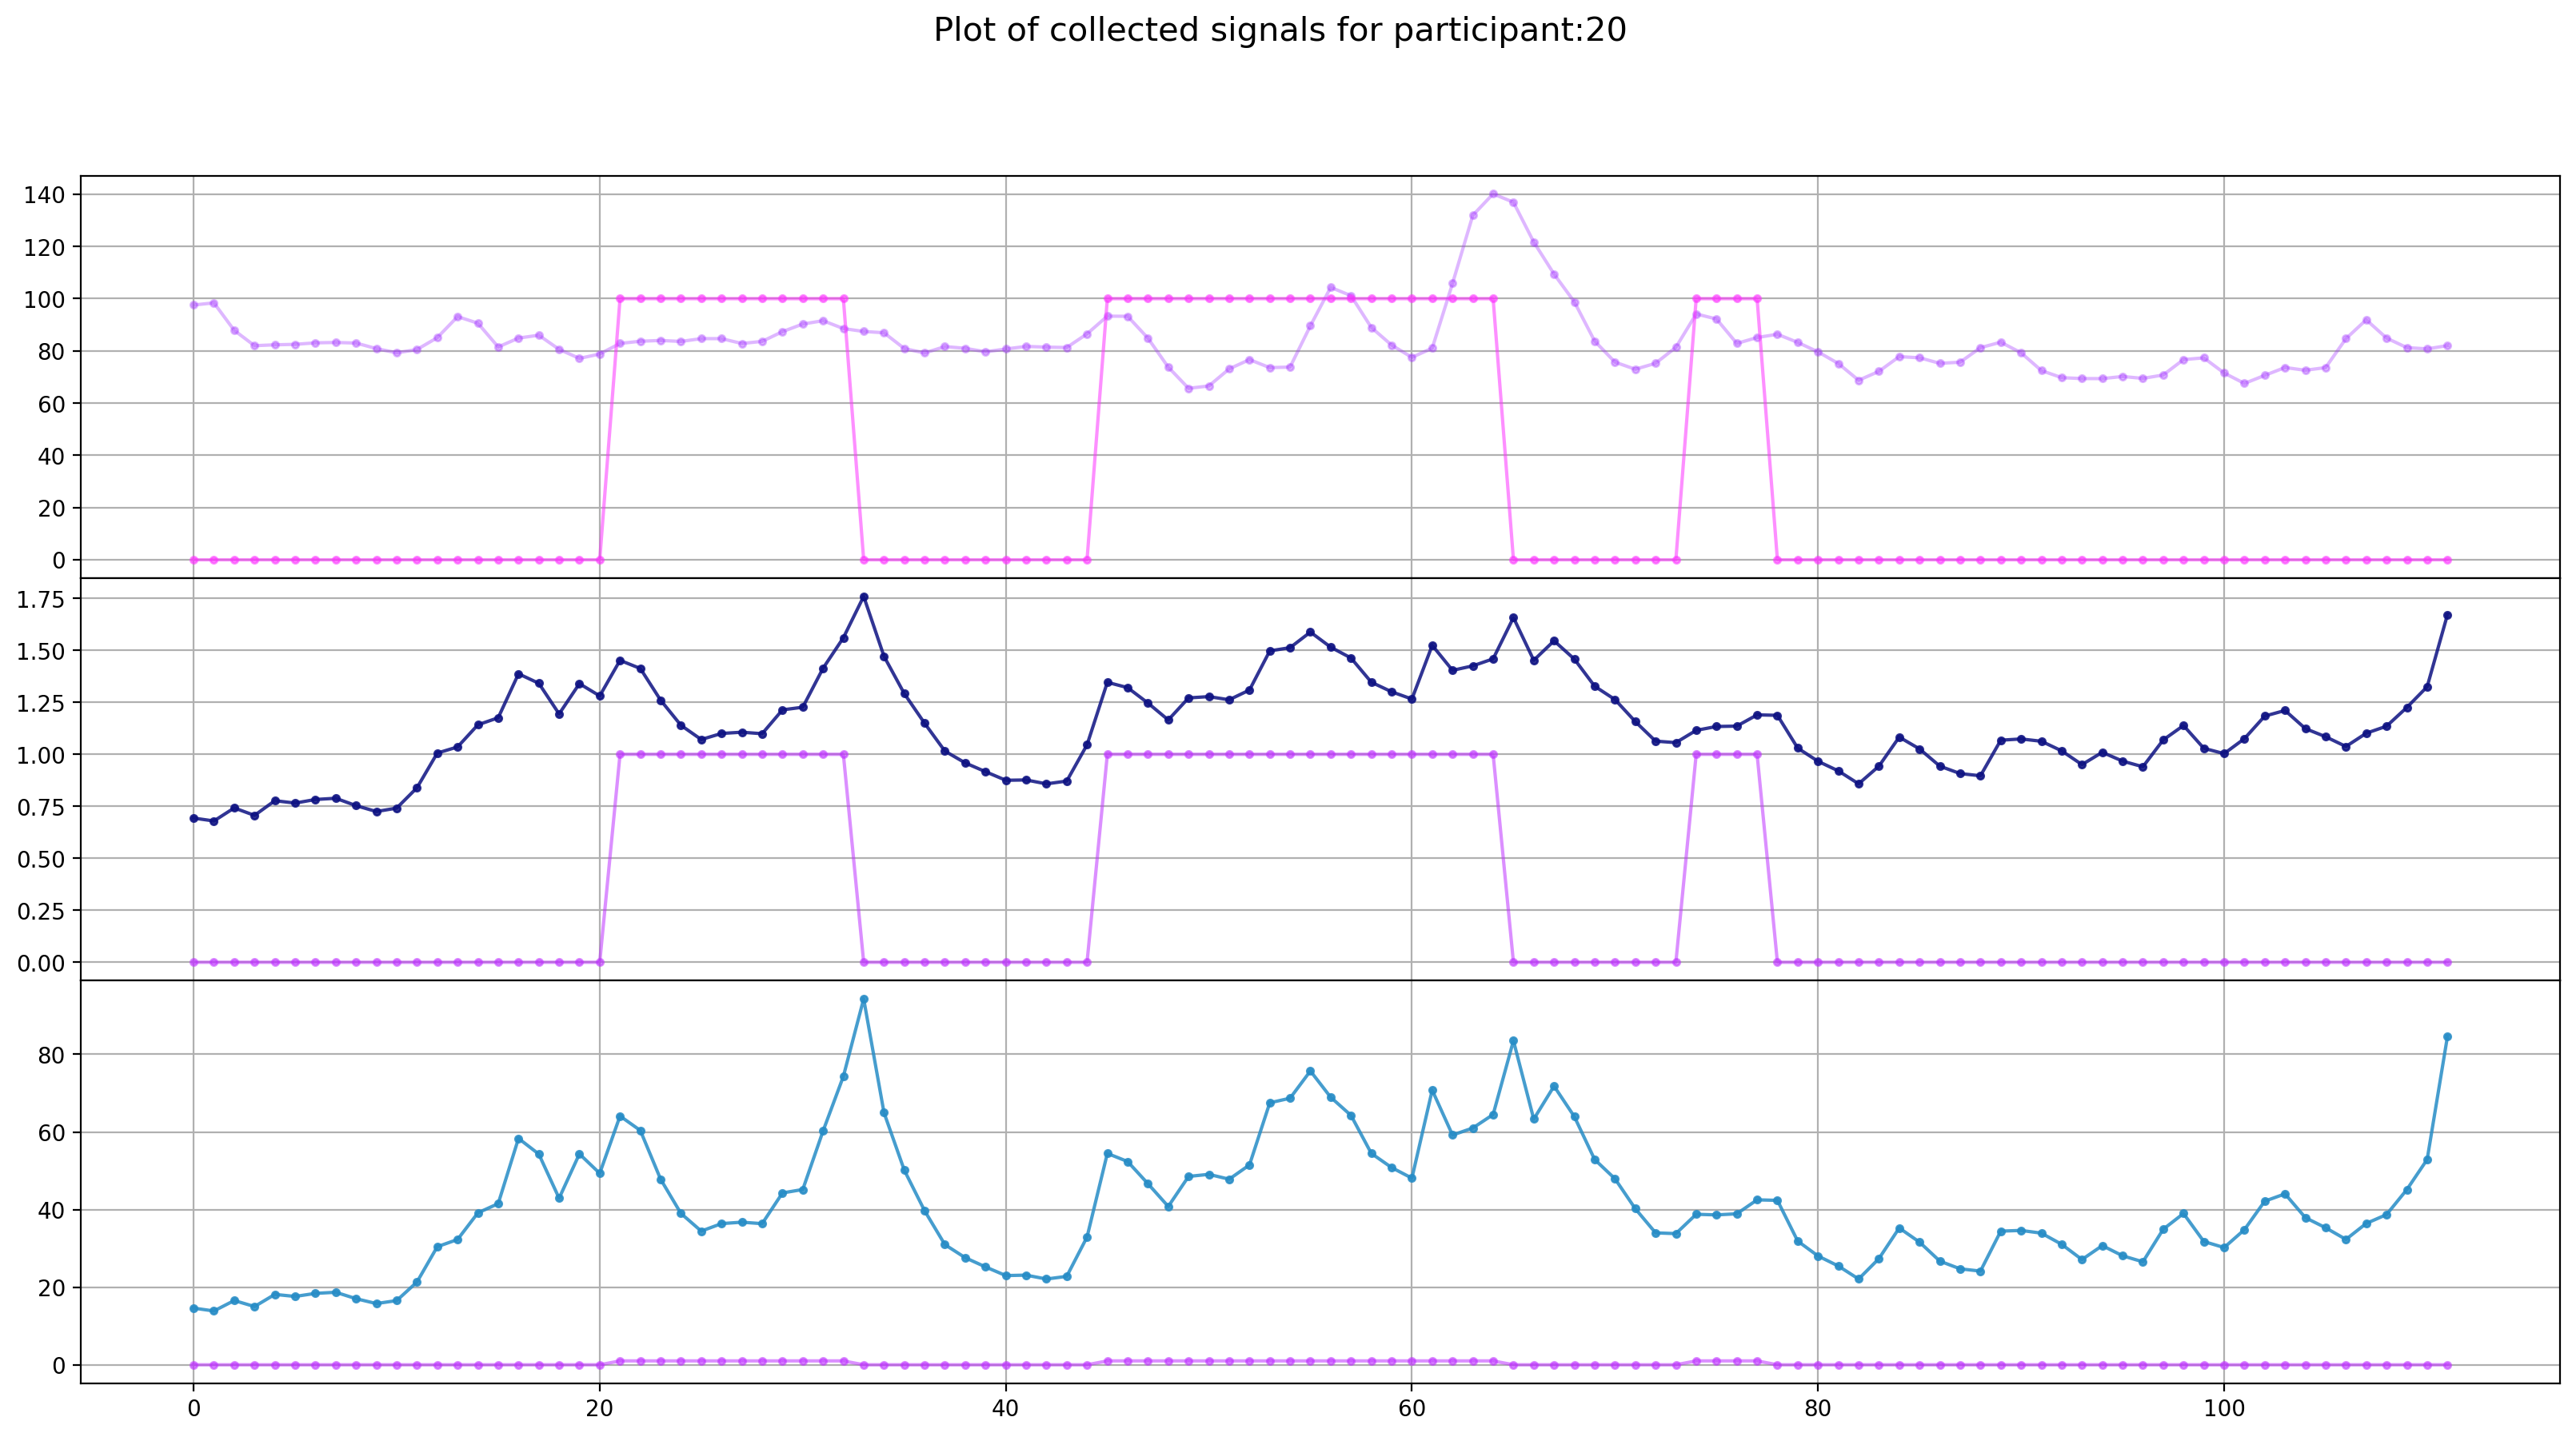

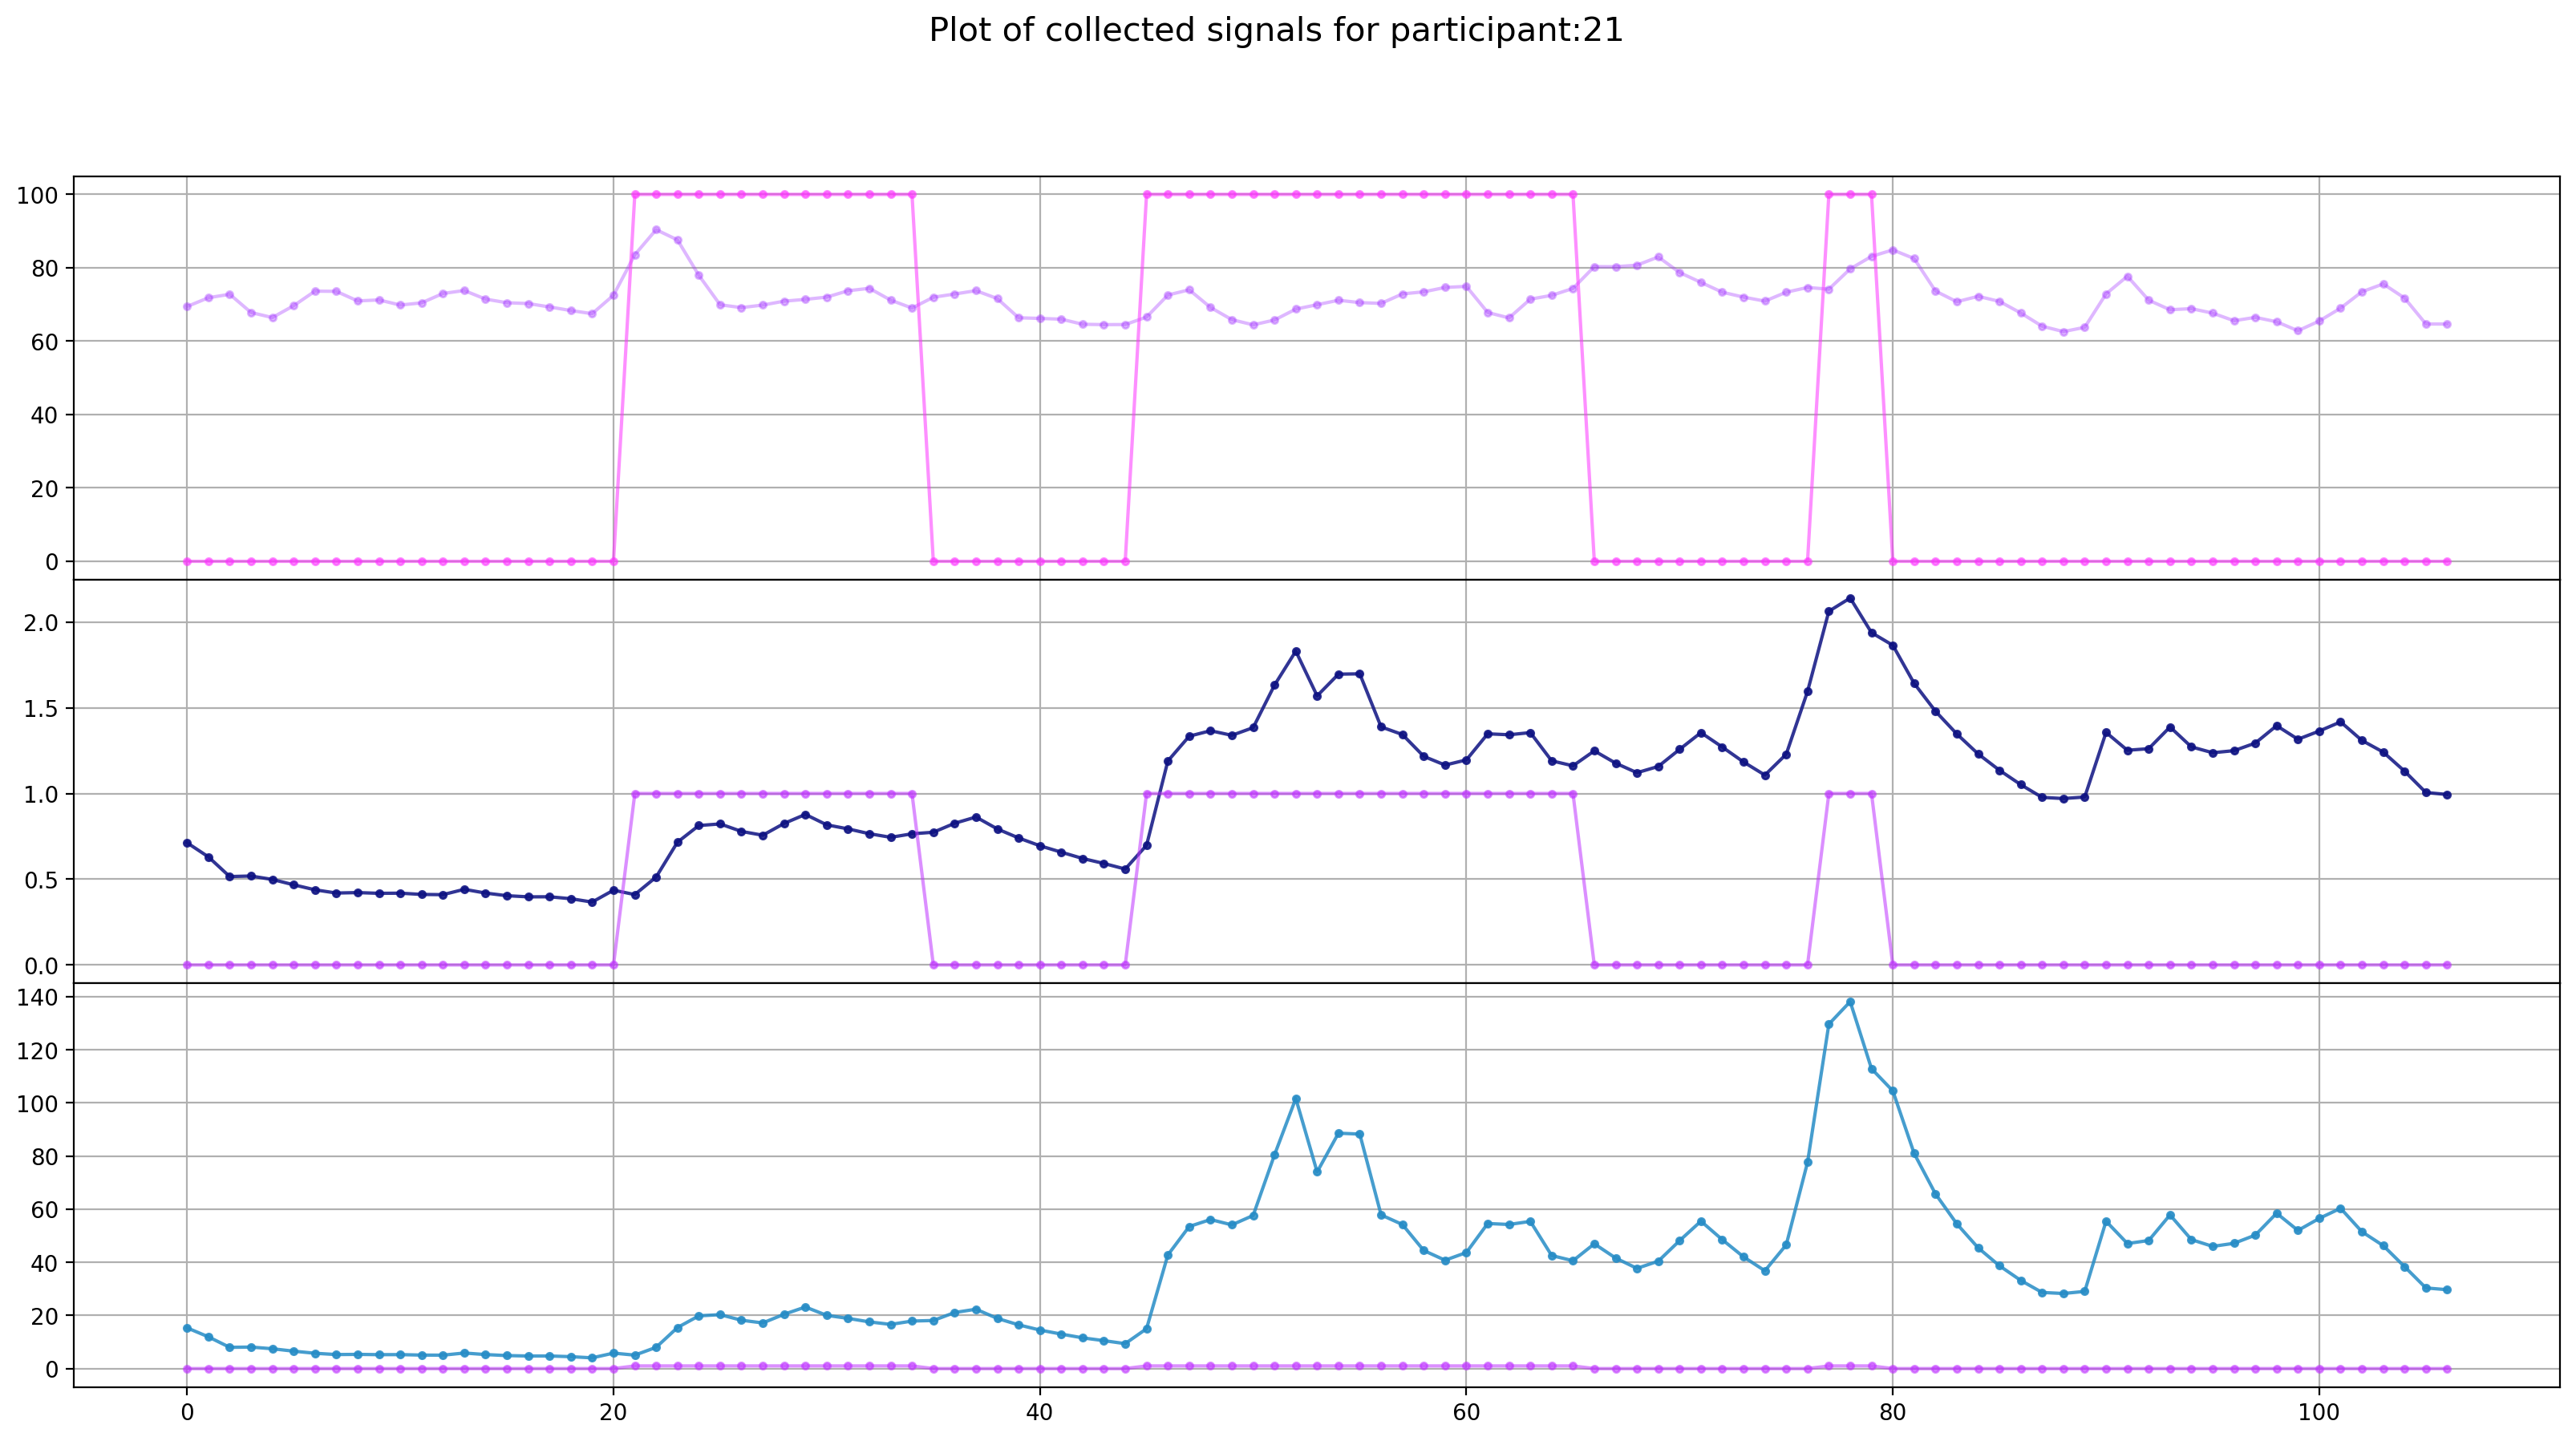

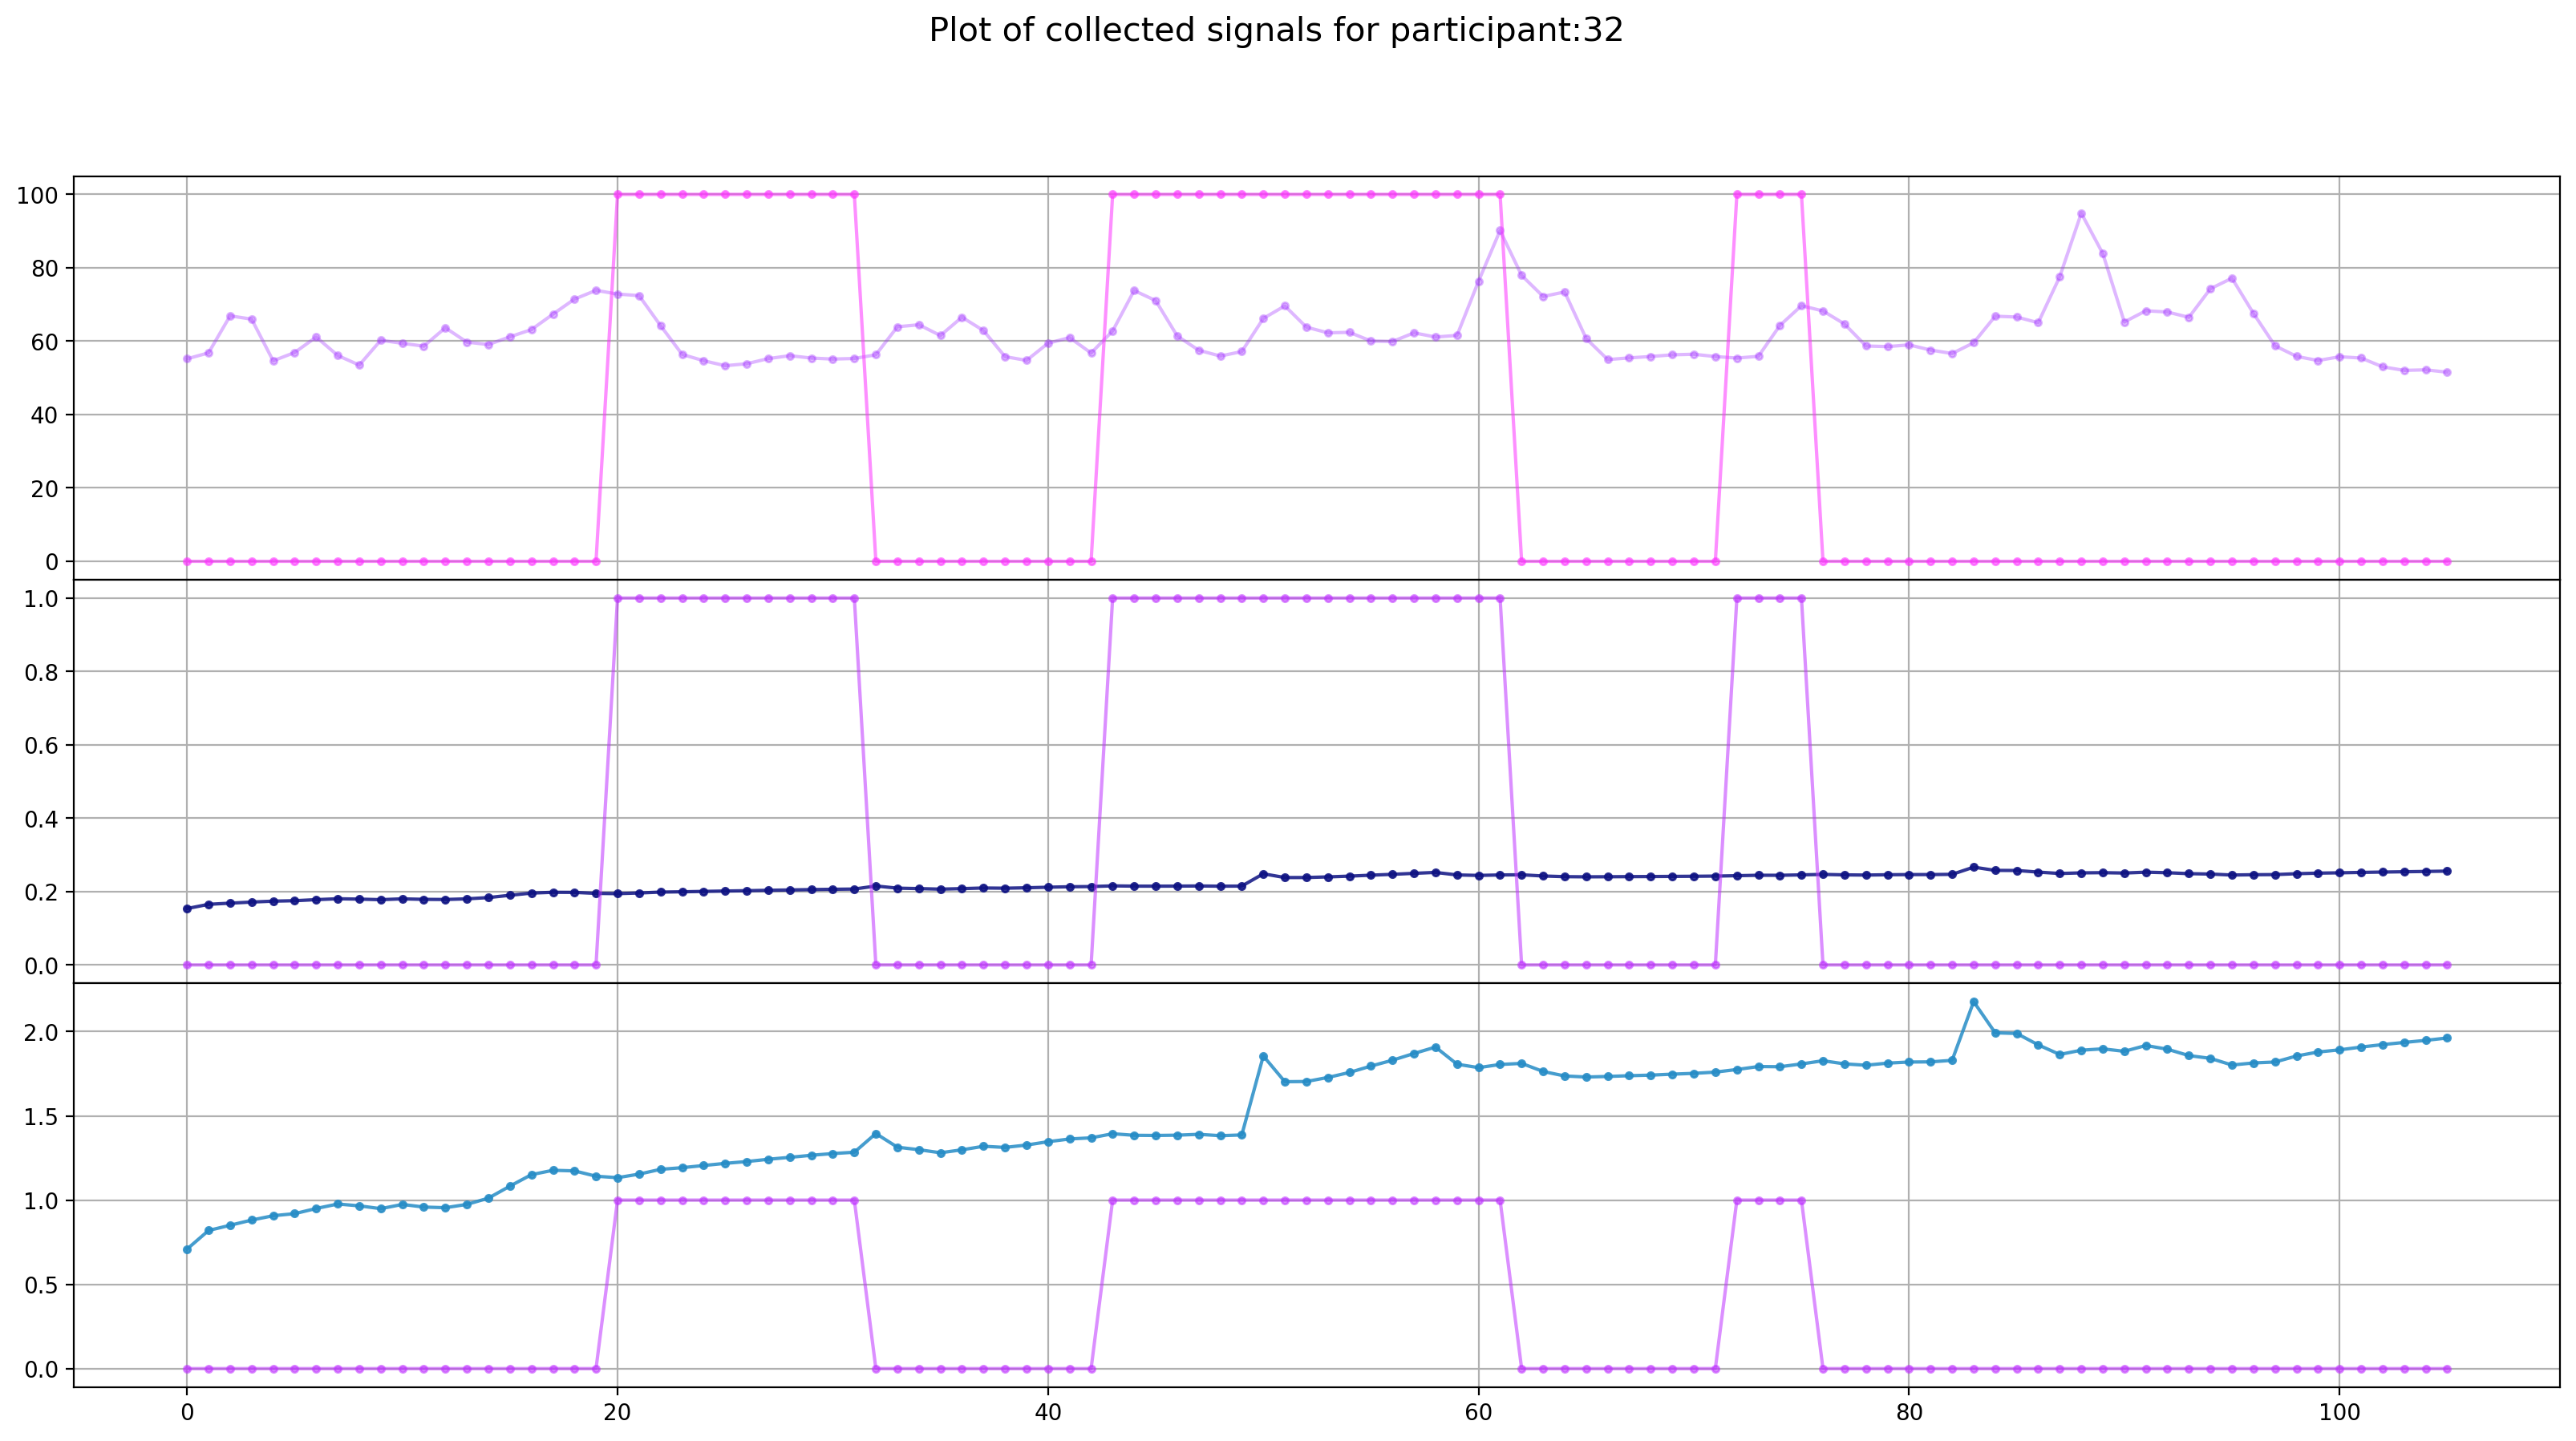

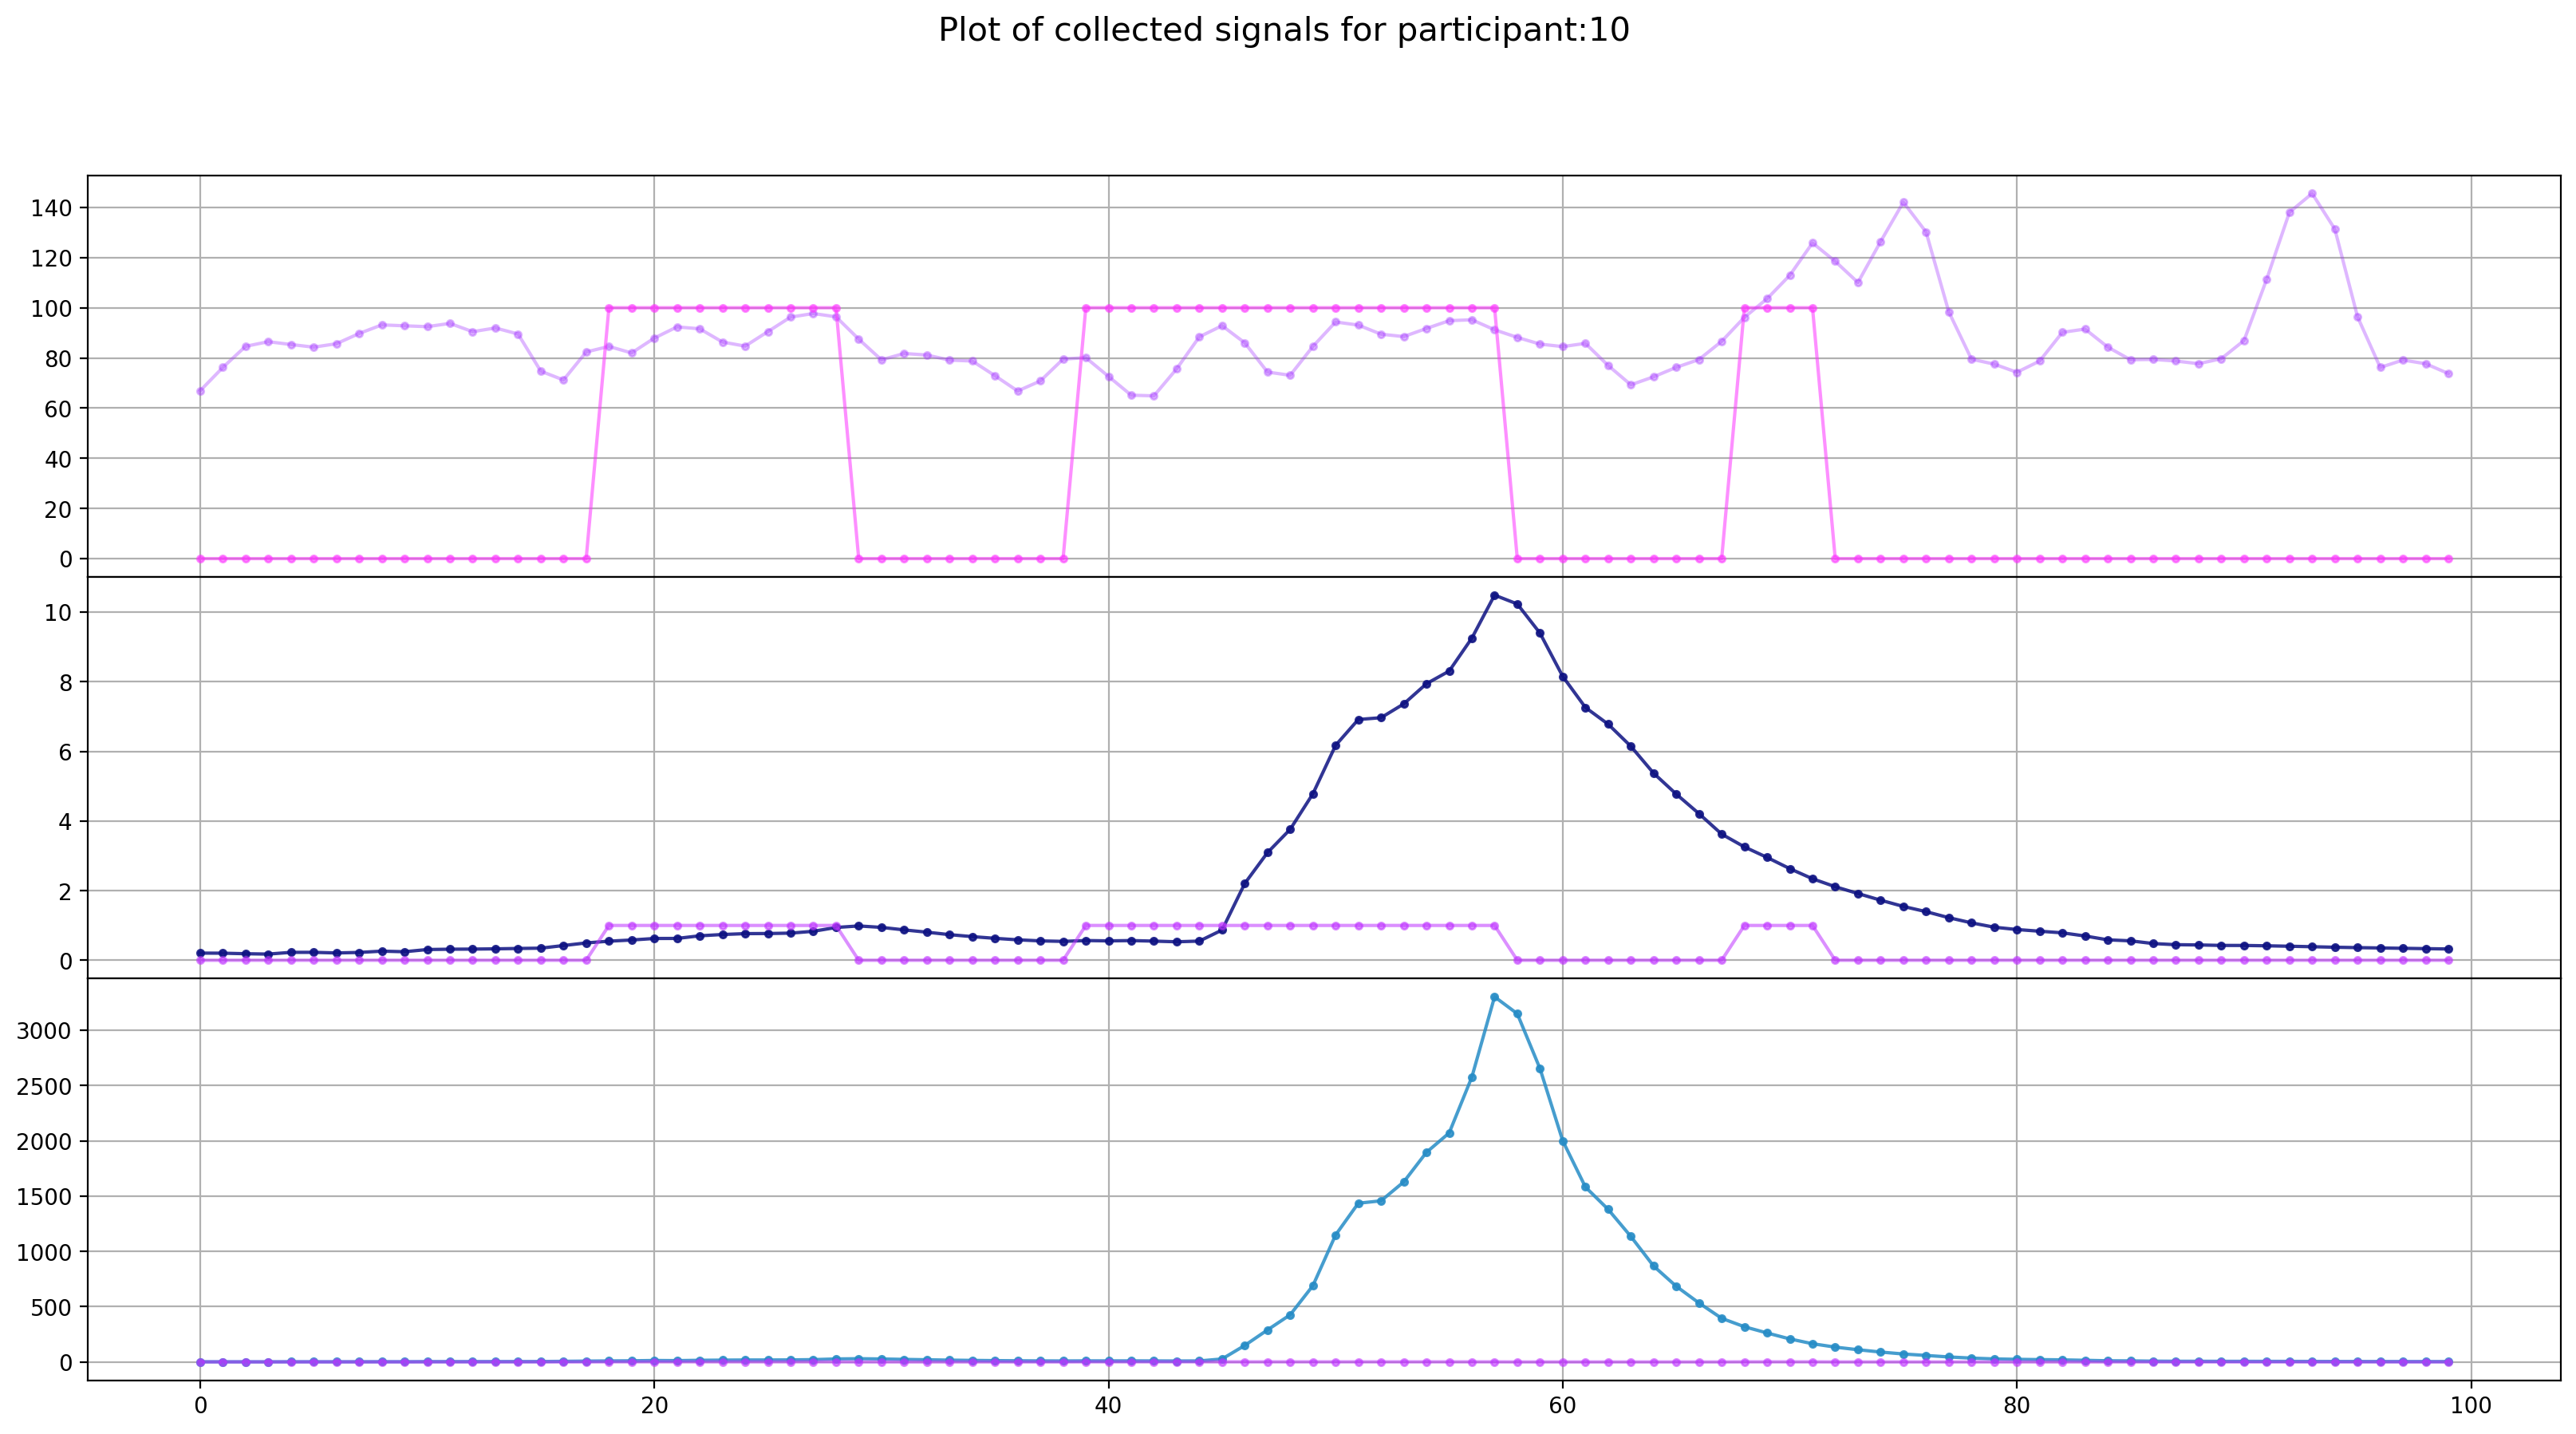

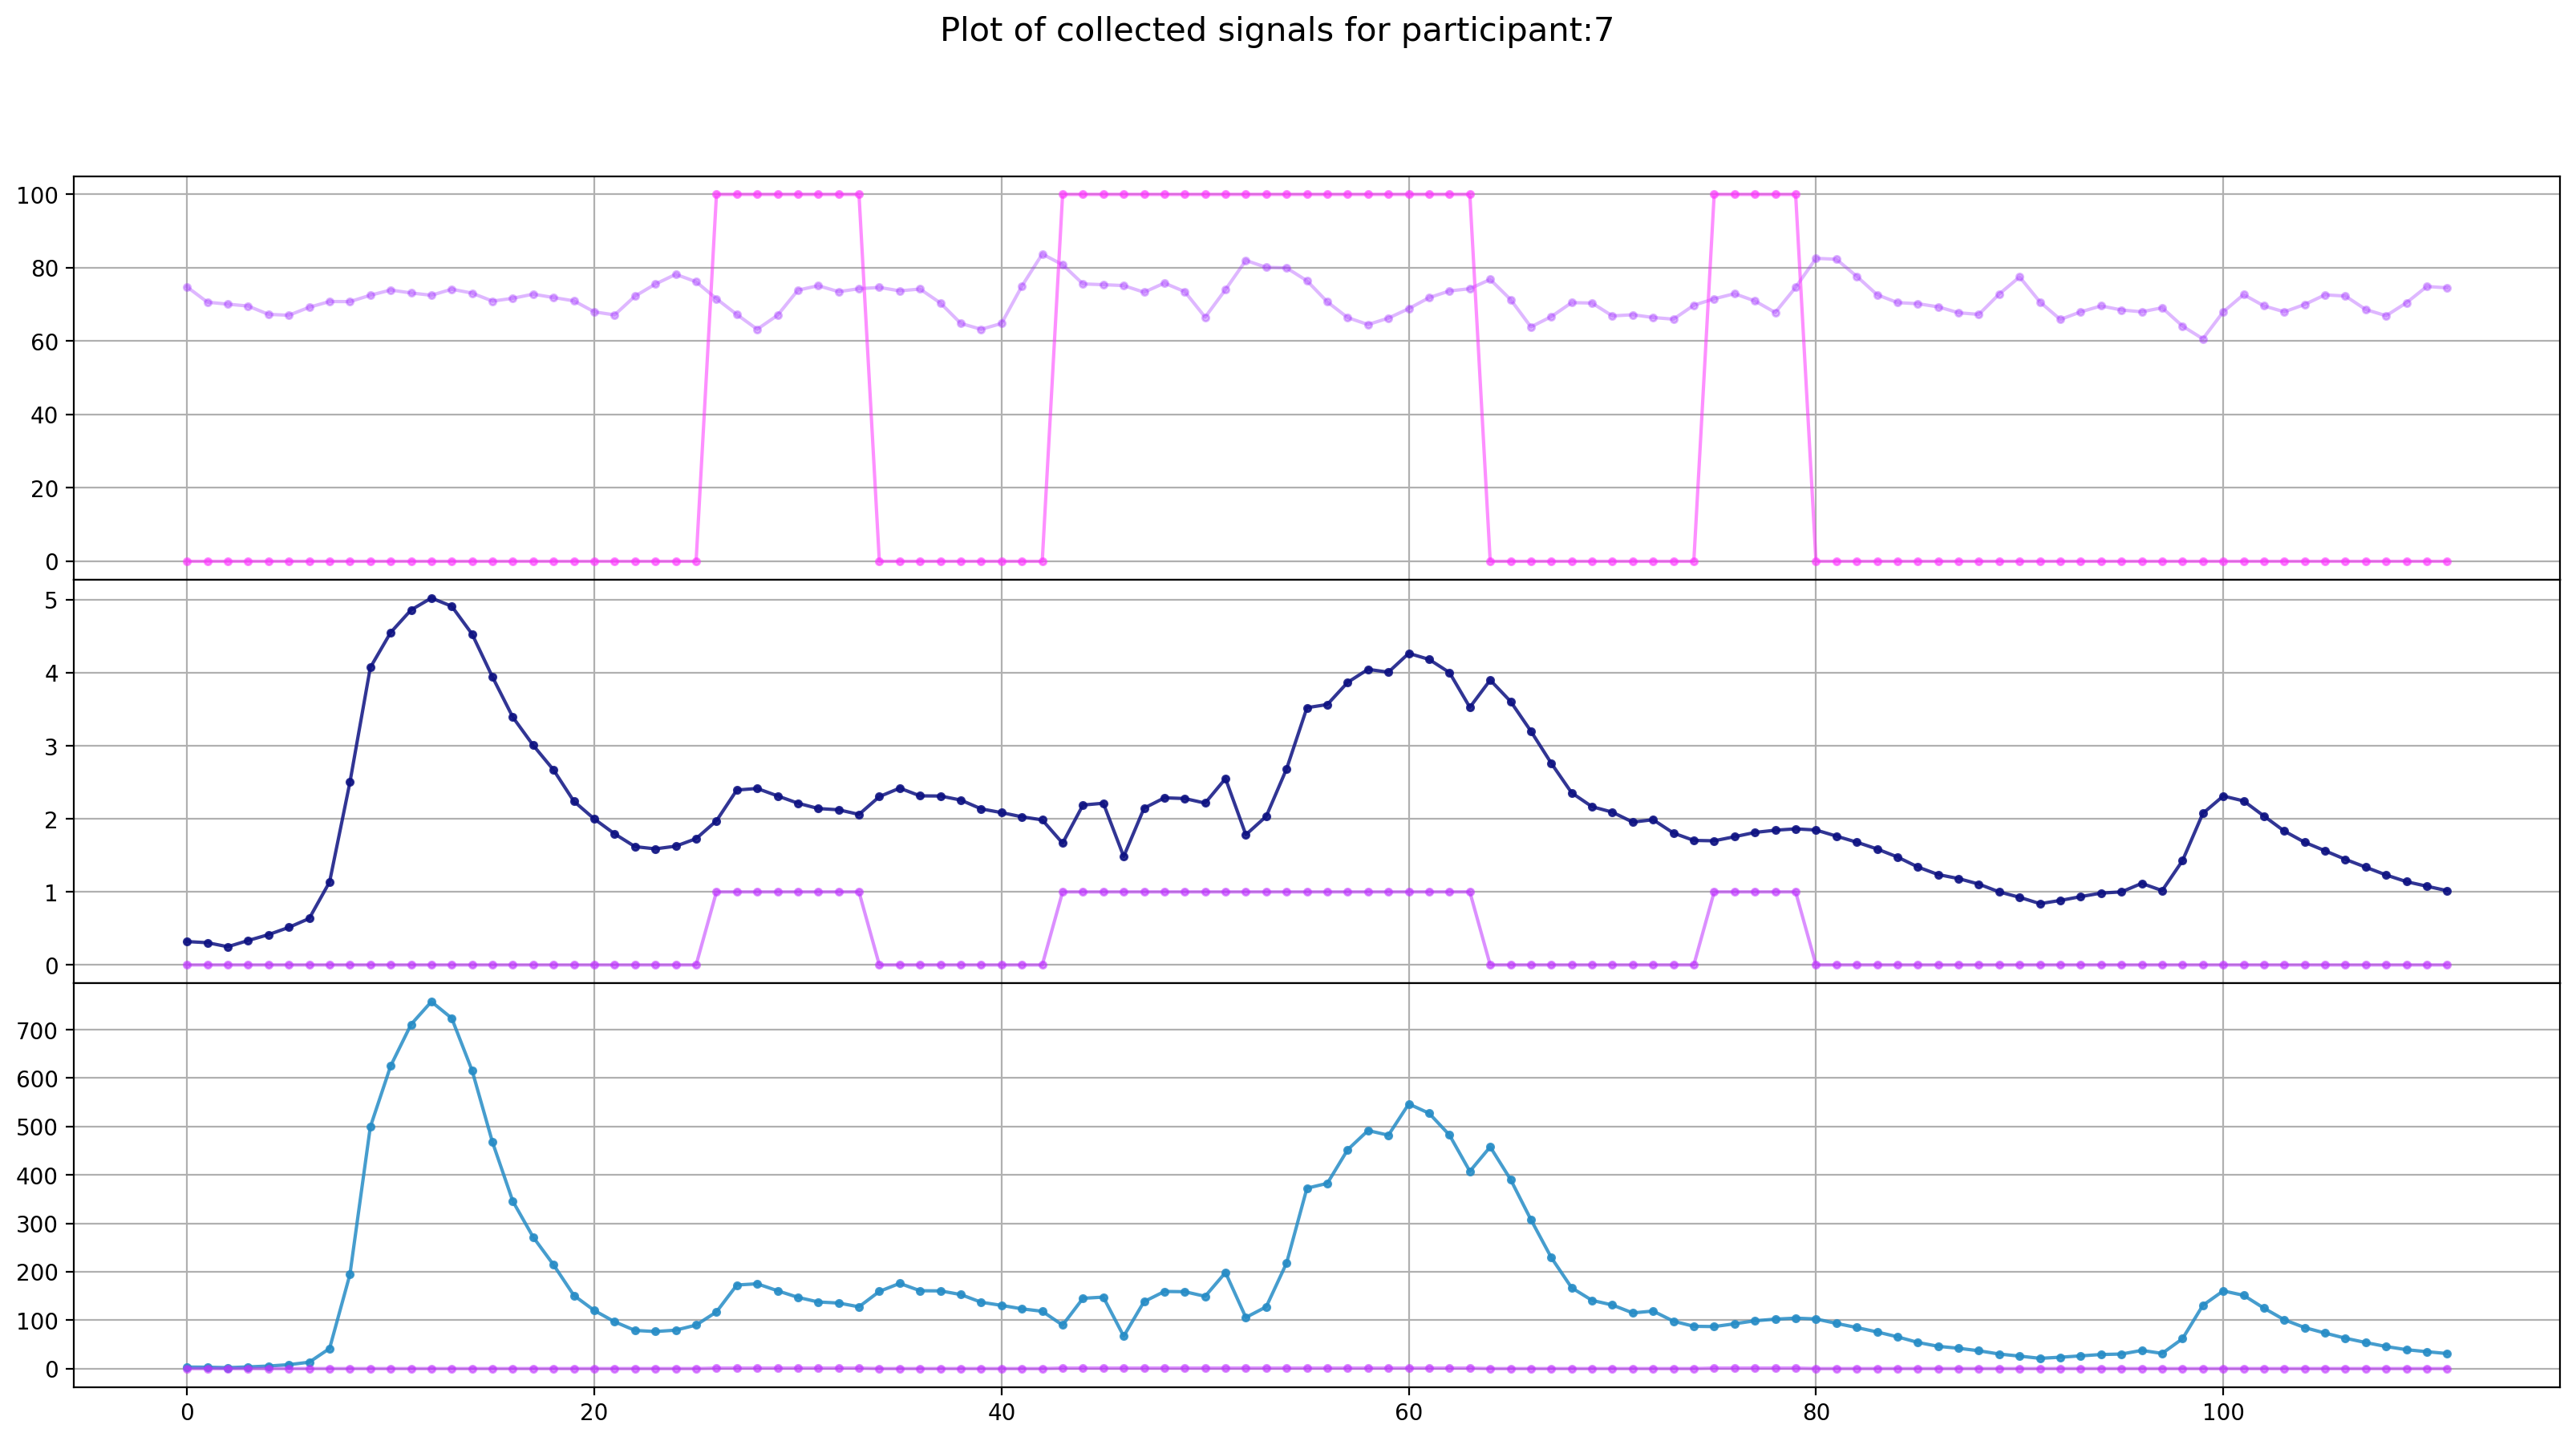

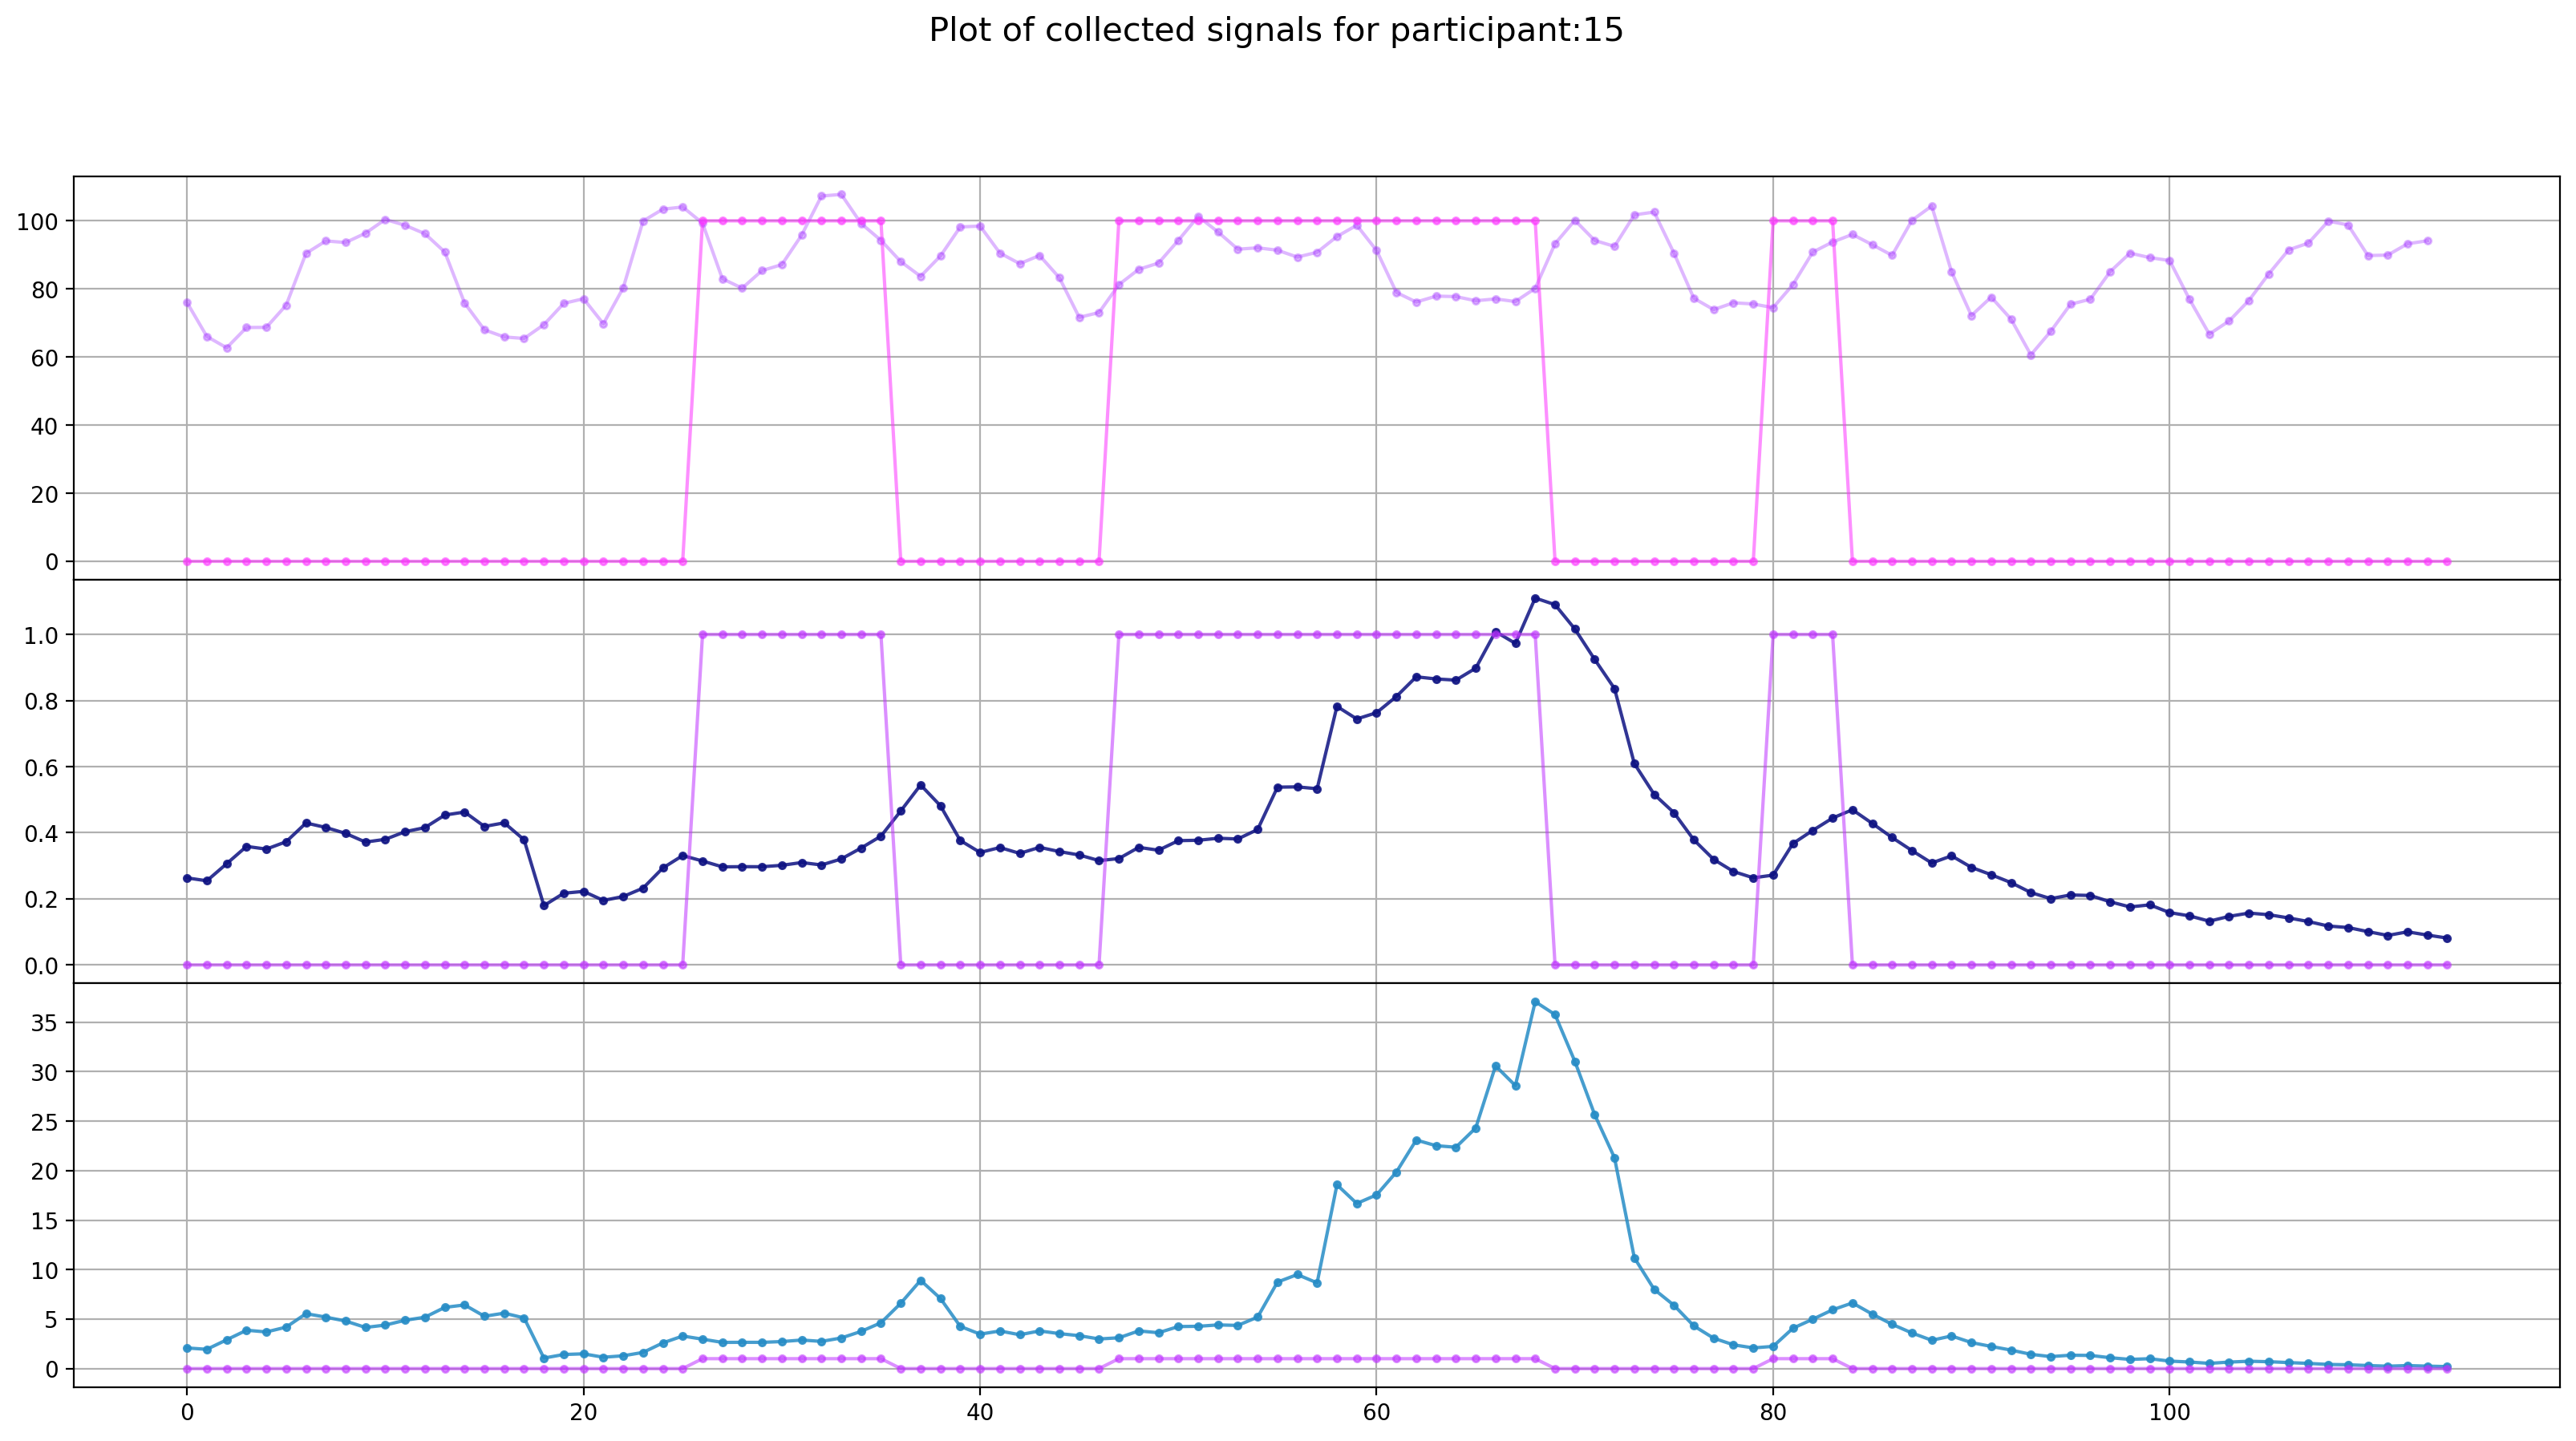

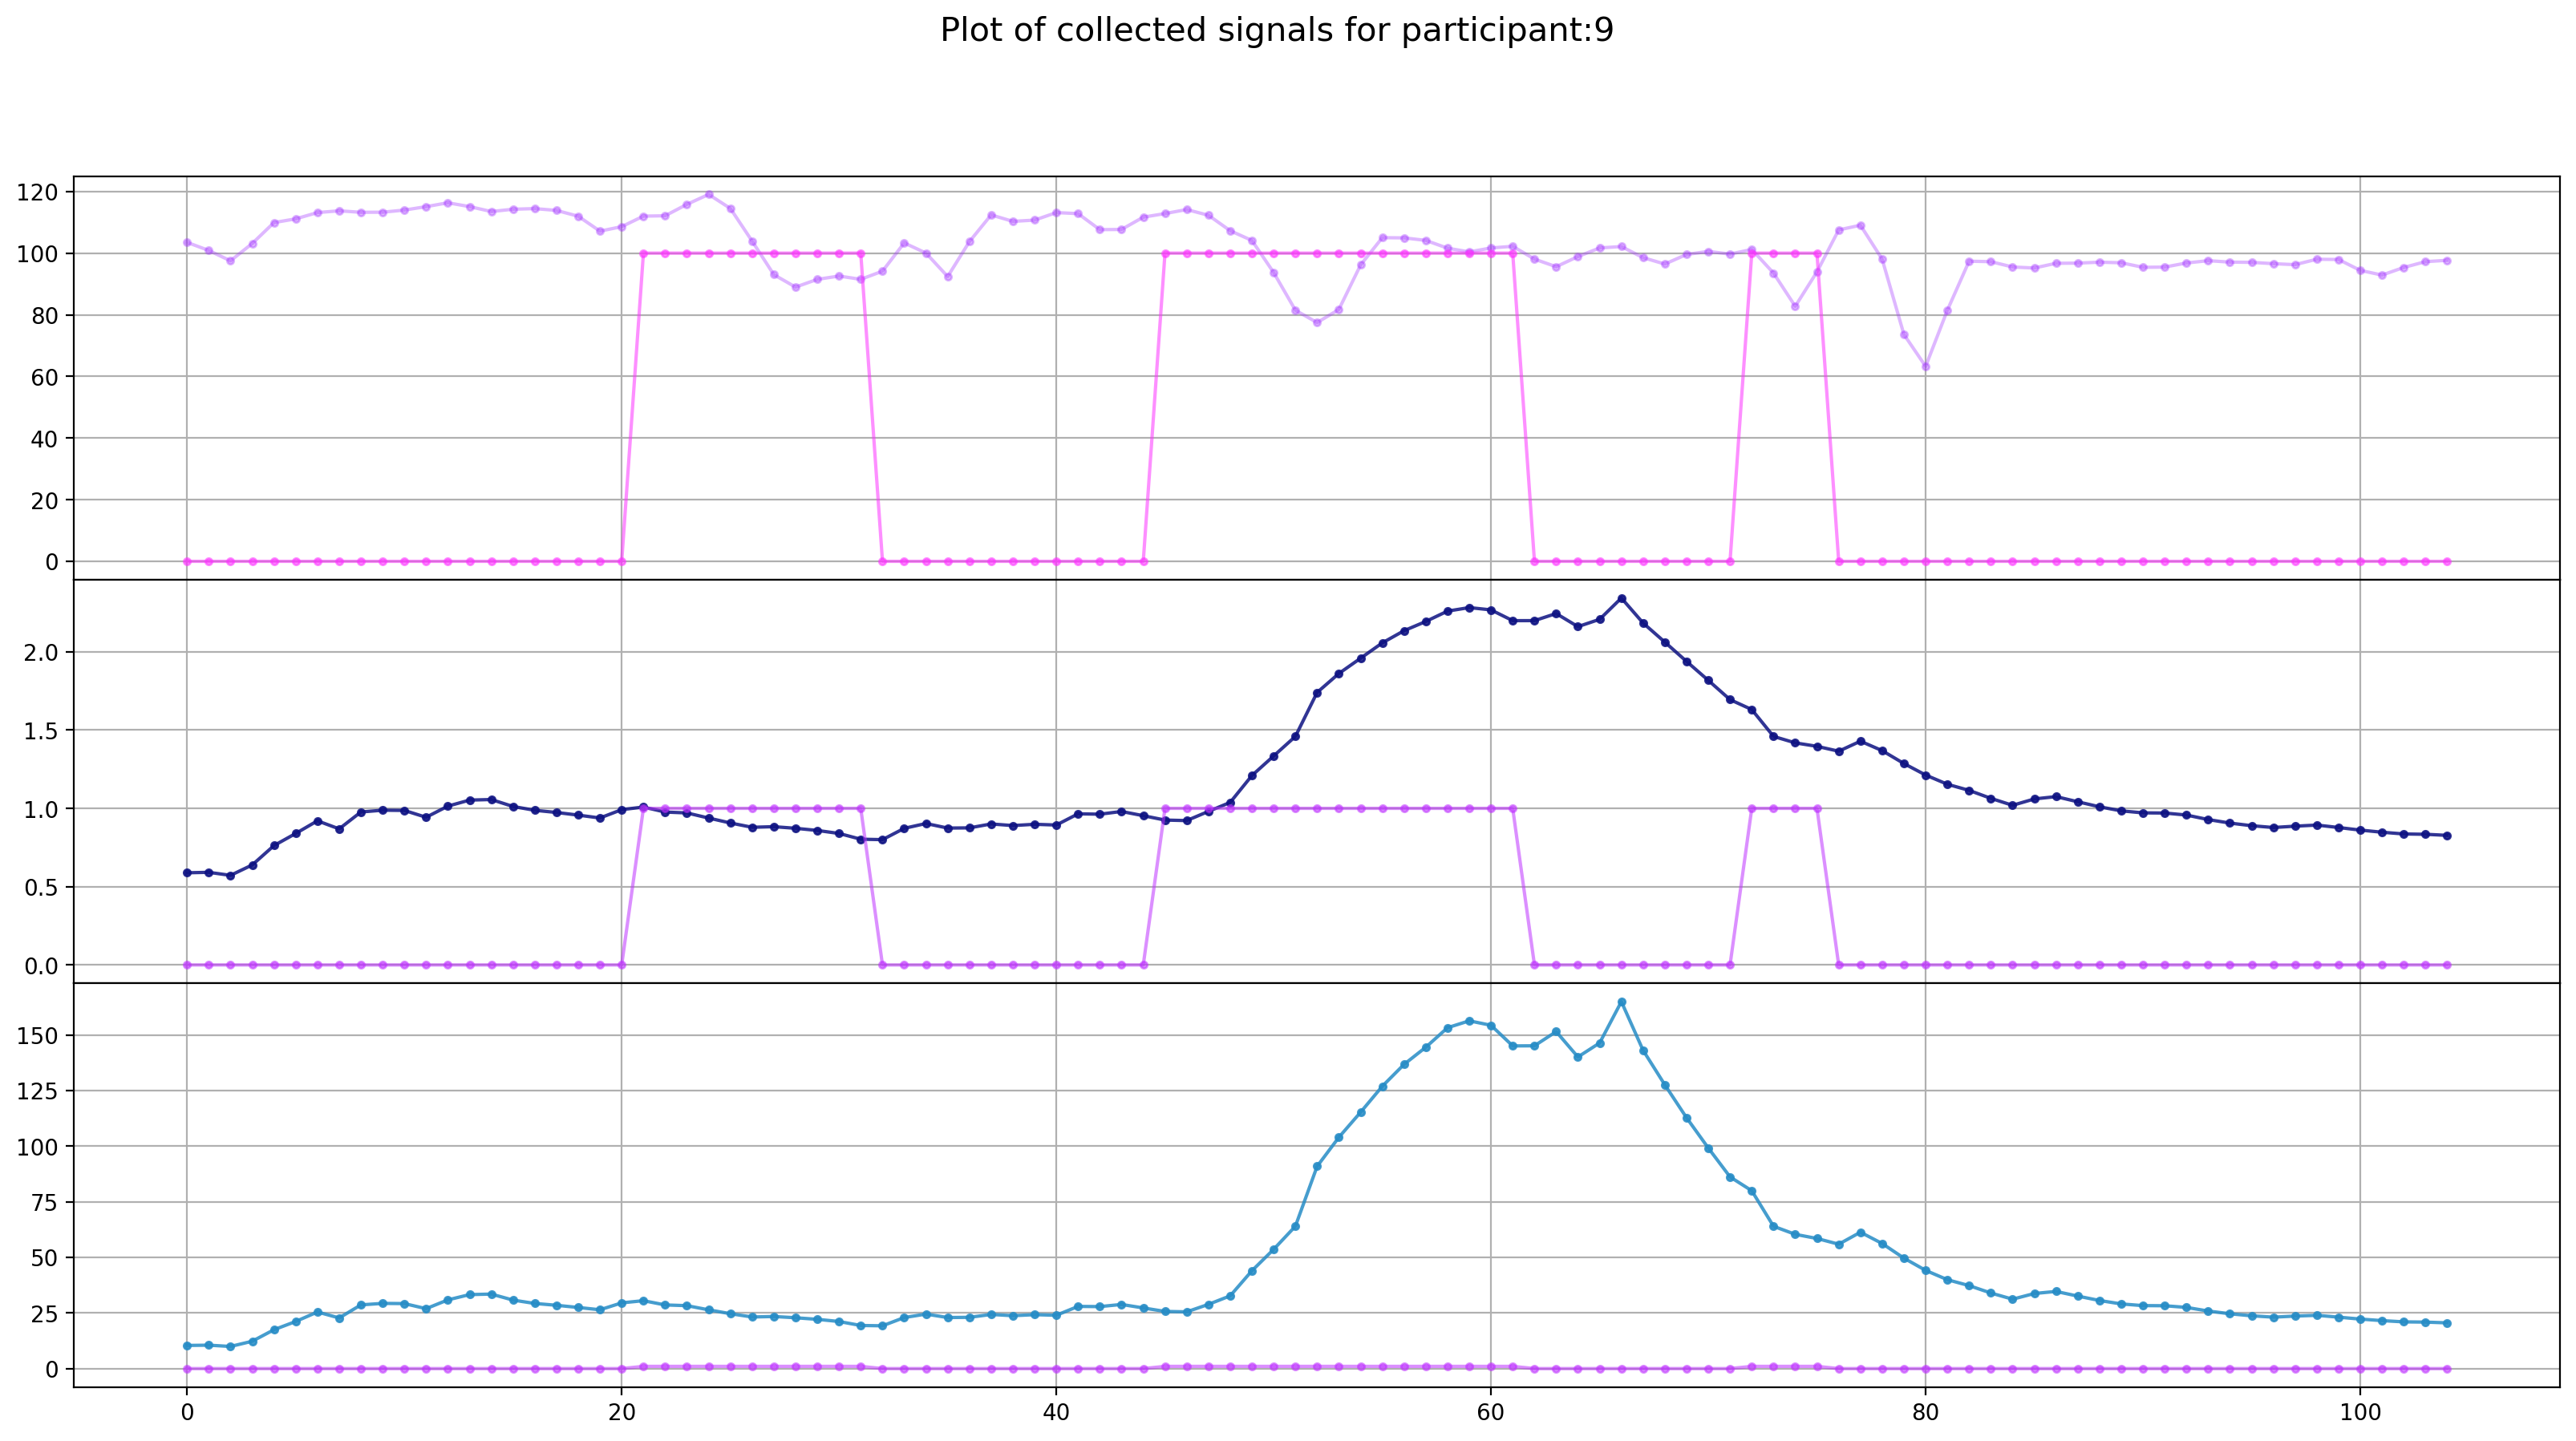

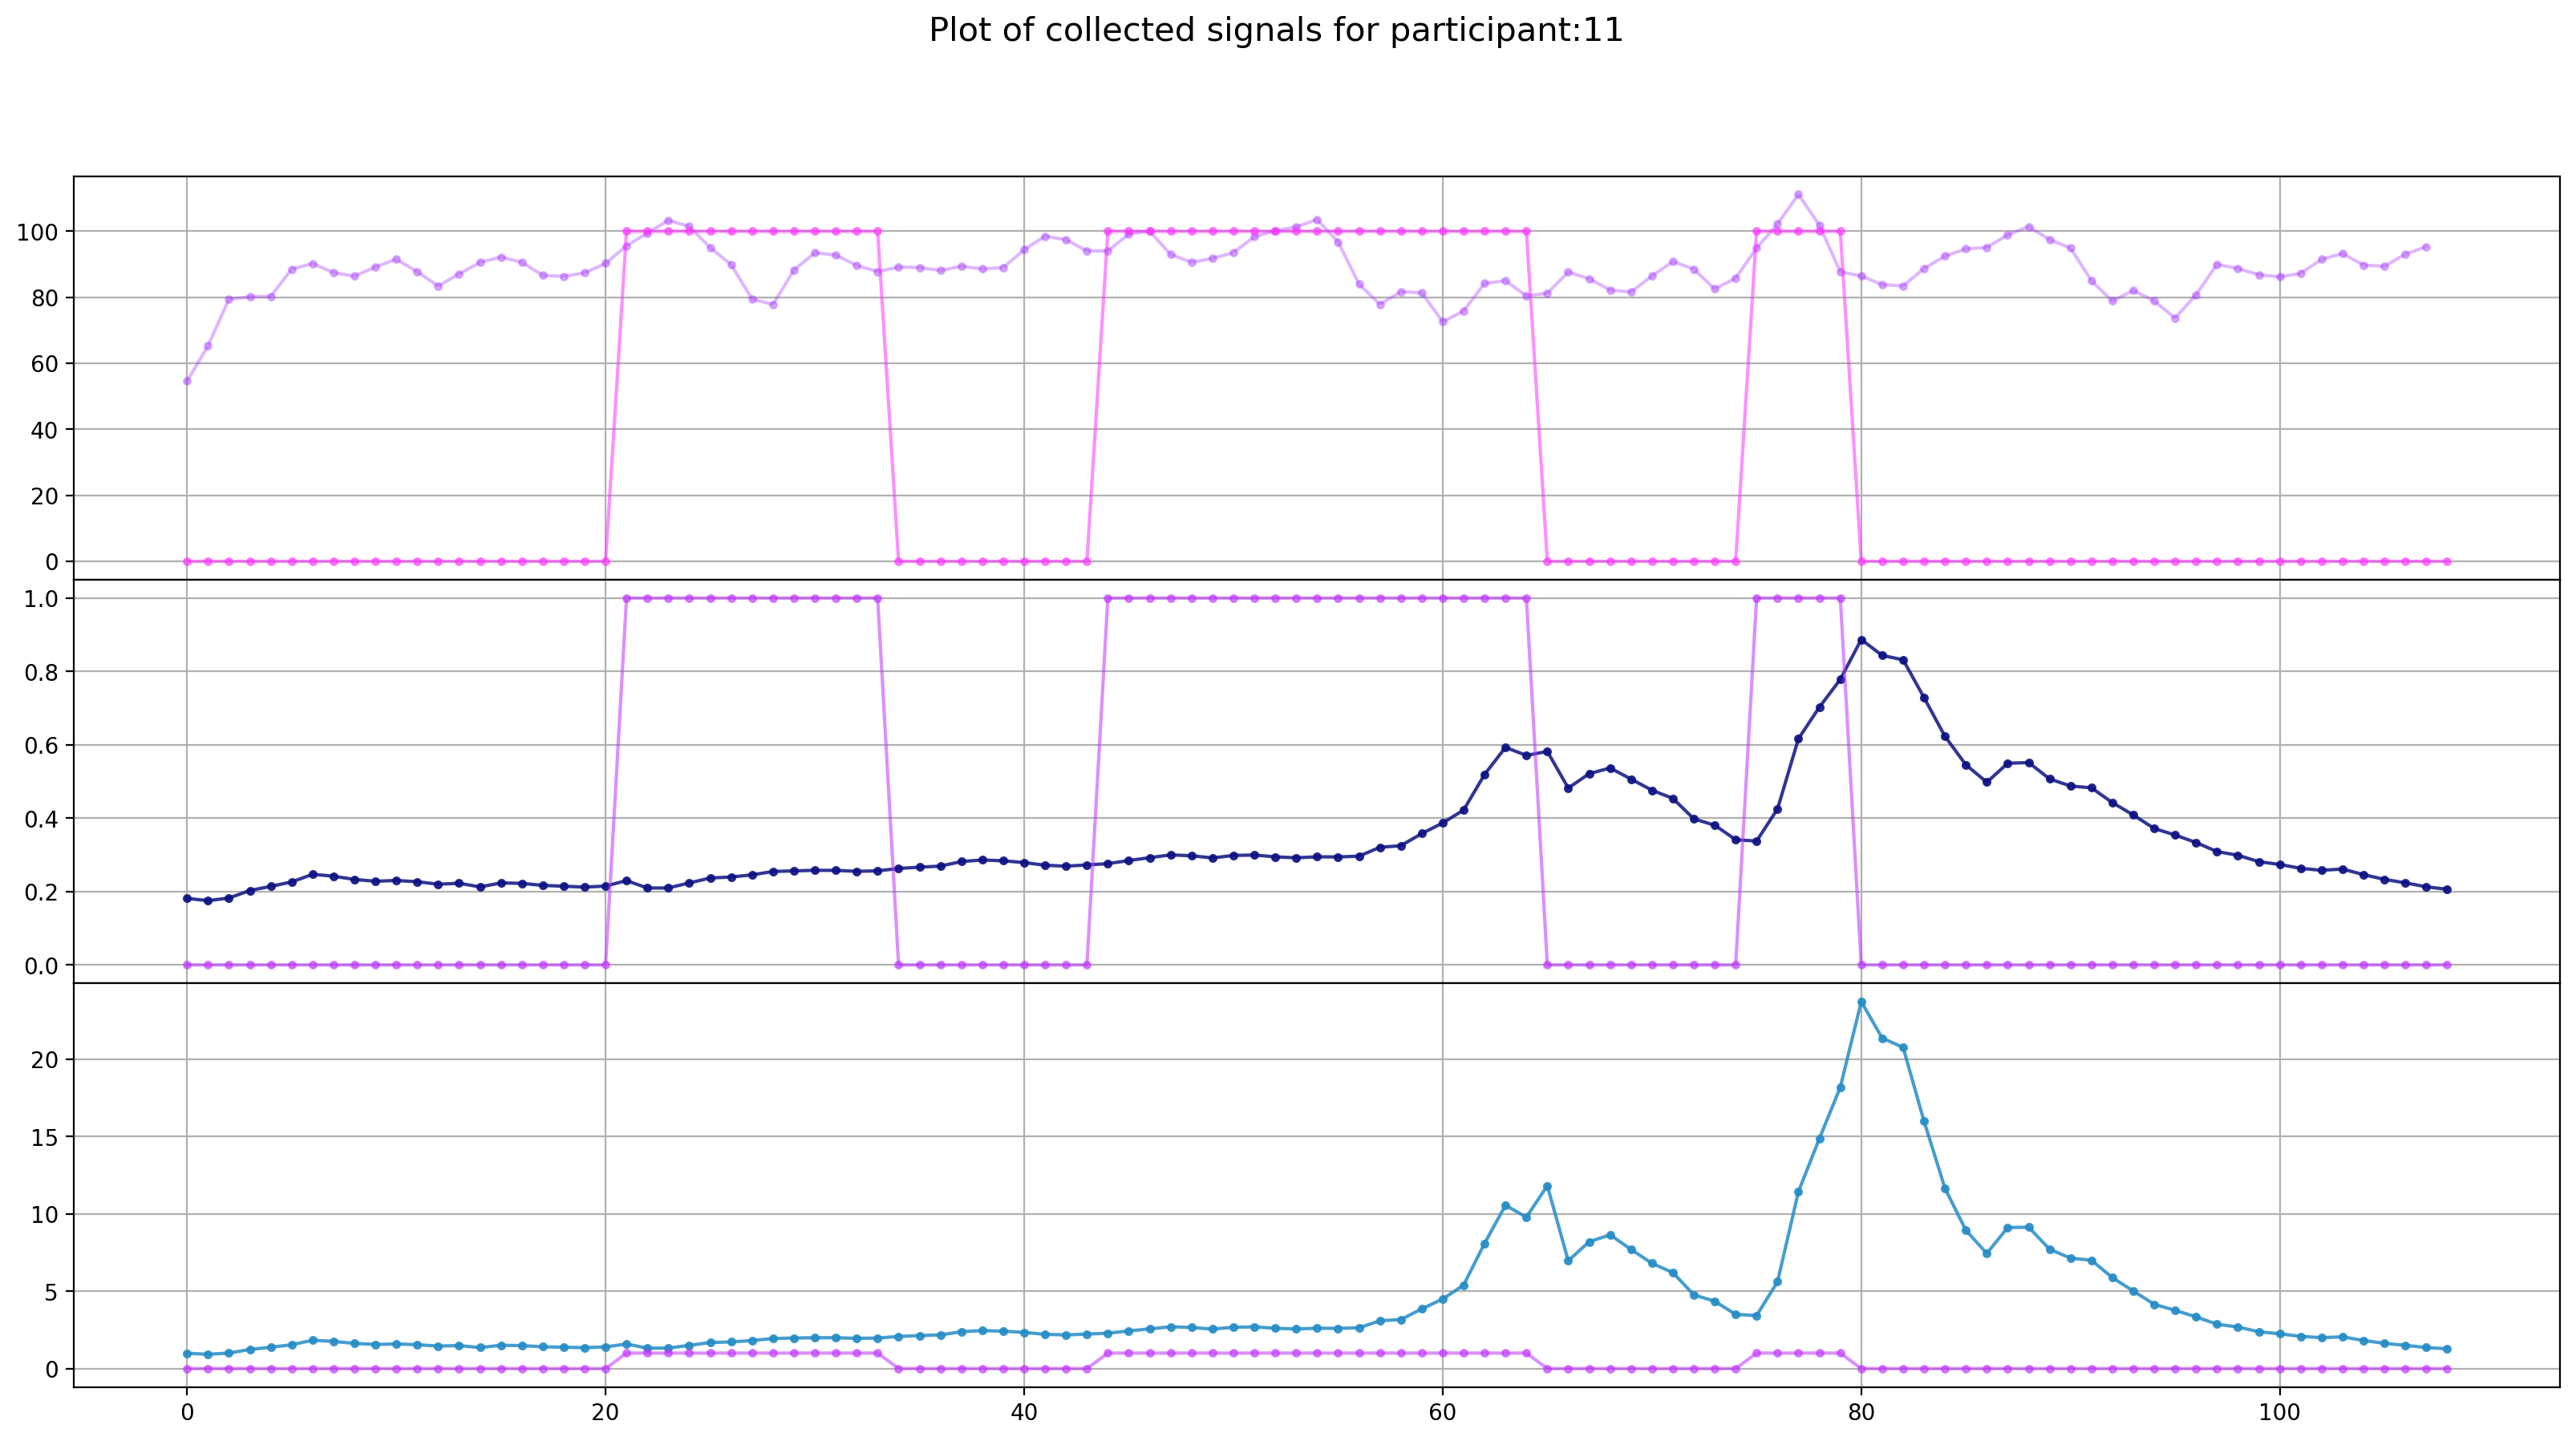

In [39]:
#Now, make some plots to appreciate if the noise reduction in EDA is enough
i = 0
while(i<=7):
    add=random.randrange(2, 35, 1)
    print('The value is',add)     
    
    y = merge30[merge30['Participant']==add]
    y.reset_index(inplace=True, drop=False)
    
    x=y.index
    t=x.to_numpy()
    var = y.values.T[2]# HR 
    var1= y.values.T[5]
    var2 = y.values.T[3]#EDA
    var3 = y.values.T[6]#energy
    
    fig = plt.figure(figsize=(20,10), dpi=200)
    gs = fig.add_gridspec(3, hspace=0)
    axs = gs.subplots(sharex=True)
    #fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle('Plot of collected signals for participant:'+str(add),fontsize = 15)
    
    #axs[0].title(str(add)+"Heart rate at 1Hz",fontsize=15)
    #axs[0].figure()
    axs[0].plot(t, var,'.-',color="#A233FF",alpha=0.35,label="HR")
    axs[0].plot(t, var1*100,'.-',color="#FD33FF",alpha=0.55,label="Label")
    axs[0].grid('True')
    
    axs[1].plot(t, var2,'.-',color="#0D1182",alpha=0.85,label="EDA")
    axs[1].plot(t, var1,'.-',color="#bF33FF",alpha=0.55,label="Label")
    axs[1].grid('True')
    
    axs[2].plot(t, var3,'.-',color="#268CC6",alpha=0.85,label="EDA_energy")
    axs[2].plot(t, var1,'.-',color="#bF33FF",alpha=0.55,label="Label")
    axs[2].grid('True')
    i = i +1

In [42]:
#Here we export dataFrane as excel file, in this point we keep label as it is by default.
merge30.to_excel('merge30seg.xlsx')

In [ ]:
#However, from the plots we appreciate two things:
#1. Label is set just according time tags! According the paper not everybody was stresed under some conditions, BUT we do
#not have which ones were stress or not, we have just LABEL to work.
#2 As label are set 0 or 1 according time tags that output it not a realiable OUTPUT, therefore what we will do to 
#move forward is RElabel LABEL.
#According to the paper description we have different stress events for each time segment. So makes sense to change those
#label to 0,1,2 where 0 is resting, 1 is the first stress experiment, 2 is the second stress event, and 3 the final event ('Hiperventilation')

In [43]:
#changing Label
merge_lb =  pd.DataFrame(columns=['Participant', 'HR','EDA','Temp','Label_d','EDA_ene'])

for add in range(2,36):
    x = pd.DataFrame()
    x = merge30[merge30['Participant']==add]
    x.reset_index(inplace=True, drop=False)
    len(x)
    hr = 0
    EDA =0
    eda_ene = 0
    t = 0
    label = 0
    i = 0
    for y in range(1,len(x)):
        if x['Label'][y-1]+x['Label'][y]>0 and y<38:
            label= 1
        elif ((x['Label'][y-1])+(x['Label'][y])>0 and y>38 and y<68):
            label= 2
        else:
                if ((x['Label'][y-1]) + (x['Label'][y])>0 and y>68):
                    label= 3
                else:
                    label = 0 #stress0  
        merge_lb = merge_lb.append({'Participant':add,'HR':x['HR'][y],'EDA':x['EDA'][y], 'Temp': x['Temp'][y],'Label_d':label, 'EDA_ene':x['EDA_ene'][y]}, ignore_index=True)

The value is 18


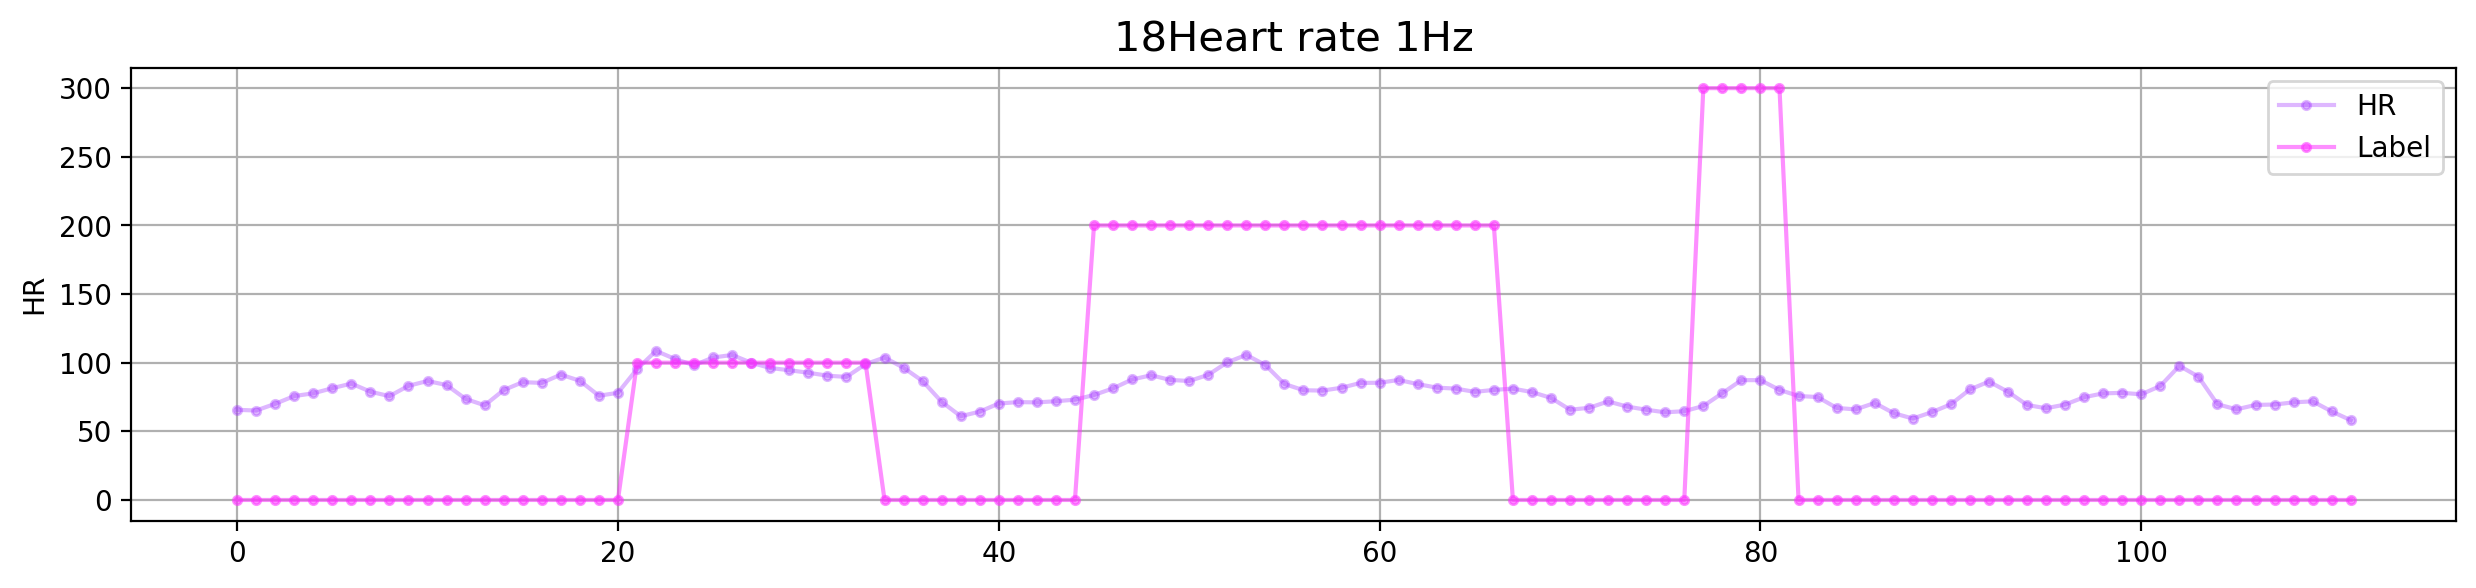

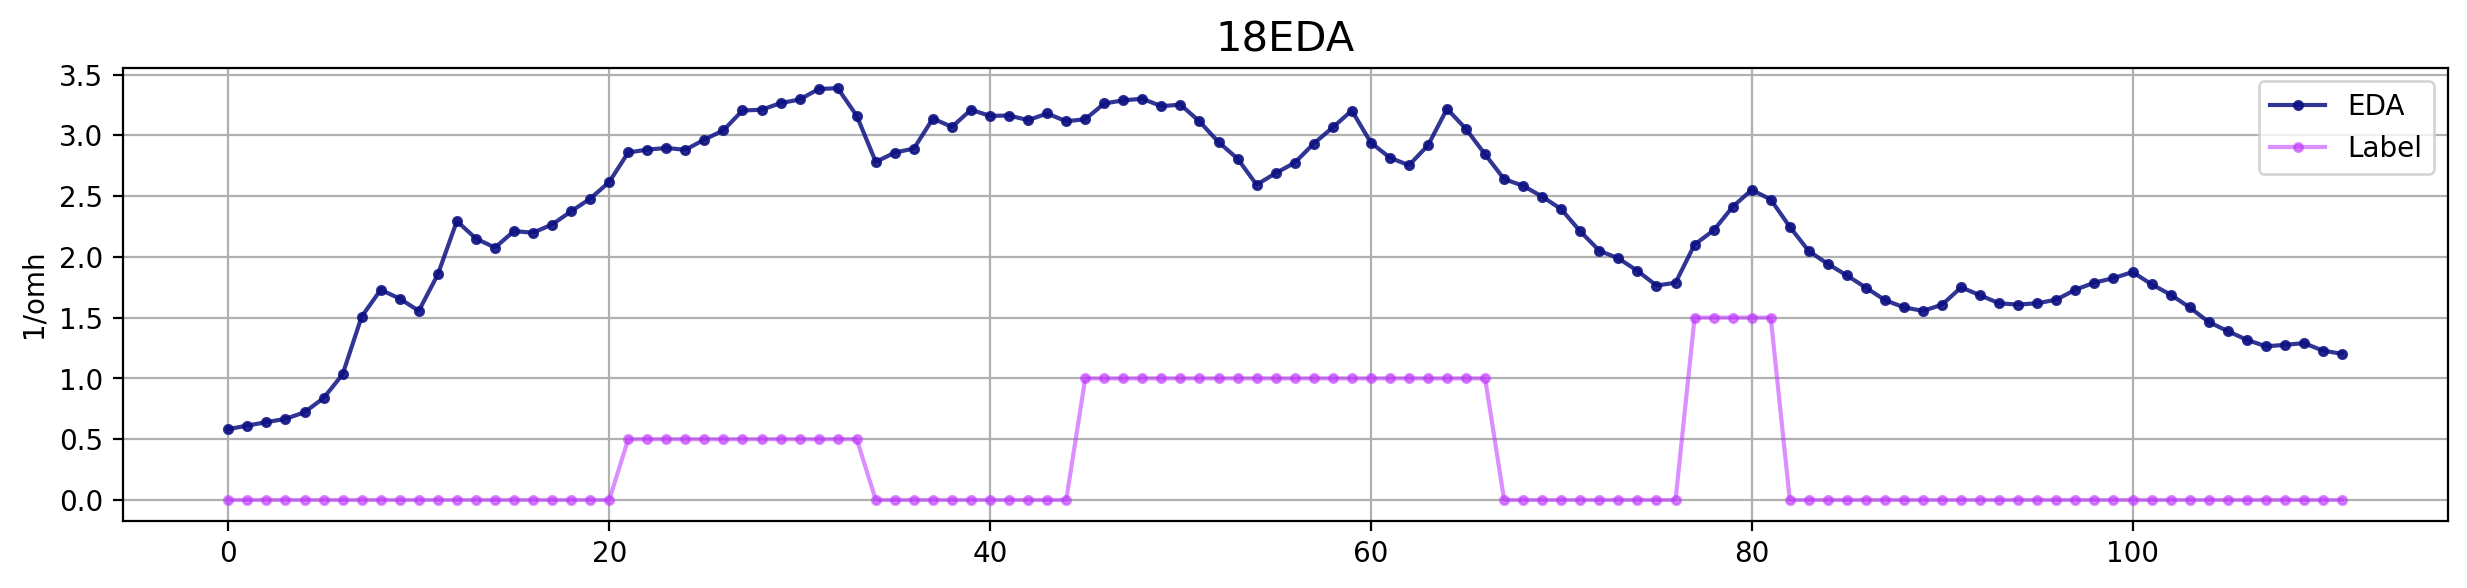

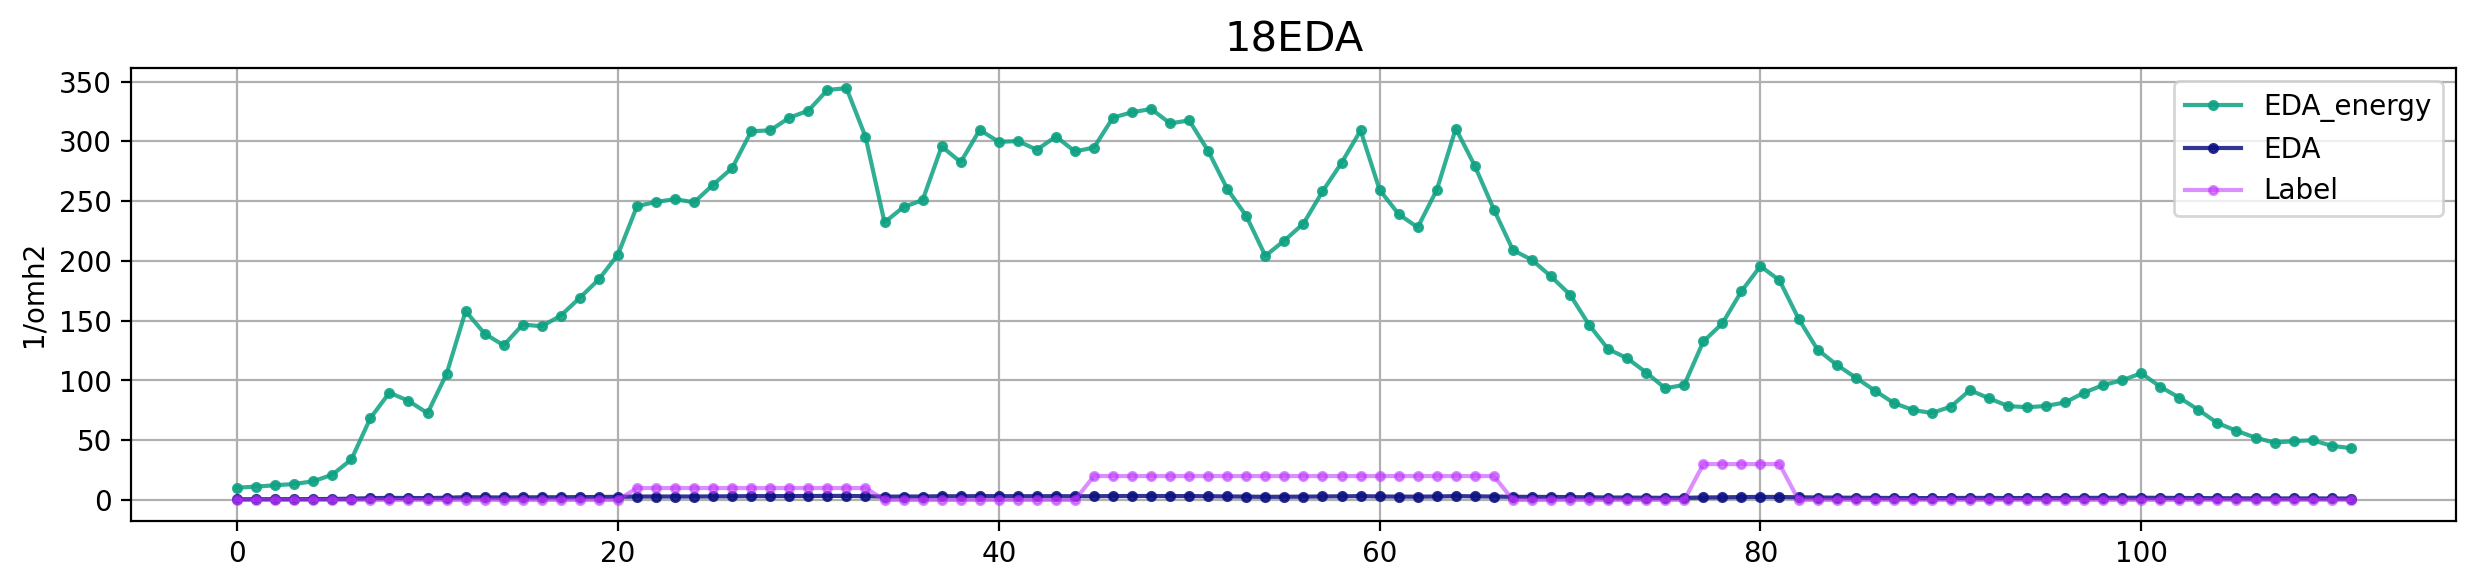

The value is 6


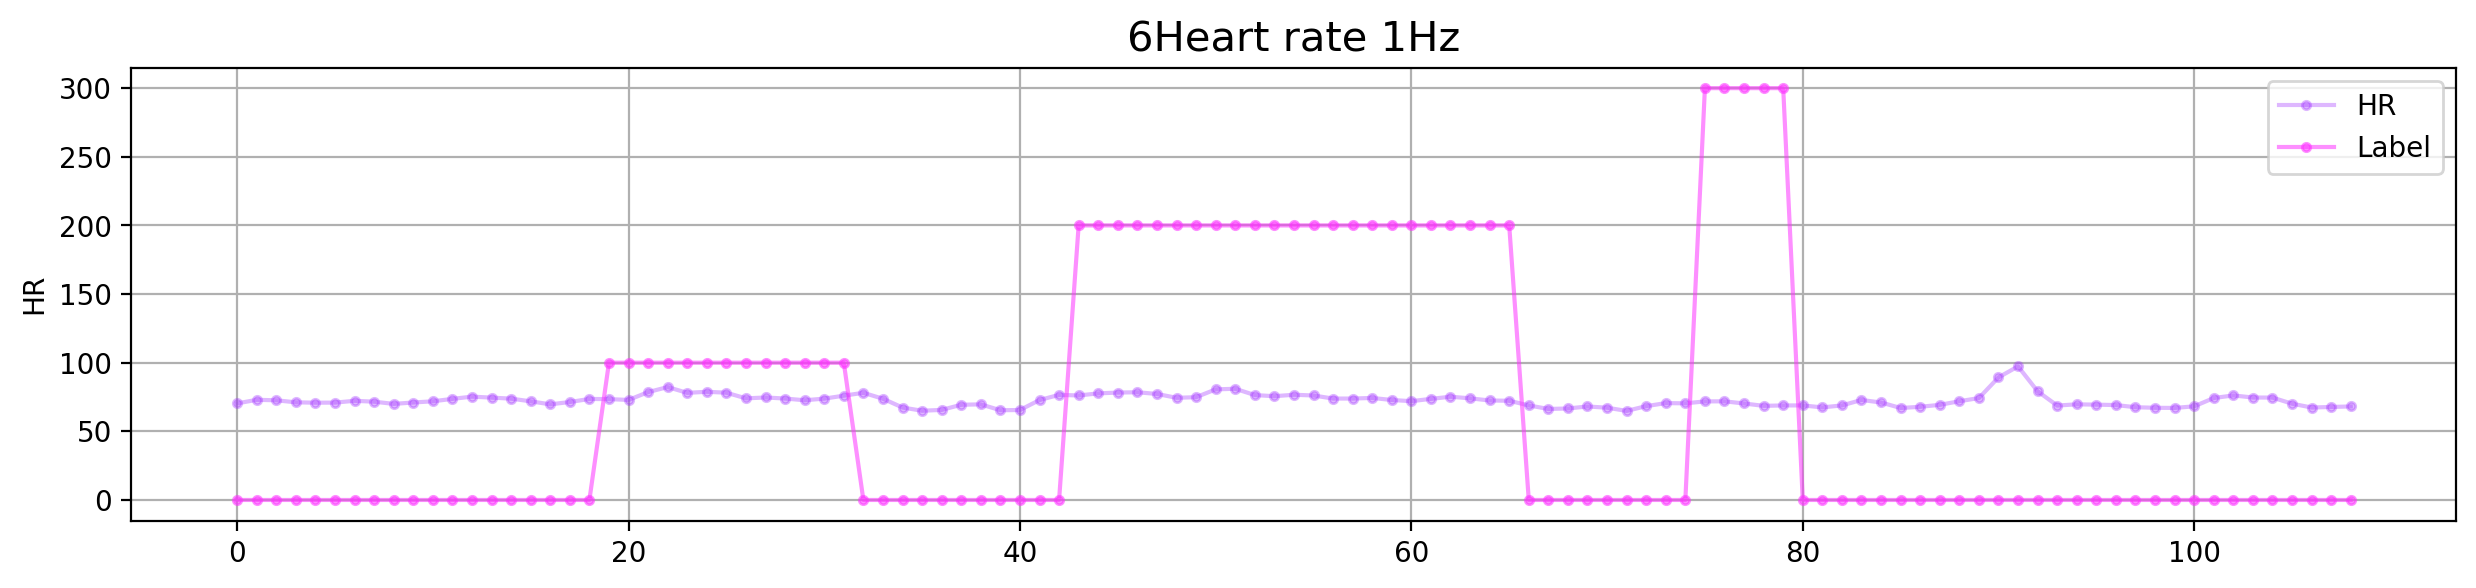

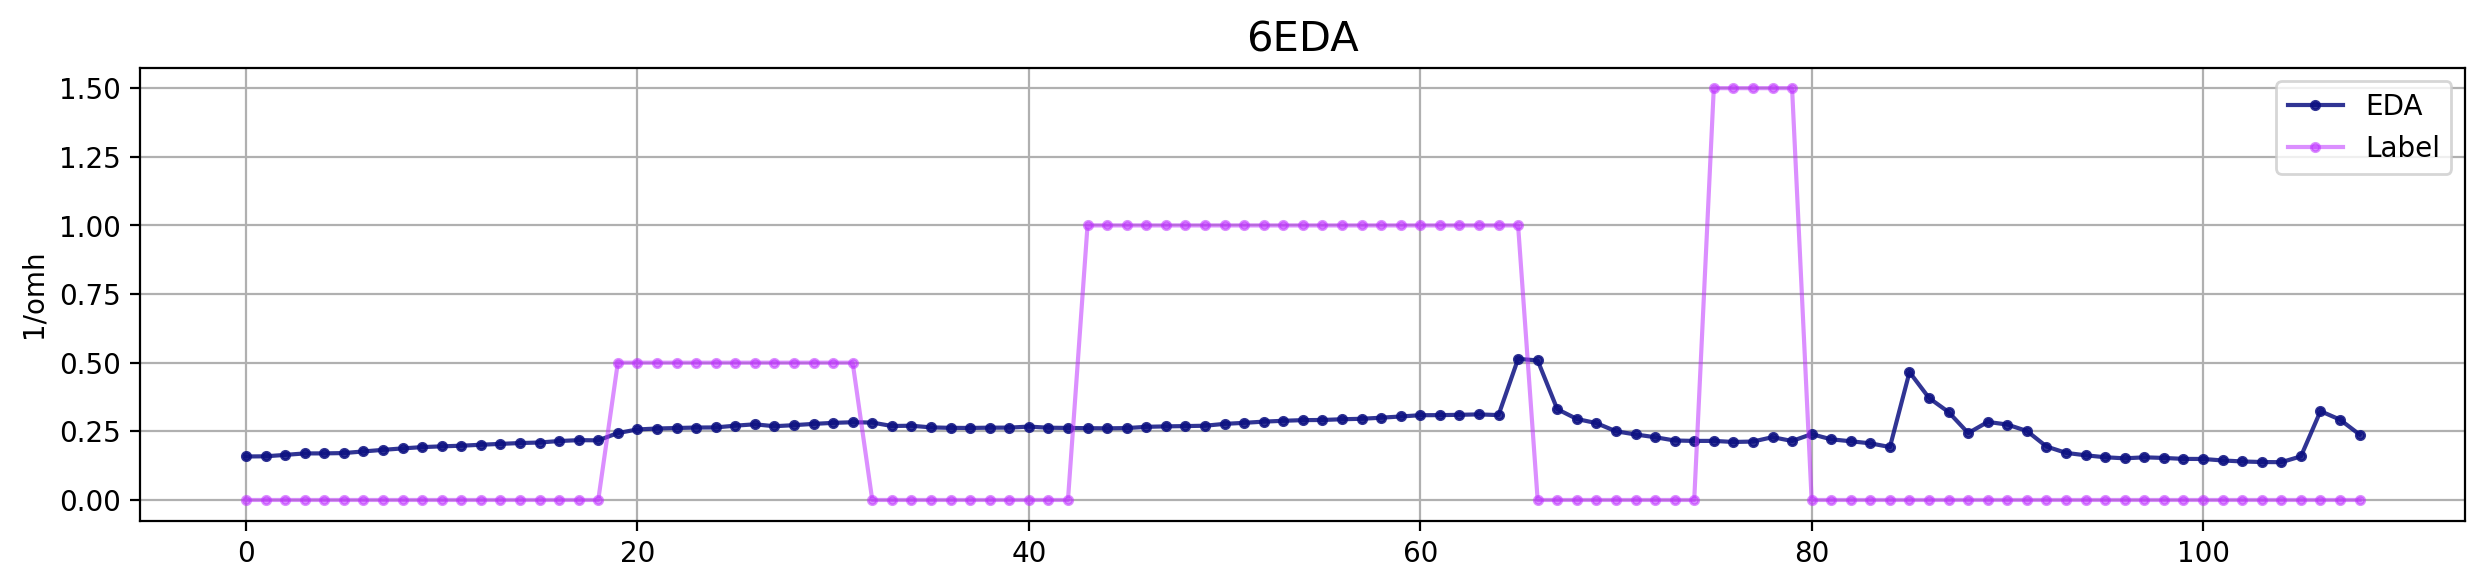

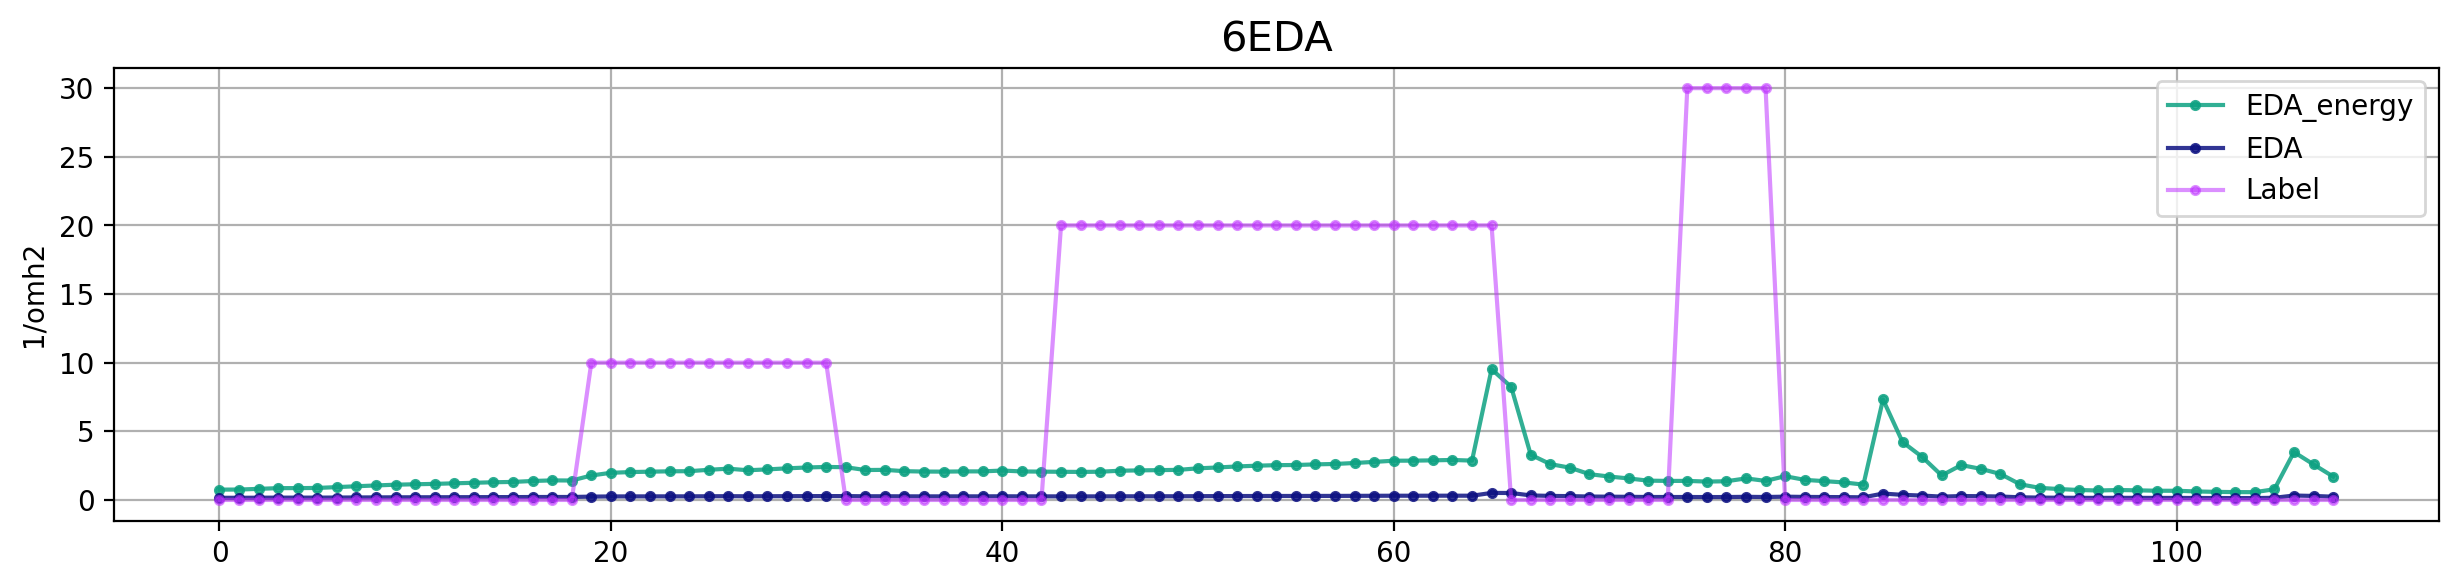

The value is 30


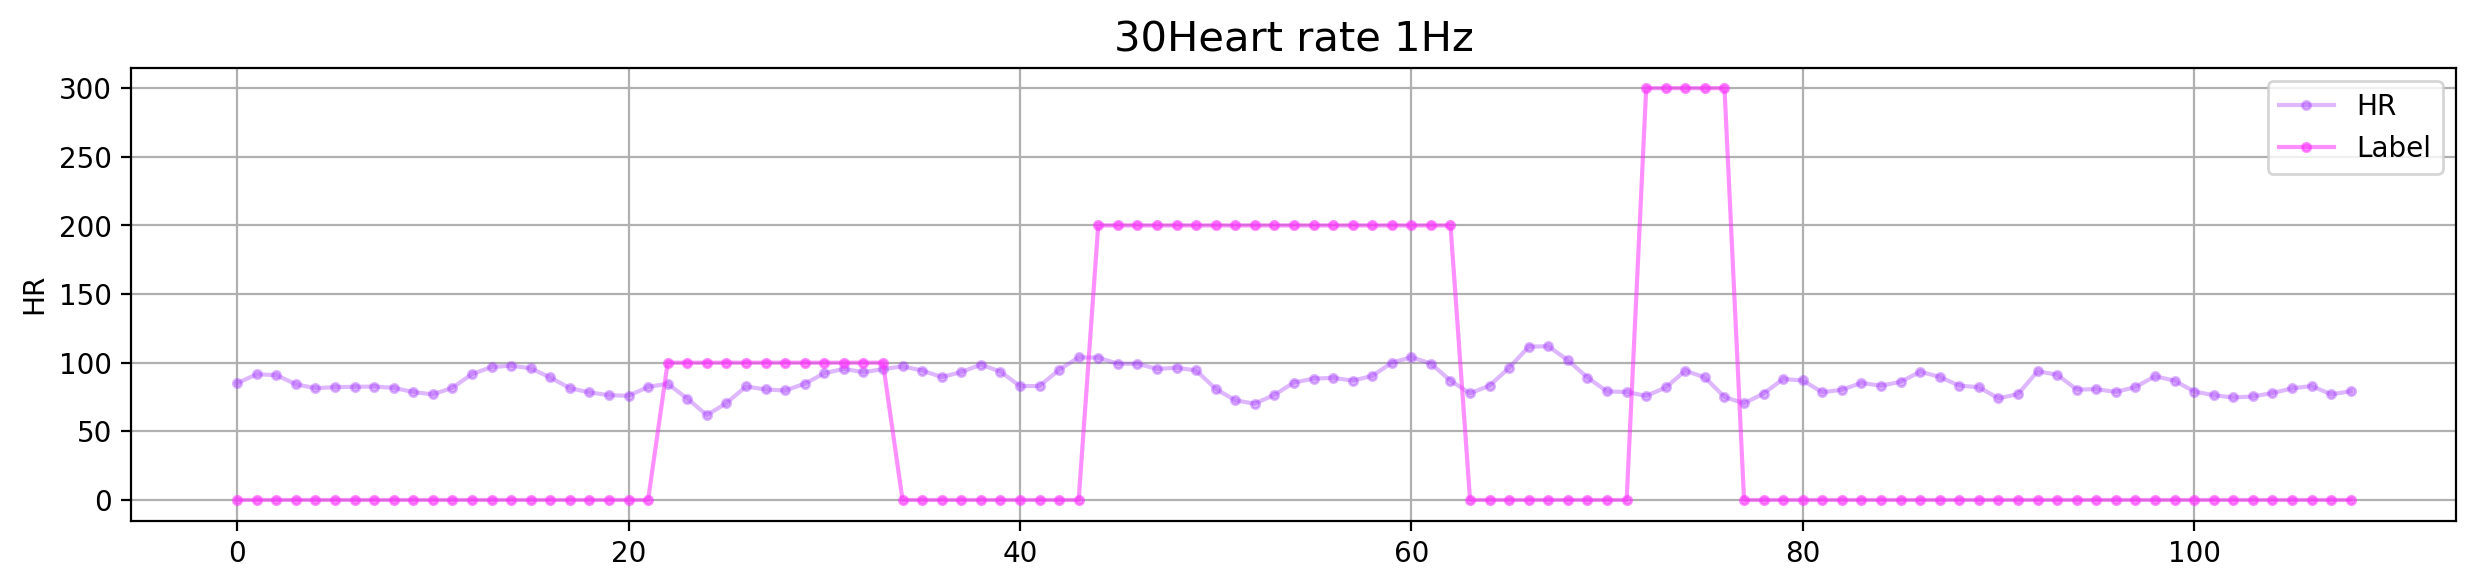

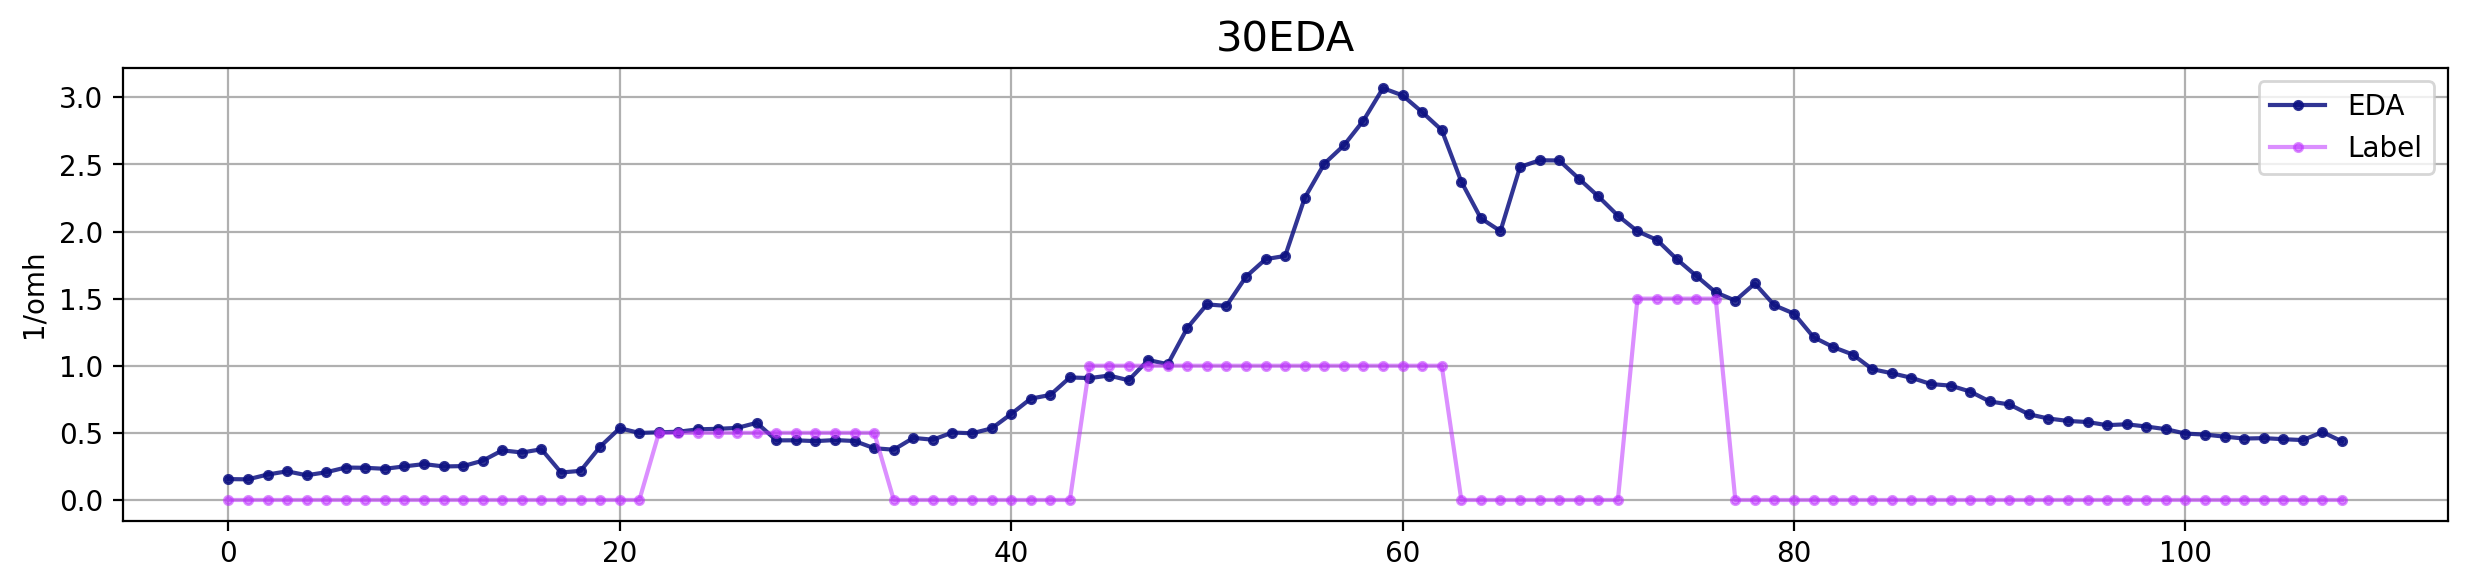

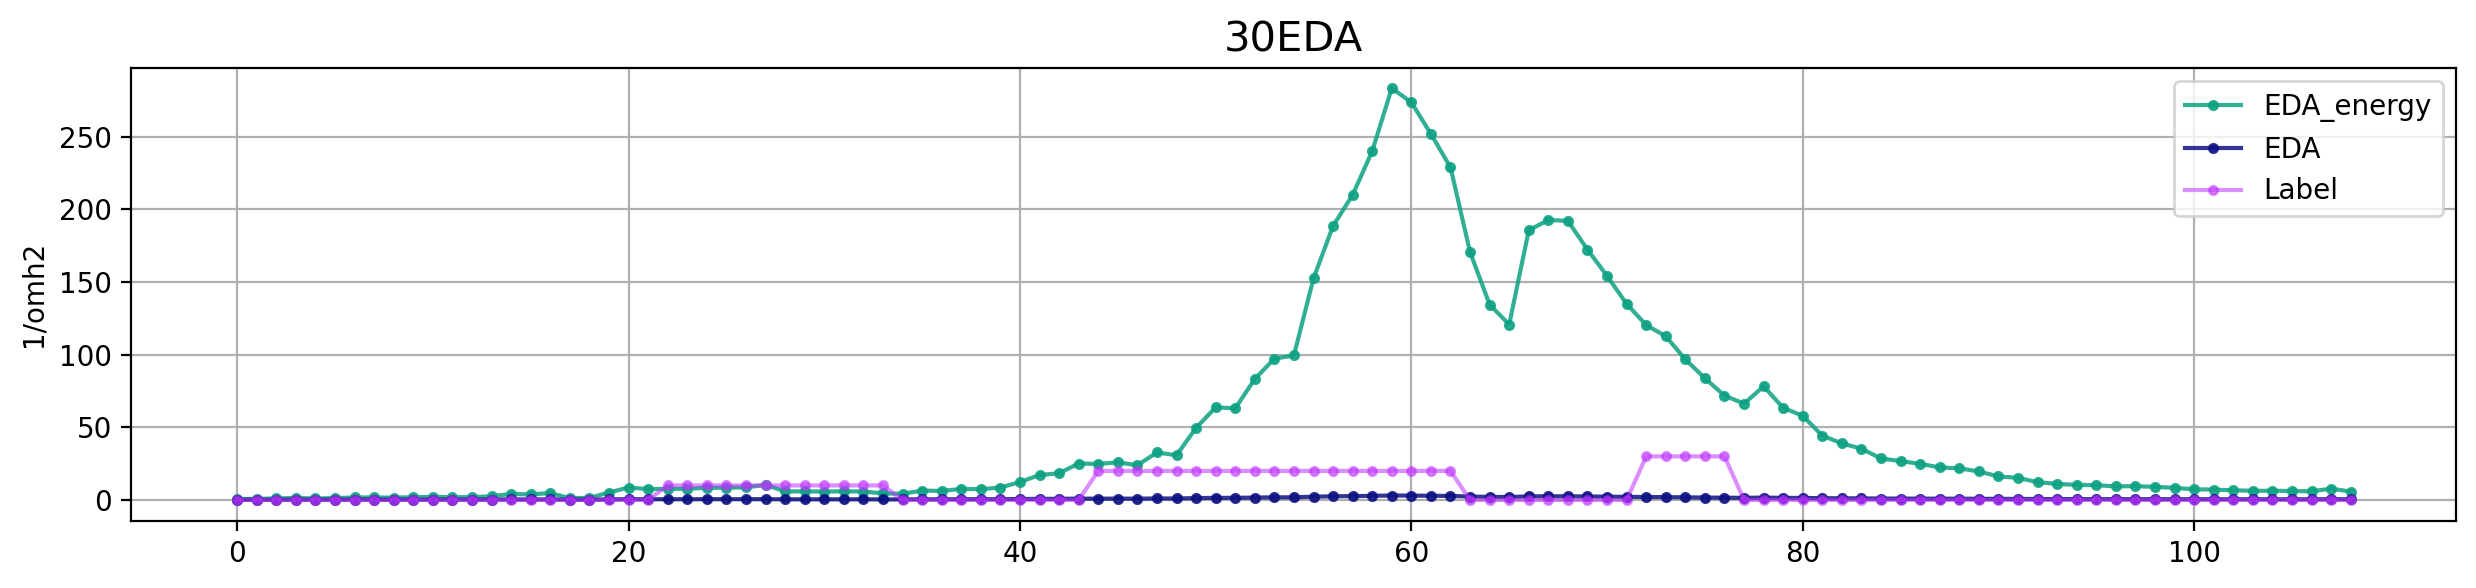

The value is 28


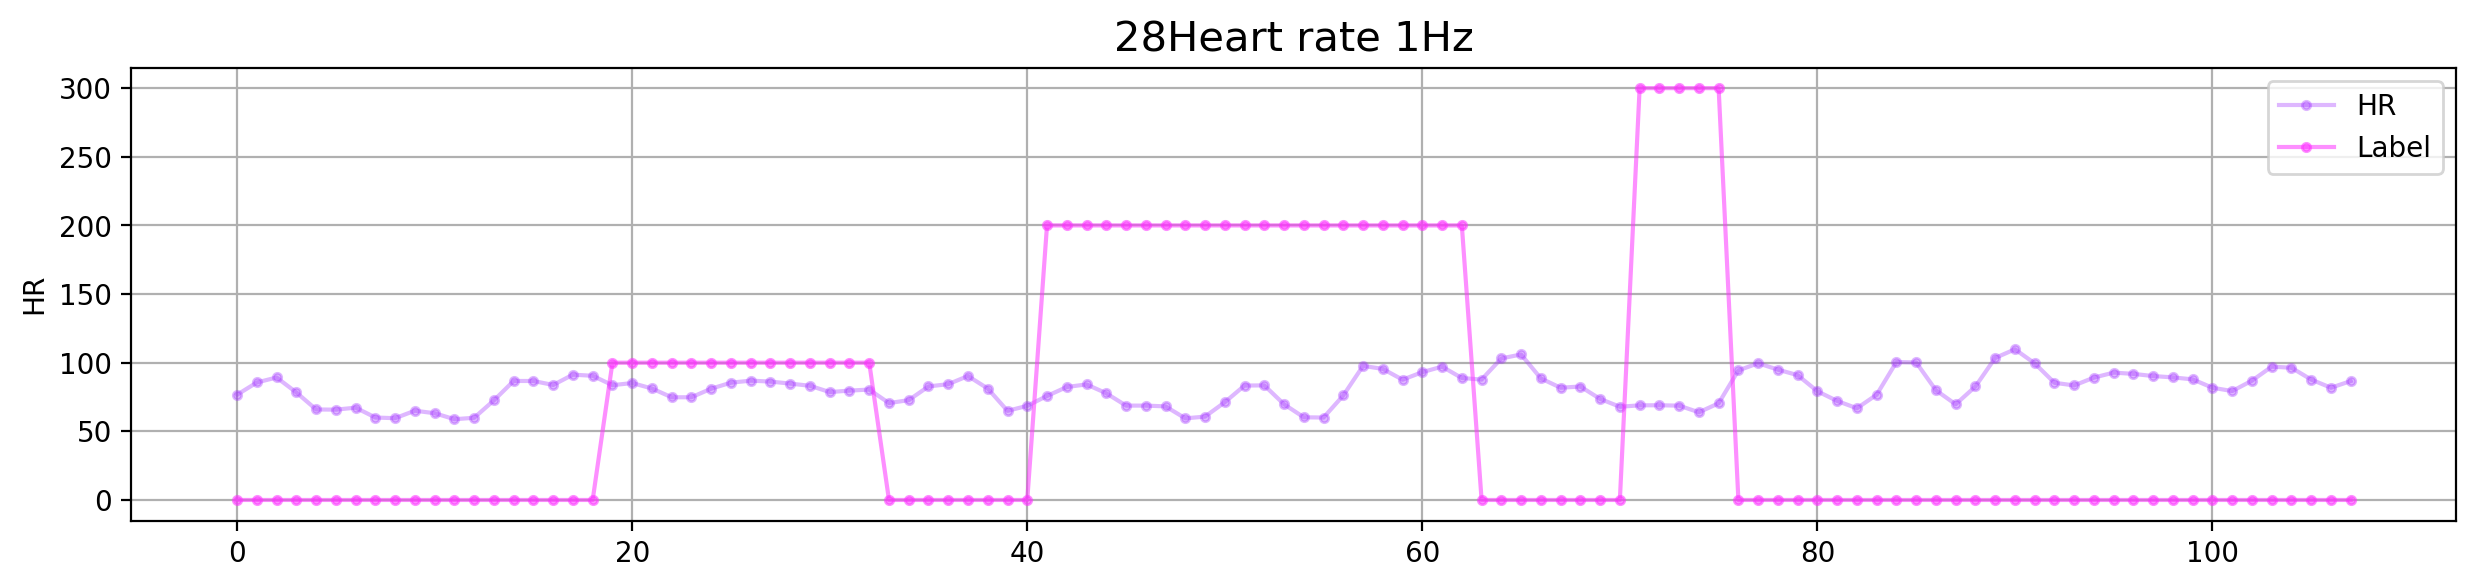

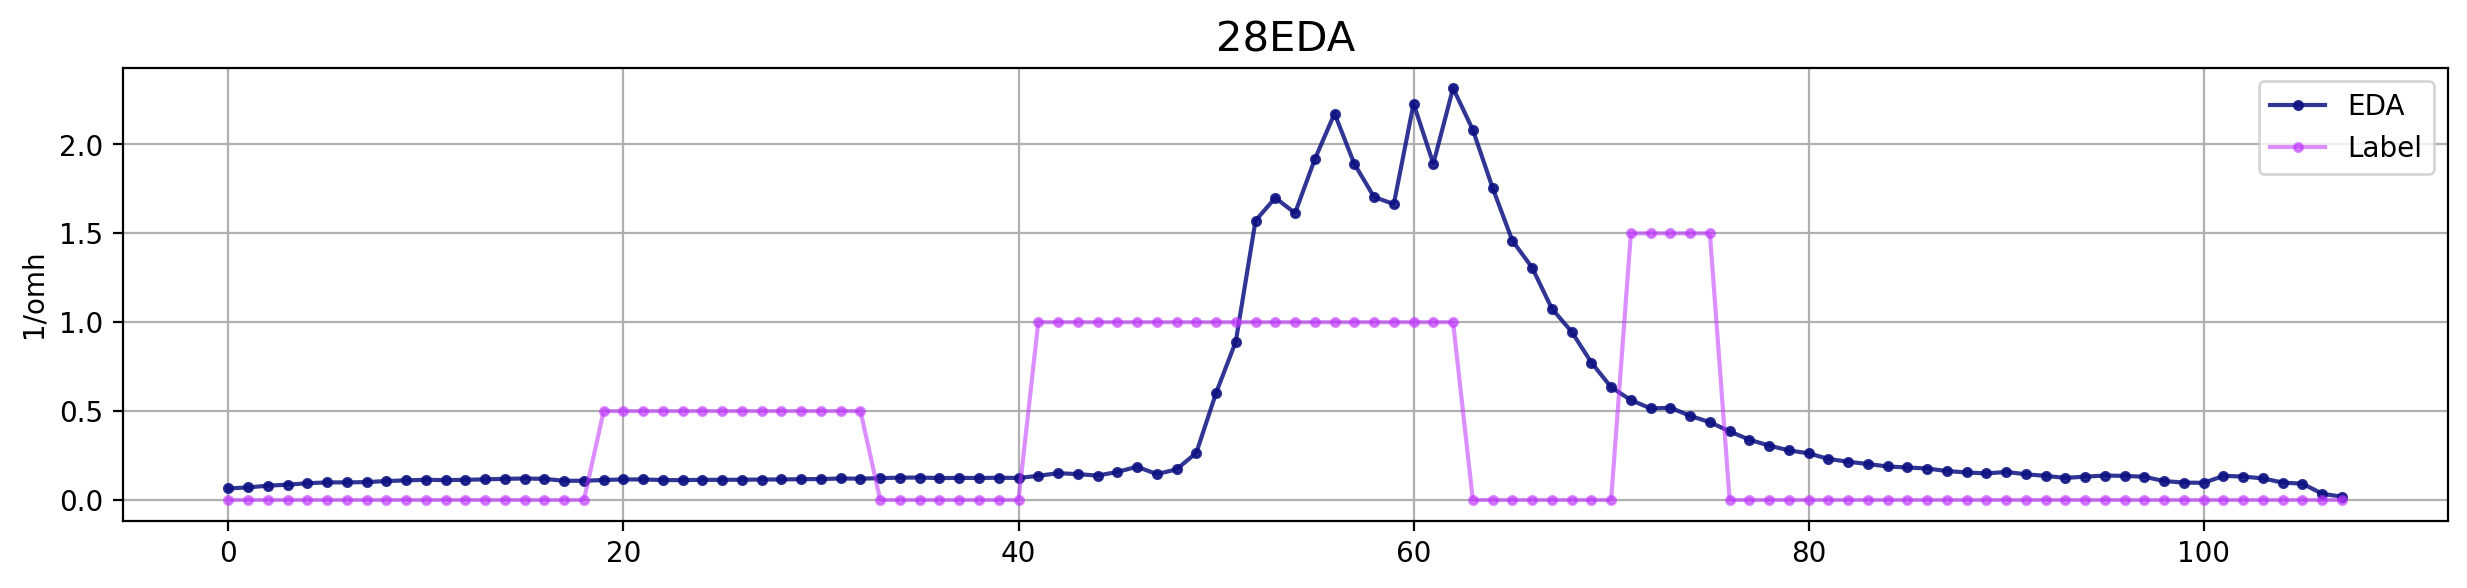

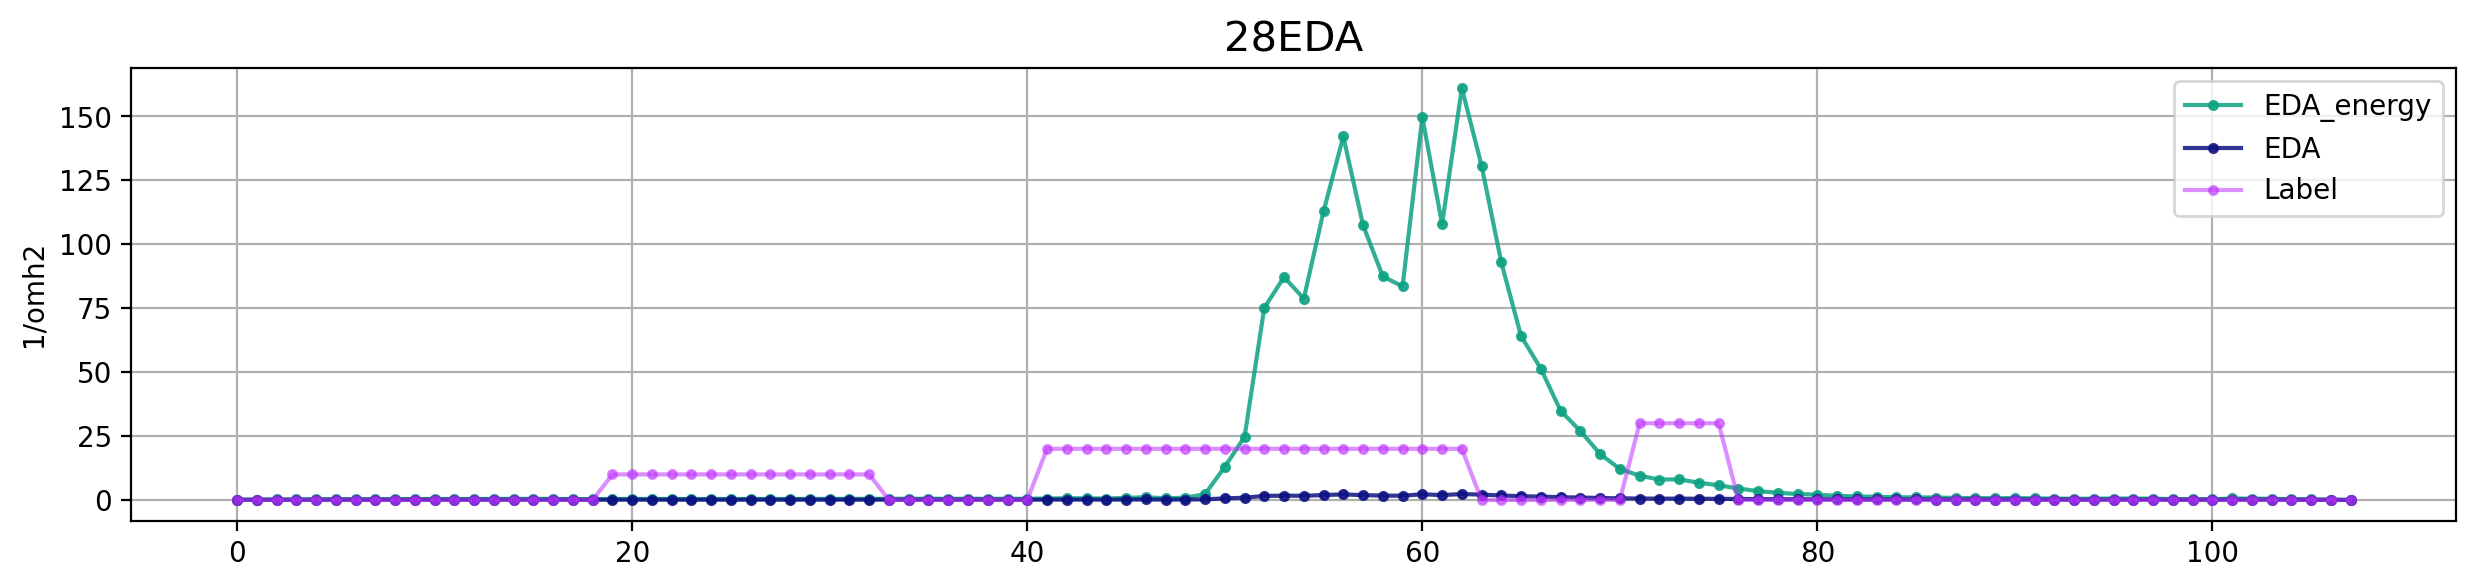

The value is 24


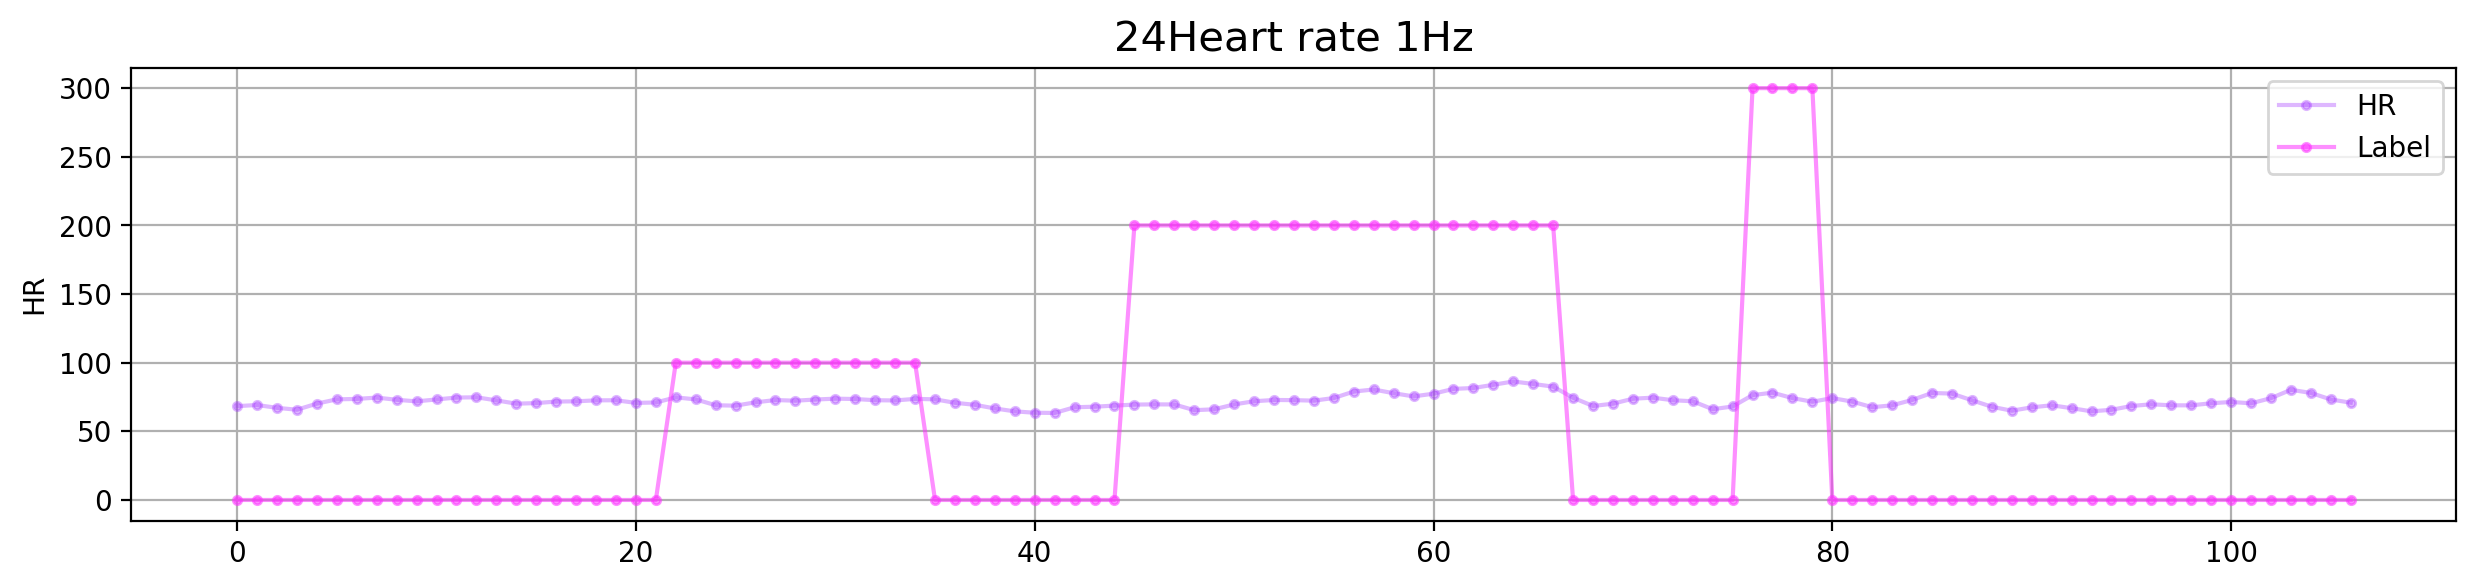

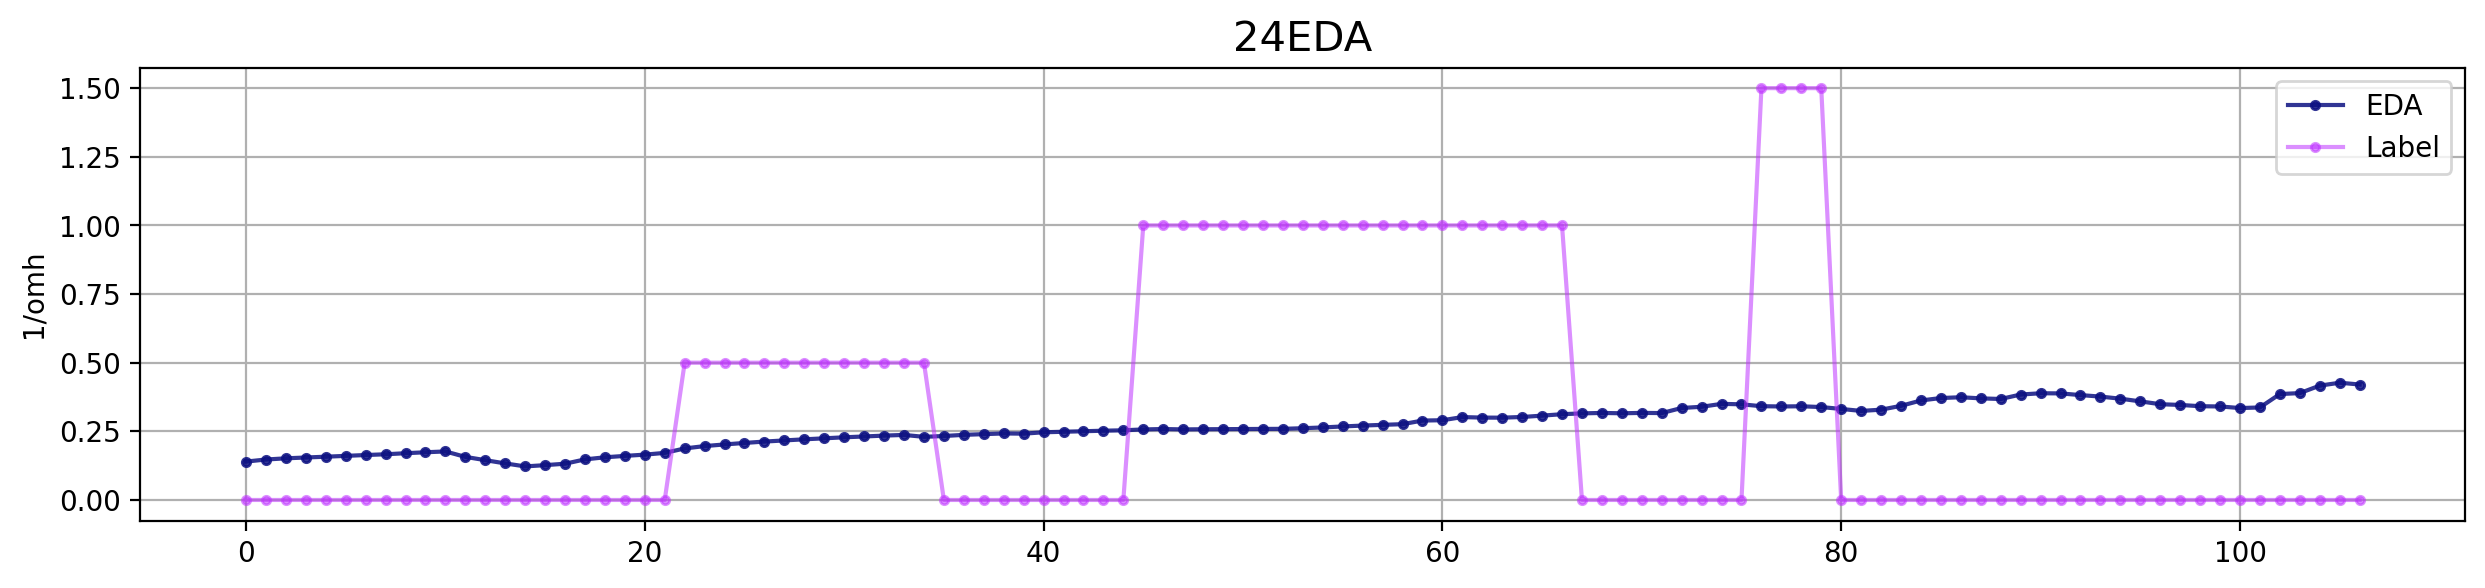

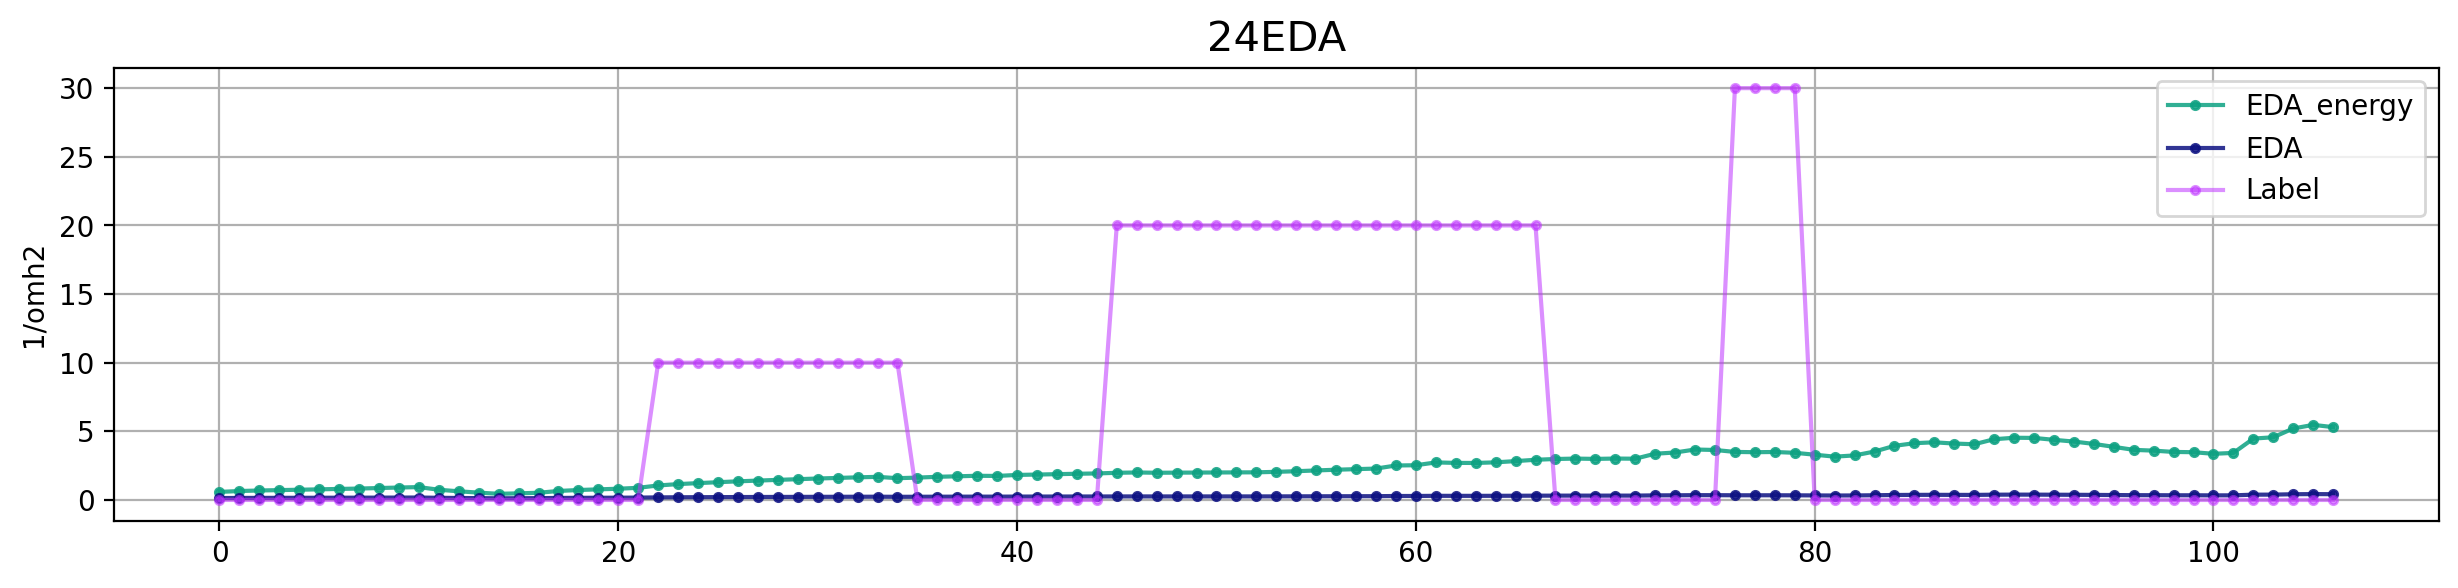

The value is 6


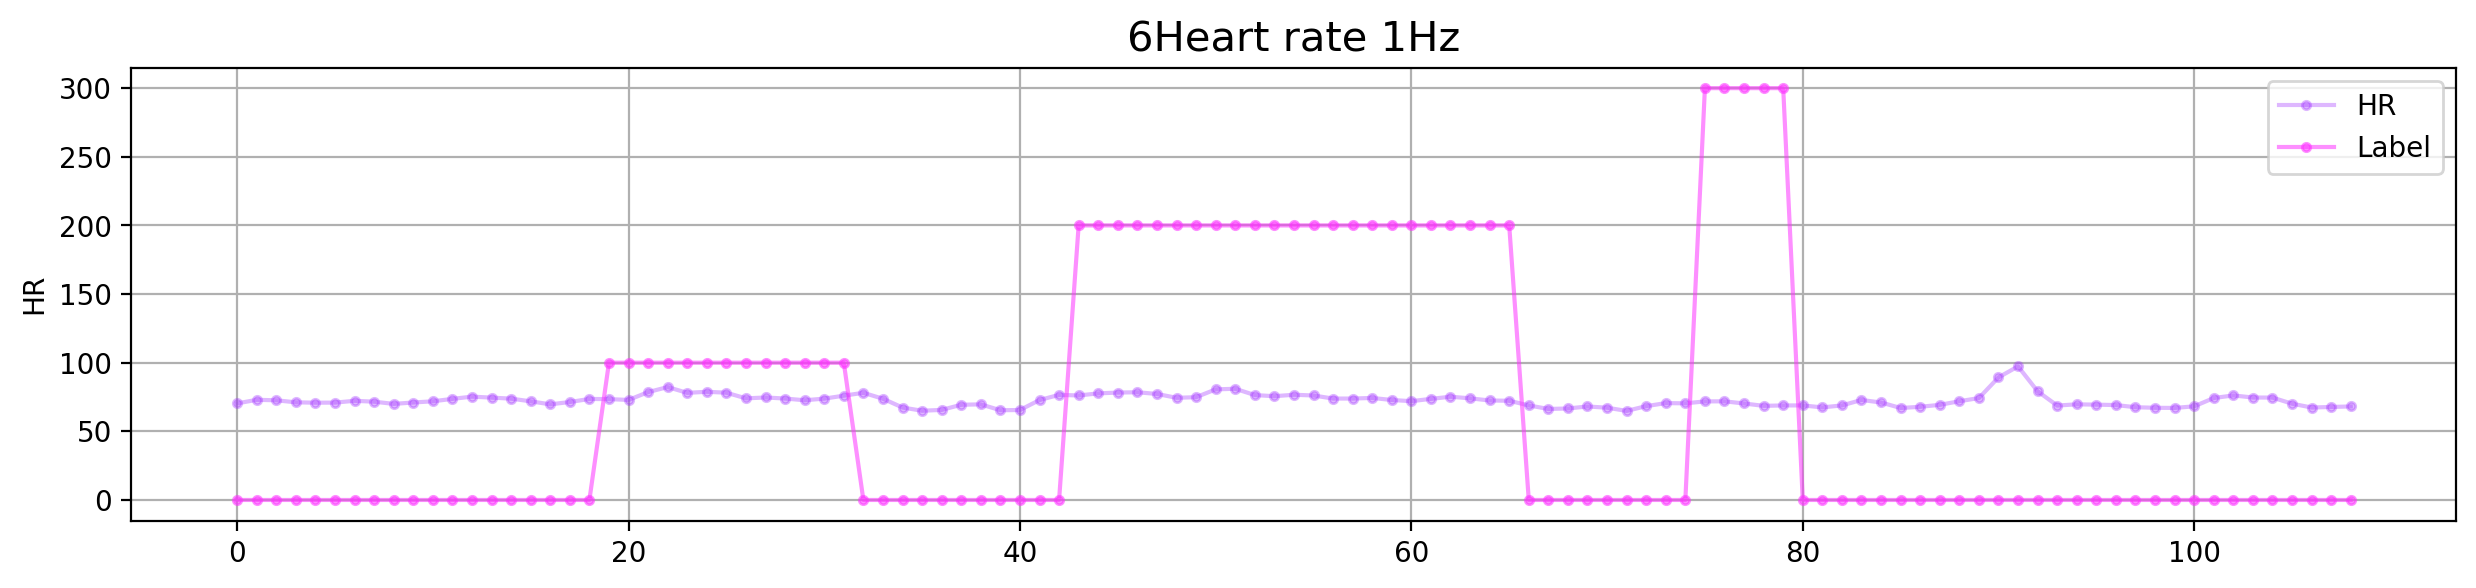

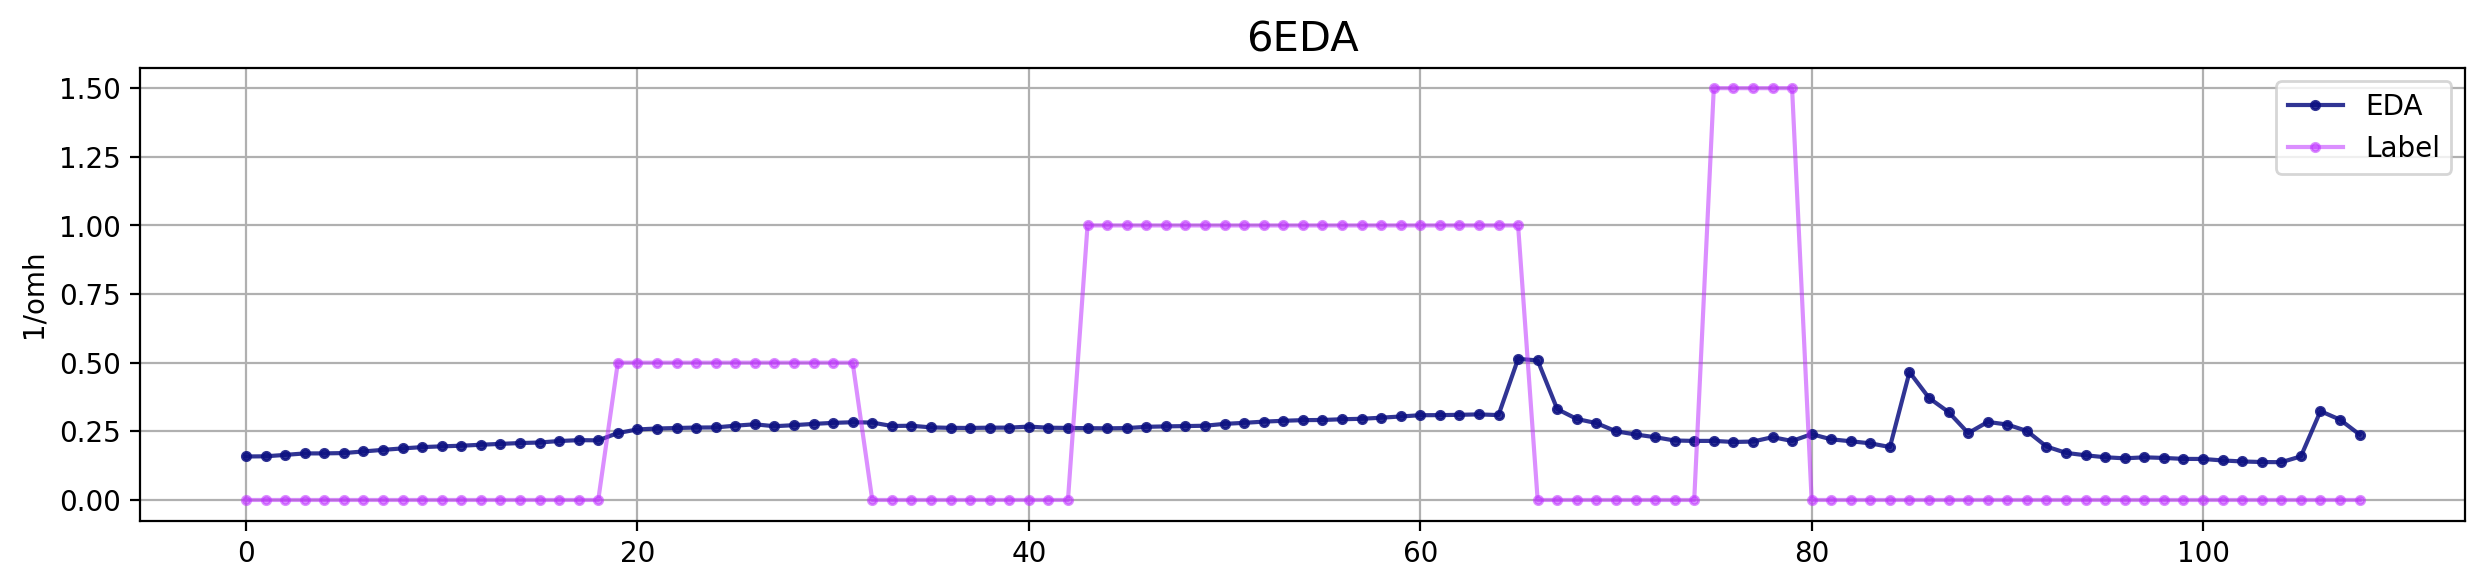

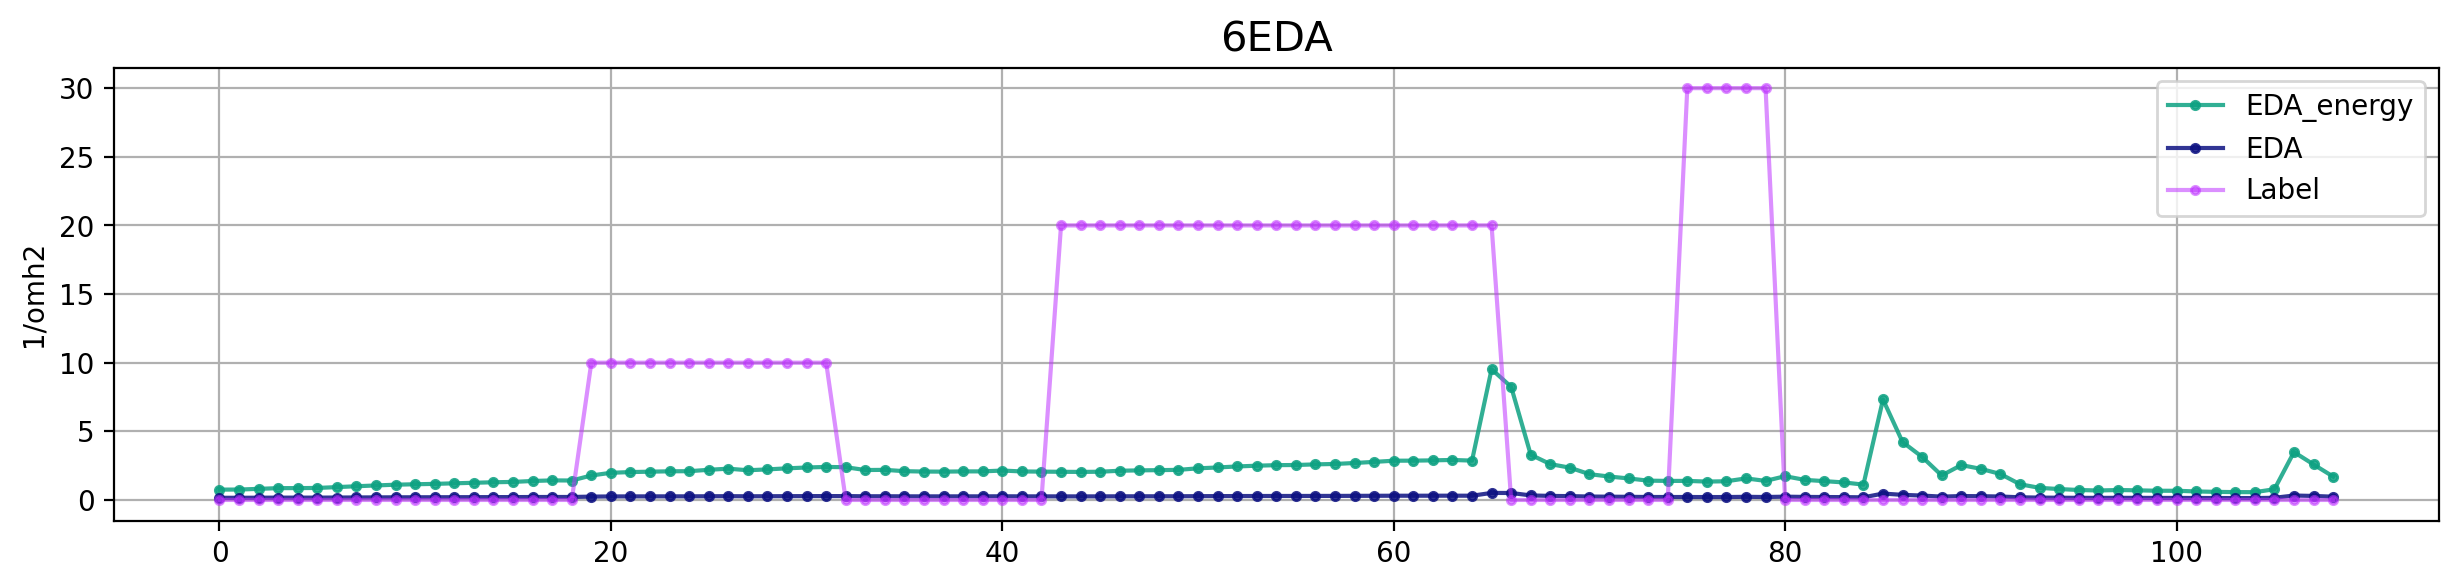

The value is 34


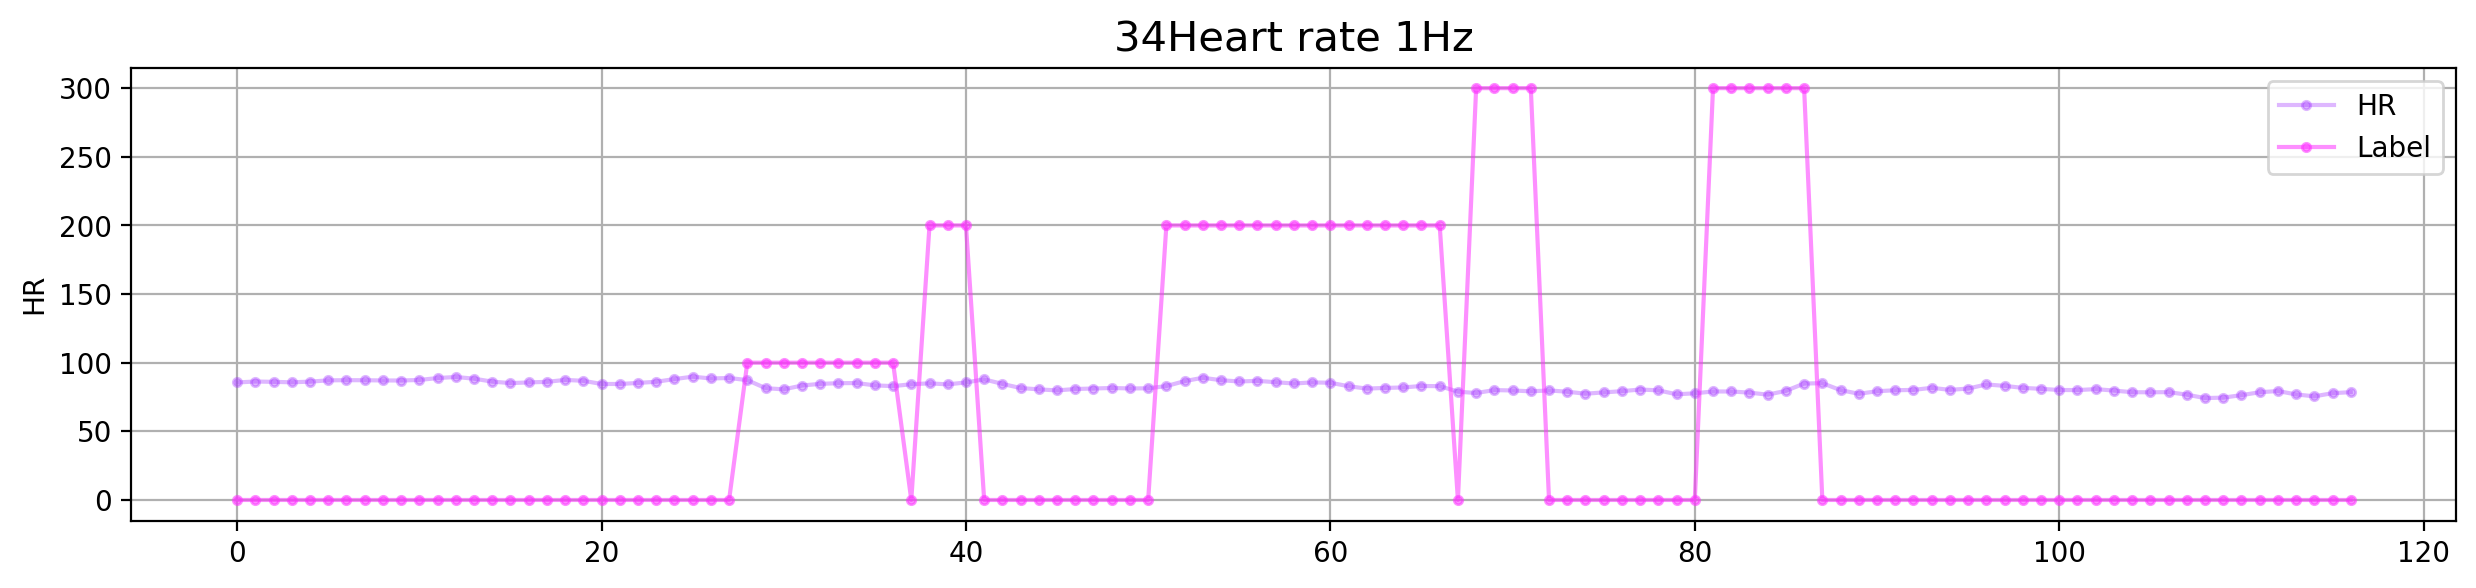

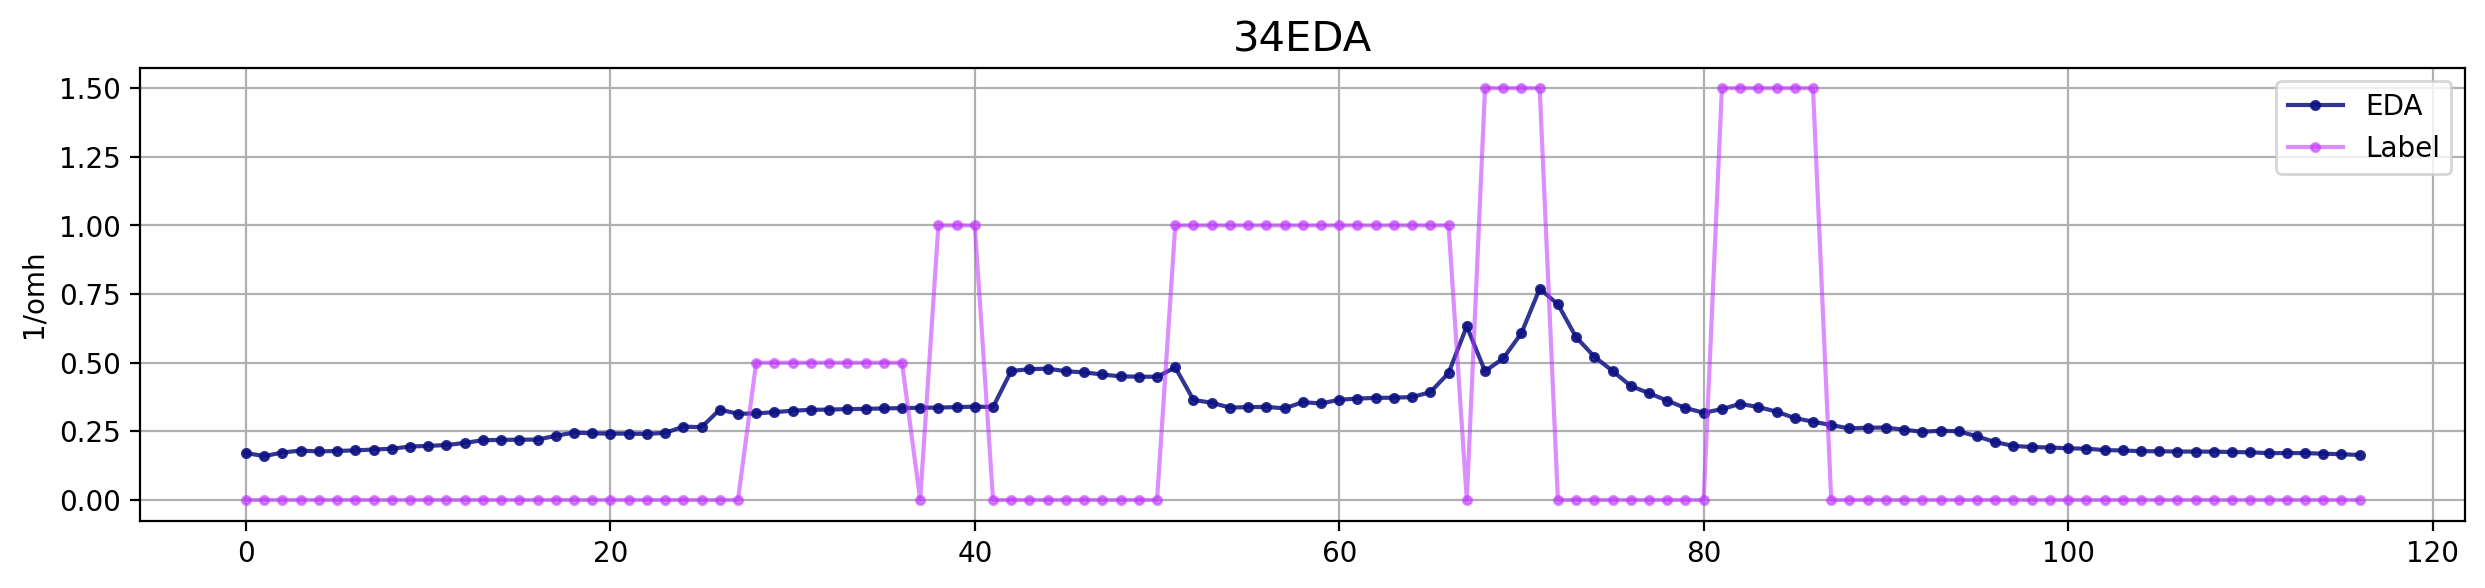

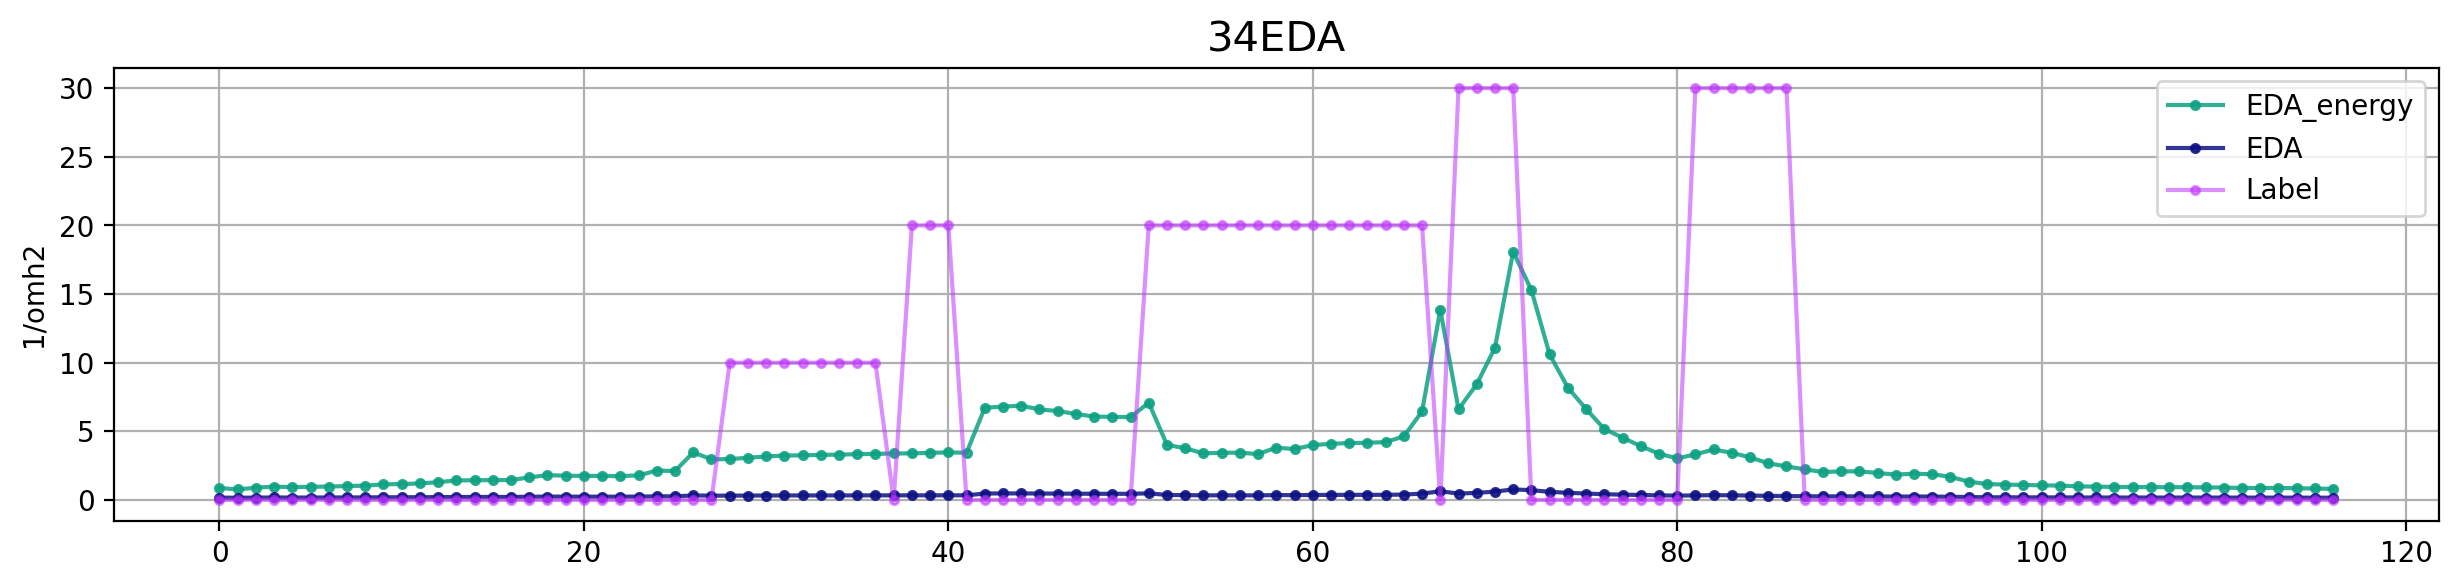

The value is 23


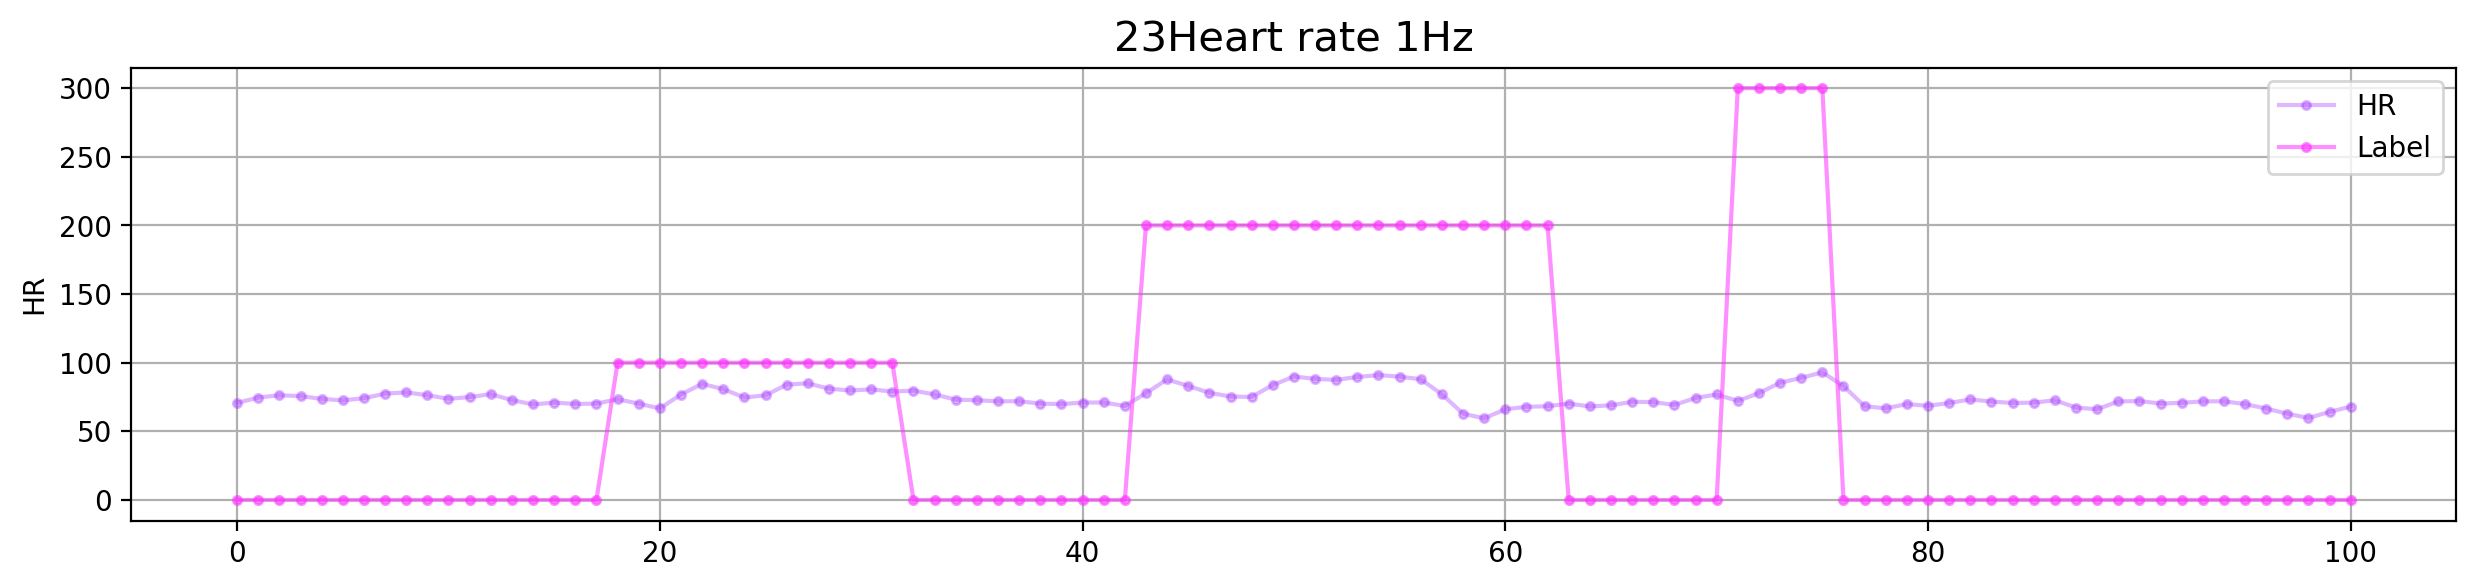

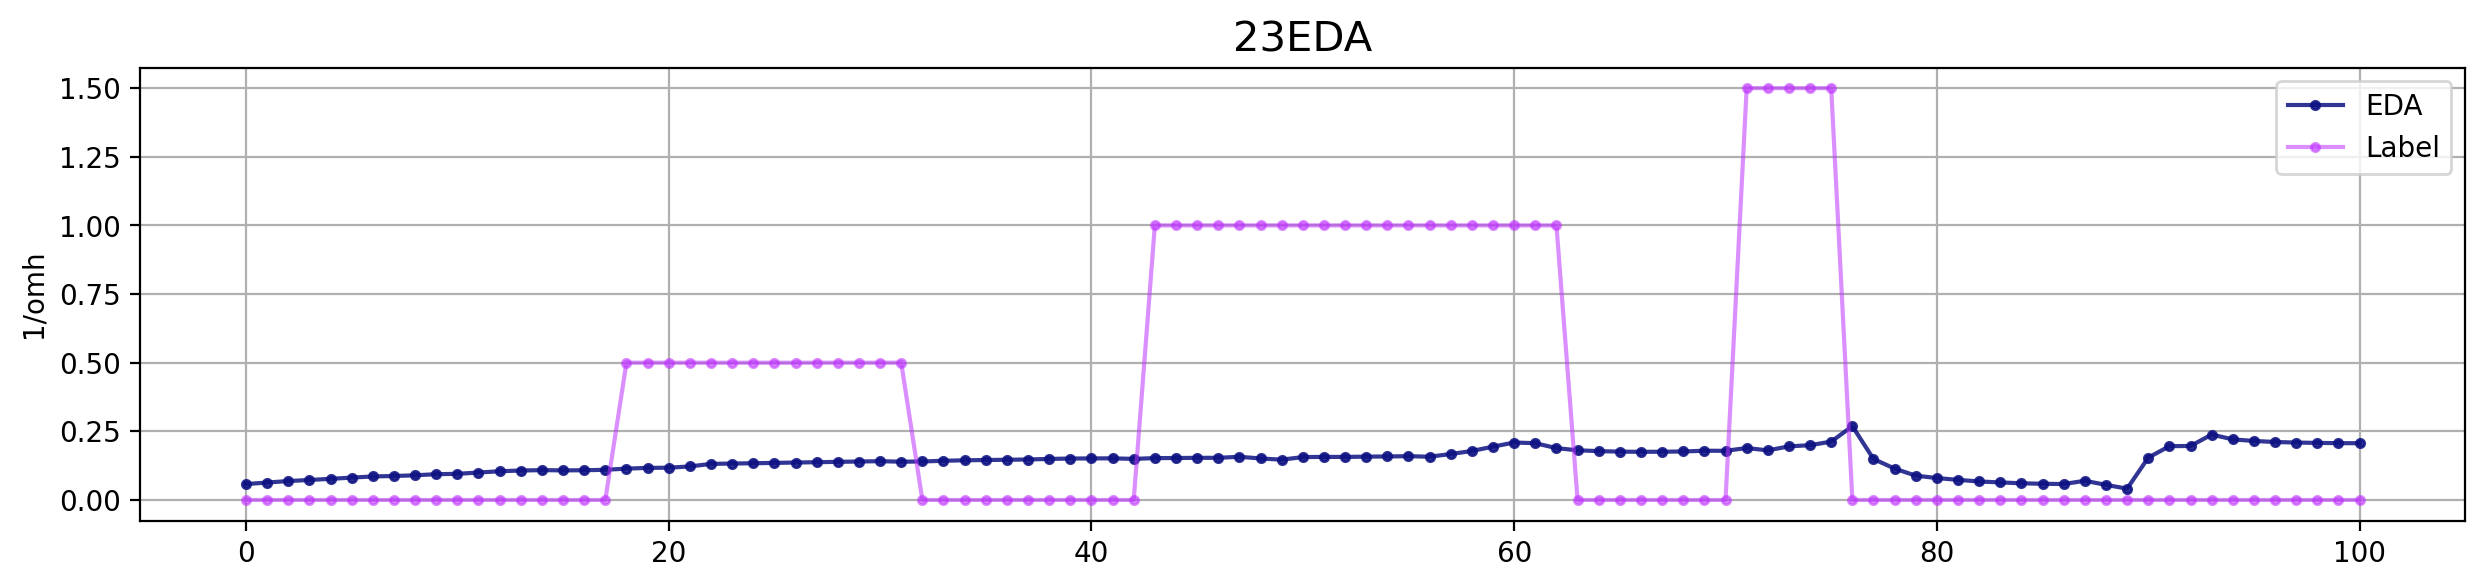

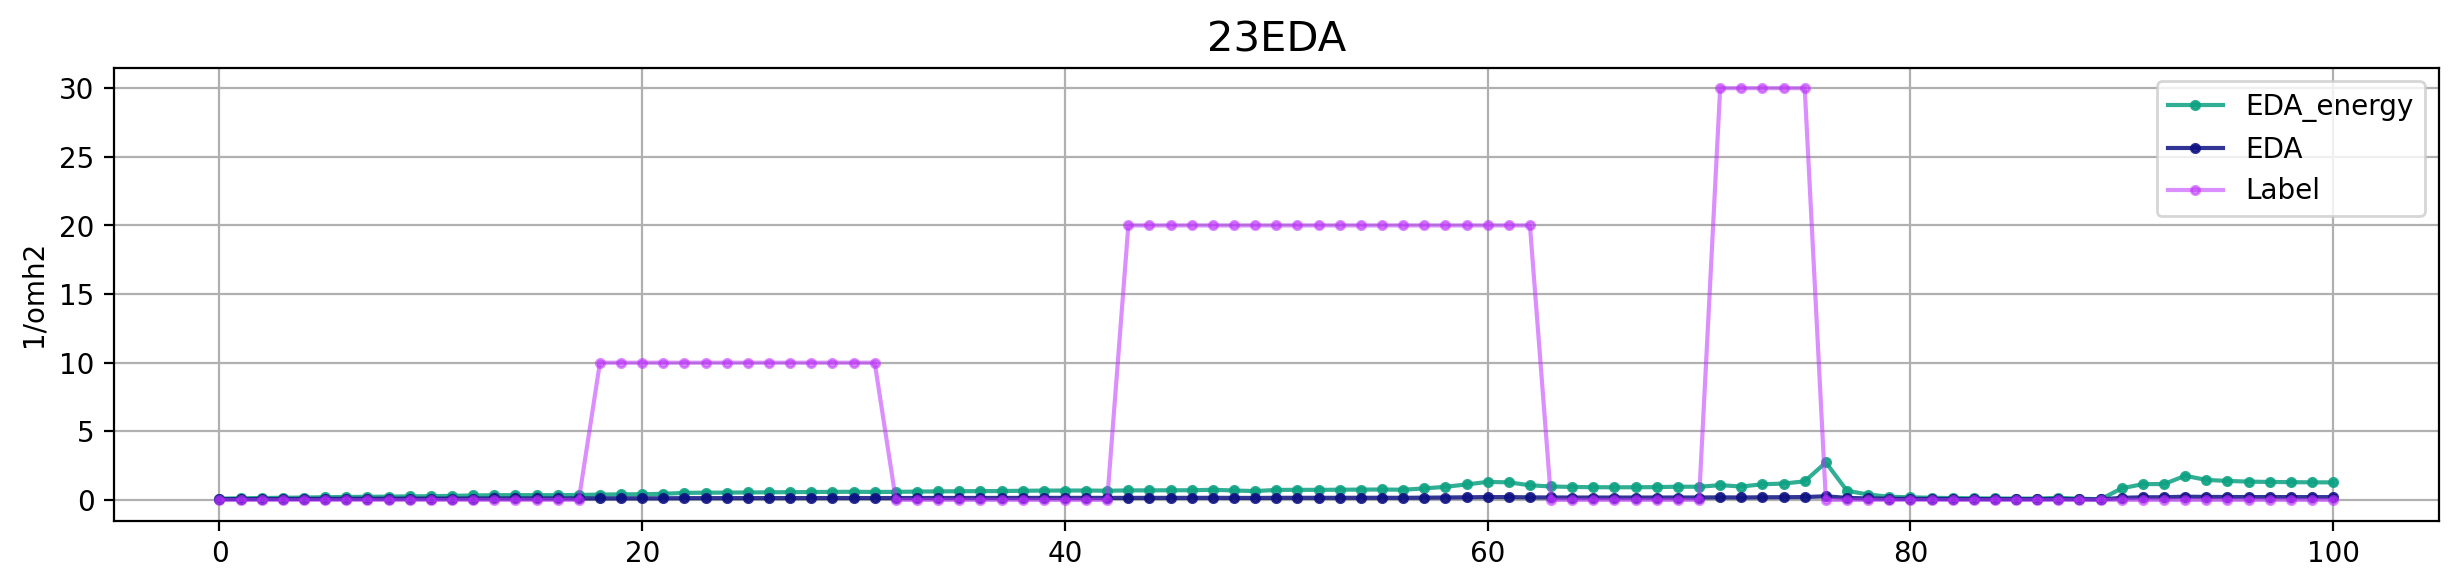

In [101]:
#Then we plot result to check if logic worked well
i = 0
while(i<=7):
#for add in range(2,36):
    add=random.randrange(2, 35, 1)
    print('The value is',add)    
    
    y = merge_lb[merge_lb['Participant']==add]
    y.reset_index(inplace=True, drop=False)
    
    x=y.index
    t=x.to_numpy()
    var = y.values.T[2]# HR 
    var1= y.values.T[5]
    var2 = y.values.T[3]#EDA
    var3 = y.values.T[6]#energy
    
    plt.figure(figsize=(15,3), dpi=200)
    plt.plot(t, var,'.-',color="#A233FF",alpha=0.35,label="HR")
    plt.plot(t, var1*100,'.-',color="#FD33FF",alpha=0.55,label="Label")
    plt.title(str(add)+"Heart rate 1Hz",fontsize=15)
    plt.legend()
    plt.xlabel("")
    plt.ylabel("HR")
    plt.grid('True')
    plt.show() 
    
    plt.figure(figsize=(15,3), dpi=200)
    plt.plot(t, var2,'.-',color="#0D1182",alpha=0.85,label="EDA")
    plt.plot(t, var1*0.5,'.-',color="#bF33FF",alpha=0.55,label="Label")
    plt.title(str(add)+"EDA",fontsize=15)
    plt.legend()
    plt.xlabel("")
    plt.ylabel("1/omh")
    plt.grid('True')
    plt.show() 
    
    plt.figure(figsize=(15,3), dpi=200)
    plt.plot(t, var3,'.-',color="#0Da182",alpha=0.85,label="EDA_energy")
    plt.plot(t, var2,'.-',color="#0D1182",alpha=0.85,label="EDA")
    plt.plot(t, var1*10,'.-',color="#bF33FF",alpha=0.55,label="Label")
    plt.title(str(add)+"EDA",fontsize=15)
    plt.legend()
    plt.xlabel("")
    plt.ylabel("1/omh2")
    plt.grid('True')
    plt.show() 
    i = i +1

In [45]:
merge_lb.to_excel('merge30sec_NewLabels.xlsx')

In [ ]:
#From the figures we can appreciate as experiment was not taken in the same condition for everyone not all new label
#were set well. So we need to correct them (I do it by hand) and from the we will the merge30sec_NewLabels_m.xlsx corrected file

In [67]:
#Now we look for more insights about the data for both datasets
import seaborn as sb
df = merge30.copy()
df = df.drop(['Participant','EDA'],1)
df = df.dropna()
df = df.replace({0: "Zero", 1: "Stress1", 2:"Stress2", 3:"Stress3"})
df.head()

HR       Temp Label   EDA_ene
0  76.834000  34.818000  Zero  6.594312
1  71.046667  35.048667  Zero  4.098071
2  71.827333  35.254000  Zero  2.946709
3  69.263000  35.457333  Zero  2.568214
4  69.564333  35.626333  Zero  2.362661

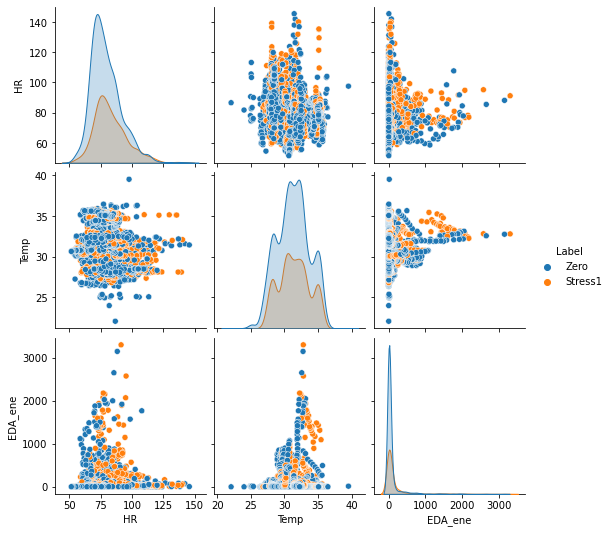

In [68]:
#Now we have ready the data-sets we can start to modelling. We will try a random forest with the complete data-set
sb.pairplot(data=df, hue="Label")

In [86]:
#Now for the data-set that we changed the labels
df_l = pd.read_excel('merge30sec_NewLabels_m.xlsx')
df_l = df_l.drop(['Participant','EDA','Unnamed: 0'],1)
df_l = df_l.dropna()
df_l = df_l.replace({0: "Zero", 1: "Stress1", 2:"Stress2", 3:"Stress3"})
df_l.head()

HR       Temp Label_d   EDA_ene
0  71.046667  35.048667    Zero  4.098071
1  71.827333  35.254000    Zero  2.946709
2  69.263000  35.457333    Zero  2.568214
3  69.564333  35.626333    Zero  2.362661
4  70.571667  35.693667    Zero  1.958348

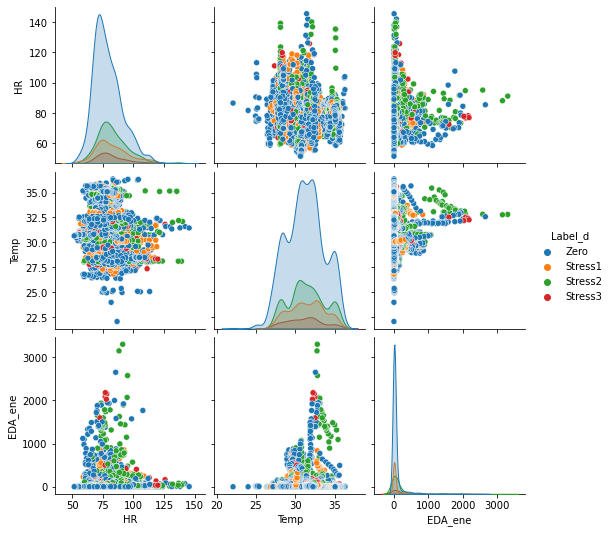

In [59]:
sb.pairplot(data=df_l, hue="Label_d")

In [ ]:
#From both graphics we can appreciate that ZERO state is over all the states, we can try to model it but it highly probable
#that will not work. In addition, despite we rename stress events we have to REMARK that ZERO which is the rest time, is not
#a real zero during whole experiment. According the our time series analysis it is appreciated that response of those signals
#to different stress levels is different for each person, in addition, human body is not like a RELAY, it means that our body
#has it time response as any real system, therefore maybe we have a label that SAYS stress events starts here but 
#the body responde is not inmediate! That is why we a those plots, were all point are scattered and many are superimposed others

In [76]:
# To model
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score

In [69]:
# Separating data
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[['HR','EDA_ene']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.265, random_state = 100)
print(len(y_test))

989


In [70]:
forest = RandomForestClassifier(n_estimators=100, random_state = 100)
#Fitting models
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
# Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6764408493427705


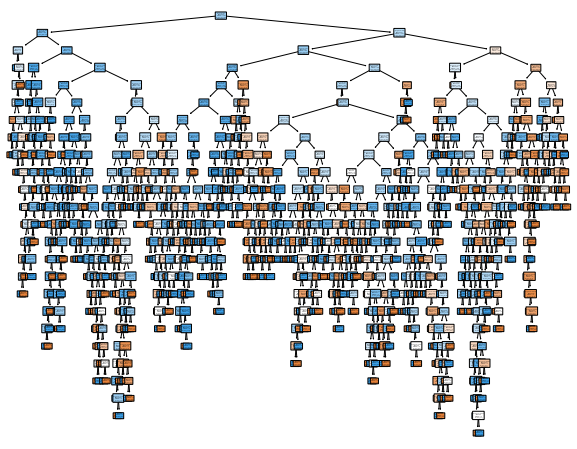

In [72]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 8))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=df['Label'].unique(), 
          filled=True, rounded=True)

plt.show()

In [73]:
# Model train error
#-------------------------------------------------------------------------------
val_cross1 = pd.crosstab(y_train, forest.predict(X = X_train))
val_cross1

col_0    Stress1  Zero
Label                 
Stress1      903     0
Zero           0  1837

In [74]:
# Error de test for this model
#-------------------------------------------------------------------------------
val_cross2 = pd.crosstab(y_test, forest.predict(X = X_test))
val_cross2

col_0    Stress1  Zero
Label                 
Stress1      130   196
Zero         124   539

# Modeling for the renamed labels

In [87]:
X = df_l[['HR','EDA_ene']]
y = df_l['Label_d']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.265, random_state = 100)

In [88]:
forest = RandomForestClassifier(n_estimators=100, random_state = 100)
#Fitting models
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
# Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6408163265306123


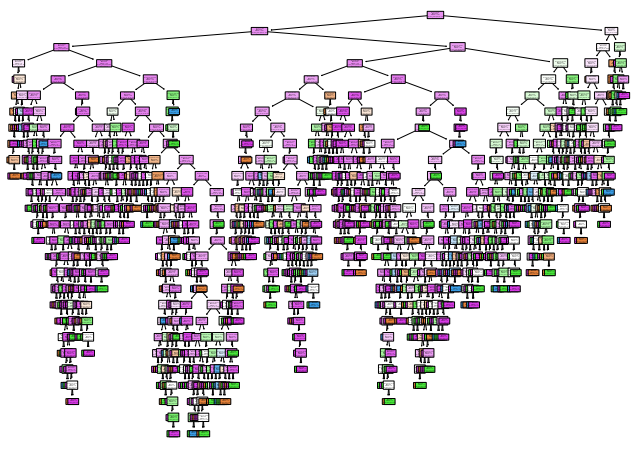

In [90]:
fig = plt.figure(figsize=(11, 8))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=df_l['Label_d'].unique(), 
          filled=True, rounded=True)

plt.show()

In [91]:
# Model train error
#-------------------------------------------------------------------------------
val_cross1 = pd.crosstab(y_train, forest.predict(X = X_train))
val_cross1

col_0    Stress1  Stress2  Stress3  Zero
Label_d                                 
Stress1      326        0        0     0
Stress2        0      524        0     0
Stress3        0        0      126     0
Zero           0        0        0  1739

In [92]:
# Error de test for this model
#-------------------------------------------------------------------------------
val_cross2 = pd.crosstab(y_test, forest.predict(X = X_test))
val_cross2

col_0    Stress1  Stress2  Stress3  Zero
Label_d                                 
Stress1       29       13        2    74
Stress2       11       45        4   129
Stress3        2        7        5    32
Zero          25       49        4   549